In [49]:
# Simple Linear Regression
"""
Created on Wed May  9 06:59:15 2018

@author: Shivendra
This is Simple Linear Model illustration code for ML training
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
# Now, Lets import the data set
dataset = pd.read_csv('TaxiFareActualsData.csv')

In [51]:
distance = dataset.iloc[:, :-1].values
fare = dataset.iloc[:, -1].values

In [52]:
# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
distance_points_train, distance_points_test, fare_train, fare_test = \
train_test_split(distance, fare, test_size = 0.33, random_state = 0)

In [53]:
# Fitting Simple Linear Regression Model to the taxi fare training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(distance_points_train, fare_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
regressor.coef_

array([19.52064424])

In [55]:
regressor.intercept_

73.97633588644821

In [56]:
fare = 19.52 * distance + 73.97

In [57]:
fare

array([[ 81.778 ],
       [214.514 ],
       [109.106 ],
       [144.242 ],
       [159.858 ],
       [206.706 ],
       [263.314 ],
       [167.666 ],
       [294.546 ],
       [169.618 ],
       [312.114 ],
       [ 97.394 ],
       [124.722 ],
       [185.234 ],
       [429.234 ],
       [193.042 ],
       [331.634 ],
       [161.81  ],
       [ 91.538 ],
       [165.714 ],
       [193.2372],
       [294.546 ],
       [222.322 ],
       [181.33  ]])

In [58]:
# Predicting the Test set results
fare_pred = regressor.predict(distance_points_test)
print("Sum of squared error is: " , np.sum(np.square(fare_test-fare_pred)))
print("Mean of squared error is: " , np.sum(np.square(fare_test-fare_pred))/len(fare_test))
from sklearn.metrics import r2_score
print("R squared coeff is: ",r2_score(fare_test, fare_pred) )

Sum of squared error is:  247.2829938335709
Mean of squared error is:  30.910374229196364
R squared coeff is:  0.9965269242439105


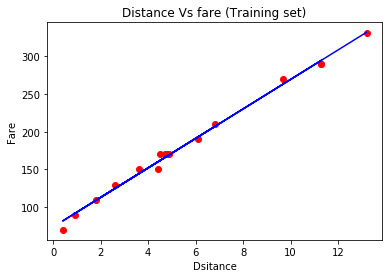

In [59]:
# Visualising the Training set results
plt.scatter(distance_points_train, fare_train, color = 'red')
plt.plot(distance_points_train, regressor.predict(distance_points_train), color = 'blue')
plt.title('Distance Vs fare (Training set)')
plt.xlabel('Dsitance')
plt.ylabel('Fare')
plt.show()

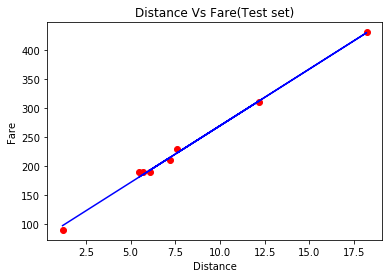

In [60]:
# Visualising the Test set results
plt.scatter(distance_points_test, fare_test, color = 'red')
plt.plot(distance_points_test, fare_pred, color = 'blue')
plt.title('Distance Vs Fare(Test set)')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

In [61]:
fare_pred = regressor.predict(distance_points_test)

In [62]:
fare_test - fare_pred

array([-7.40110897, -2.12819561,  7.66676789,  0.74793895, -3.24747219,
       -4.52497441,  4.75599195,  8.66012079])

In [63]:
error_list = np.absolute(fare_test - fare_pred)

In [64]:
error_list

array([7.40110897, 2.12819561, 7.66676789, 0.74793895, 3.24747219,
       4.52497441, 4.75599195, 8.66012079])

In [65]:
np.sum(error_list)/len(error_list)

4.891571346627522

In [66]:
SSE = np.sum(np.square(fare_test - fare_pred))

In [67]:
SSE

247.2829938335709

In [68]:
MSE  = SSE/len(error_list)

In [69]:
MSE

30.910374229196364

In [70]:
RMSE = np.sqrt(MSE)

In [71]:
RMSE

5.559709905129616

In [72]:
SSR = np.sum(np.square(fare_pred - fare_test.mean()))

In [73]:
SSR

70048.8004663623

In [74]:
print ("Goodness of the Model is ", 1 - SSE/SSR)

Goodness of the Model is  0.9964698468469518


# Building the LR model from the core

In [75]:
def linearModel( x, m=10, c=10):
    return (m*x + c)

In [76]:
fare_pred = linearModel(distance_points_test)

In [77]:
fare_pred

array([[ 22. ],
       [132. ],
       [ 86. ],
       [192. ],
       [ 71.1],
       [ 82. ],
       [ 67. ],
       [ 65. ]])

In [78]:
fare_pred = fare_pred.reshape(8)

In [79]:
fare_pred

array([ 22. , 132. ,  86. , 192. ,  71.1,  82. ,  67. ,  65. ])

In [80]:
SSE = np.sum(np.square(fare_test 
                       - fare_pred))
print("SSE is : ",SSE )

SSE is :  174963.21


In [81]:
def findError( m, c):
    fare_pred = linearModel(distance_points_test, m, c)
    fare_pred = fare_pred.reshape(8)
    SSE = np.sum(np.square(fare_test 
                       - fare_pred))
    print("SSE is : ", SSE)
    return SSE

In [82]:
findError(10,10)

SSE is :  174963.21


174963.21

In [83]:
def dEupondm( x, y, m , c ):
    return (-2 * x* ( y-(m*x)-c))

In [84]:
def dEupondc(x,y,m,c):
    return(-2*(y-(m*x)-c))

## Training Method

In [85]:
distance_points_train.shape

(16, 1)

In [86]:
m = -0.3
c= 100
sseList = []
mList = []
learningRate = 0.001
for i in range(800):
    for i in range(len(fare_train)):
        deDm = dEupondm(distance_points_train.ravel()[i],
                       fare_train.ravel()[i], m, c)
        deDc = dEupondc(distance_points_train.ravel()[i],
                       fare_train.ravel()[i], m, c)
        m += -learningRate * deDm
        c += -learningRate * deDc
        mList.append(m)
        print("dE/dm is {} and dE/dc is {}".format(deDm,deDc ))
        print( "Error on test data is ",findError(m,c) )
        sseList.append(findError(m,c))
        print("current m is {}, current c is {}".format(m,c))

dE/dm is -6176.543999999999 and dE/dc is -467.91999999999996
SSE is :  89858.26667074337
Error on test data is  89858.26667074337
SSE is :  89858.26667074337
current m is 5.876543999999999, current c is 100.46792
dE/dm is -2782.6732012800003 and dE/dc is -246.25426560000002
SSE is :  51549.85589145947
Error on test data is  51549.85589145947
SSE is :  51549.85589145947
current m is 8.659217201279999, current c is 100.71417426560001
dE/dm is -1654.6535263104897 and dE/dc is -170.58283776396803
SSE is :  33910.61746668007
Error on test data is  33910.61746668007
SSE is :  33910.61746668007
current m is 10.313870727590489, current c is 100.88475710336398
dE/dm is -204.32542160230935 and dE/dc is -45.40564924495763
SSE is :  31982.343023686
Error on test data is  31982.343023686
SSE is :  31982.343023686
current m is 10.518196149192798, current c is 100.93016275260894
dE/dm is -24.55001288029621 and dE/dc is -5.579548381885502
SSE is :  31754.613468560012
Error on test data is  31754.61346

SSE is :  2143.561153738947
Error on test data is  2143.561153738947
SSE is :  2143.561153738947
current m is 16.458233781575547, current c is 100.93966211795023
dE/dm is -182.66012189487932 and dE/dc is -18.83094040153395
SSE is :  2000.2672058776398
Error on test data is  2000.2672058776398
SSE is :  2000.2672058776398
current m is 16.640893903470428, current c is 100.95849305835176
dE/dm is 52.58264061571825 and dE/dc is 11.685031247937388
SSE is :  2036.3931881496949
Error on test data is  2036.3931881496949
SSE is :  2036.3931881496949
current m is 16.58831126285471, current c is 100.94680802710383
dE/dm is 210.63132273624817 and dE/dc is 47.87075516732912
SSE is :  2220.9933614514016
Error on test data is  2220.9933614514016
SSE is :  2220.9933614514016
current m is 16.377679940118462, current c is 100.8989372719365
dE/dm is 73.36354019093905 and dE/dc is 40.75752232829947
SSE is :  2300.0280085661175
Error on test data is  2300.0280085661175
SSE is :  2300.0280085661175
current 

SSE is :  1820.1156227867193
current m is 16.8145890166829, current c is 99.68627165527349
dE/dm is 48.16730007311878 and dE/dc is 10.703844460693063
SSE is :  1849.2786167822724
Error on test data is  1849.2786167822724
SSE is :  1849.2786167822724
current m is 16.76642171660978, current c is 99.6755678108128
dE/dm is 206.34084560228337 and dE/dc is 46.89564672779167
SSE is :  2011.9889472503548
Error on test data is  2011.9889472503548
SSE is :  2011.9889472503548
current m is 16.560080871007496, current c is 99.628672164085
dE/dm is 69.97254383483461 and dE/dc is 38.873635463797
SSE is :  2080.7577876001087
Error on test data is  2080.7577876001087
SSE is :  2080.7577876001087
current m is 16.490108327172663, current c is 99.5897985286212
dE/dm is 23.426478086176257 and dE/dc is 3.445070306790626
SSE is :  2105.5638483380694
Error on test data is  2105.5638483380694
SSE is :  2105.5638483380694
current m is 16.466681849086488, current c is 99.5863534583144
dE/dm is 43.93146082048604

Error on test data is  1915.5859690344348
SSE is :  1915.5859690344348
current m is 16.64492638190827, current c is 98.89268972032835
dE/dm is 67.87280594794764 and dE/dc is 37.70711441552646
SSE is :  1980.6229188121724
Error on test data is  1980.6229188121724
SSE is :  1980.6229188121724
current m is 16.577053575960324, current c is 98.85498260591282
dE/dm is 21.47367814522512 and dE/dc is 3.157893844886047
SSE is :  2002.763171755619
Error on test data is  2002.763171755619
SSE is :  2002.763171755619
current m is 16.5555798978151, current c is 98.85182471206794
dE/dm is 42.75332391618276 and dE/dc is 47.50369324020306
SSE is :  2048.5765760525337
Error on test data is  2048.5765760525337
SSE is :  2048.5765760525337
current m is 16.512826573898916, current c is 98.80432101882774
dE/dm is 95.22827806313788 and dE/dc is 19.434342461864873
SSE is :  2160.9845224027868
Error on test data is  2160.9845224027868
SSE is :  2160.9845224027868
current m is 16.417598295835777, current c is 

SSE is :  2211.543695111408
Error on test data is  2211.543695111408
SSE is :  2211.543695111408
current m is 16.387726748782217, current c is 98.04788195079561
dE/dm is 50.71462737416348 and dE/dc is 14.087396492823189
SSE is :  2283.847721707952
Error on test data is  2283.847721707952
SSE is :  2283.847721707952
current m is 16.337012121408055, current c is 98.03379455430279
dE/dm is 27.654879522292813 and dE/dc is 69.13719880573203
SSE is :  2326.9369695996006
Error on test data is  2326.9369695996006
SSE is :  2326.9369695996006
current m is 16.309357241885763, current c is 97.96465735549705
dE/dm is -174.91509133297984 and dE/dc is -15.479211622387595
SSE is :  2085.2901965878686
Error on test data is  2085.2901965878686
SSE is :  2085.2901965878686
current m is 16.484272333218744, current c is 97.98013656711944
dE/dm is 104.11721315699616 and dE/dc is 17.068395599507568
SSE is :  2224.1497716642803
Error on test data is  2224.1497716642803
SSE is :  2224.1497716642803
current m 

Error on test data is  1795.3864290300785
SSE is :  1795.3864290300785
current m is 16.74065749664547, current c is 96.9496428844156
dE/dm is 87.99287325618835 and dE/dc is 17.957729235956805
SSE is :  1891.889821261656
Error on test data is  1891.889821261656
SSE is :  1891.889821261656
current m is 16.65266462338928, current c is 96.93168515517964
dE/dm is 65.8989633355025 and dE/dc is 13.728950694896355
SSE is :  1971.4435421595538
Error on test data is  1971.4435421595538
SSE is :  1971.4435421595538
current m is 16.58676566005378, current c is 96.91795620448474
dE/dm is 45.83209518333254 and dE/dc is 9.751509613475008
SSE is :  2030.4540427028103
Error on test data is  2030.4540427028103
SSE is :  2030.4540427028103
current m is 16.540933564870446, current c is 96.90820469487126
dE/dm is 46.480071804515106 and dE/dc is 12.91113105680975
SSE is :  2093.46678632569
Error on test data is  2093.46678632569
SSE is :  2093.46678632569
current m is 16.49445349306593, current c is 96.8952

SSE is :  2020.810194675457
current m is 16.562951923465896, current c is 96.15078886237562
dE/dm is -401.7616877438888 and dE/dc is -30.436491495749152
SSE is :  1577.7992080765453
Error on test data is  1577.7992080765453
SSE is :  1577.7992080765453
current m is 16.964713611209785, current c is 96.18122535387137
dE/dm is -47.85574497175223 and dE/dc is -4.235021678916127
SSE is :  1540.1272578557982
Error on test data is  1540.1272578557982
SSE is :  1540.1272578557982
current m is 17.012569356181537, current c is 96.18546037555029
dE/dm is -170.5767672680832 and dE/dc is -17.58523373897765
SSE is :  1432.1467856401996
Error on test data is  1432.1467856401996
SSE is :  1432.1467856401996
current m is 17.18314612344962, current c is 96.20304560928928
dE/dm is 31.744828483313185 and dE/dc is 7.054406329625152
SSE is :  1448.9691189623916
Error on test data is  1448.9691189623916
SSE is :  1448.9691189623916
current m is 17.15140129496631, current c is 96.19599120295965
dE/dm is 190.6

SSE is :  1568.5032843201107
current m is 16.963441342369077, current c is 95.48157966789779
dE/dm is 37.34761837685393 and dE/dc is 41.49735375205992
SSE is :  1603.4160964736773
Error on test data is  1603.4160964736773
SSE is :  1603.4160964736773
current m is 16.926093723992224, current c is 95.44008231414573
dE/dm is 82.10382730473478 and dE/dc is 16.75588312341526
SSE is :  1687.8684124495712
Error on test data is  1687.8684124495712
SSE is :  1687.8684124495712
current m is 16.84398989668749, current c is 95.42332643102232
dE/dm is 60.234988177173726 and dE/dc is 12.548955870244527
SSE is :  1755.9820926452423
Error on test data is  1755.9820926452423
SSE is :  1755.9820926452423
current m is 16.783754908510314, current c is 95.41077747515207
dE/dm is 40.36760012441526 and dE/dc is 8.58885109030112
SSE is :  1804.5495503451484
Error on test data is  1804.5495503451484
SSE is :  1804.5495503451484
current m is 16.7433873083859, current c is 95.40218862406178
dE/dm is 40.884357126

dE/dm is -135.35406141453115 and dE/dc is -11.978235523409836
SSE is :  1664.505167562896
Error on test data is  1664.505167562896
SSE is :  1664.505167562896
current m is 16.869419740762297, current c is 94.92791829718874
dE/dm is 95.5428203332326 and dE/dc is 15.662757431677477
SSE is :  1777.6307530536278
Error on test data is  1777.6307530536278
SSE is :  1777.6307530536278
current m is 16.773876920429064, current c is 94.91225553975706
dE/dm is 44.32654477093766 and dE/dc is 17.048671065745253
SSE is :  1834.8235706221694
Error on test data is  1834.8235706221694
SSE is :  1834.8235706221694
current m is 16.729550375658125, current c is 94.8952068686913
dE/dm is -376.8528237572063 and dE/dc is -28.549456345242902
SSE is :  1439.2312170614812
Error on test data is  1439.2312170614812
SSE is :  1439.2312170614812
current m is 17.106403199415332, current c is 94.92375632503655
dE/dm is -40.089857987485935 and dE/dc is -3.547775043140348
SSE is :  1408.8754217799437
Error on test data

current m is 17.38000874003719, current c is 94.34246029164792
dE/dm is 22.972496596337578 and dE/dc is 5.104999243630573
SSE is :  1258.5915169374157
Error on test data is  1258.5915169374157
SSE is :  1258.5915169374157
current m is 17.357036243440852, current c is 94.3373552924043
dE/dm is 182.23316991918767 and dE/dc is 41.416629527088105
SSE is :  1374.715409775471
Error on test data is  1374.715409775471
SSE is :  1374.715409775471
current m is 17.174803073521666, current c is 94.2959386628772
dE/dm is 54.75810310277832 and dE/dc is 30.4211683904324
SSE is :  1418.7829802025433
Error on test data is  1418.7829802025433
SSE is :  1418.7829802025433
current m is 17.12004497041889, current c is 94.26551749448677
dE/dm is 9.272796789358903 and dE/dc is 1.363646586670427
SSE is :  1426.7313300414942
Error on test data is  1426.7313300414942
SSE is :  1426.7313300414942
current m is 17.11077217362953, current c is 94.2641538479001
dE/dm is 35.39492784750004 and dE/dc is 39.327697608333

Error on test data is  1315.465730174251
SSE is :  1315.465730174251
current m is 17.240129634557217, current c is 93.73695881466855
dE/dm is -32.760424715268094 and dE/dc is -2.899152629669743
SSE is :  1291.5874437471887
Error on test data is  1291.5874437471887
SSE is :  1291.5874437471887
current m is 17.272890059272484, current c is 93.73985796729822
dE/dm is -169.03430408051892 and dE/dc is -17.426216915517415
SSE is :  1192.4508724226605
Error on test data is  1192.4508724226605
SSE is :  1192.4508724226605
current m is 17.441924363353003, current c is 93.75728418421374
dE/dm is 20.213494373720295 and dE/dc is 4.49188763860451
SSE is :  1202.090661775578
Error on test data is  1202.090661775578
SSE is :  1202.090661775578
current m is 17.421710868979282, current c is 93.75279229657514
dE/dm is 179.5932170567391 and dE/dc is 40.81664024016797
SSE is :  1313.5565078829597
Error on test data is  1313.5565078829597
SSE is :  1313.5565078829597
current m is 17.242117651922545, curren

SSE is :  1447.5715098833869
Error on test data is  1447.5715098833869
SSE is :  1447.5715098833869
current m is 17.09201058124912, current c is 93.05229143193702
dE/dm is 31.81656693979415 and dE/dc is 6.769482327615776
SSE is :  1481.6485405117614
Error on test data is  1481.6485405117614
SSE is :  1481.6485405117614
current m is 17.060194014309324, current c is 93.04552194960941
dE/dm is 32.12798688808544 and dE/dc is 8.924440802245954
SSE is :  1517.5808348983123
Error on test data is  1517.5808348983123
SSE is :  1517.5808348983123
current m is 17.02806602742124, current c is 93.03659750880716
dE/dm is 23.878259135820528 and dE/dc is 59.69564783955131
SSE is :  1546.6000301126503
Error on test data is  1546.6000301126503
SSE is :  1546.6000301126503
current m is 17.00418776828542, current c is 92.97690186096762
dE/dm is -110.19254567740154 and dE/dc is -9.751552714814295
SSE is :  1425.2534670621278
Error on test data is  1425.2534670621278
SSE is :  1425.2534670621278
current m i

Error on test data is  1268.937747770076
SSE is :  1268.937747770076
current m is 17.283719790887975, current c is 92.5287946050987
dE/dm is 70.74641148840782 and dE/dc is 14.438043160899554
SSE is :  1332.4143126333329
Error on test data is  1332.4143126333329
SSE is :  1332.4143126333329
current m is 17.212973379399568, current c is 92.5143565619378
dE/dm is 49.31163631733498 and dE/dc is 10.273257566111454
SSE is :  1380.9093956830168
Error on test data is  1380.9093956830168
SSE is :  1380.9093956830168
current m is 17.163661743082233, current c is 92.50408330437169
dE/dm is 29.828958870467016 and dE/dc is 6.346586993716386
SSE is :  1411.9418129522878
Error on test data is  1411.9418129522878
SSE is :  1411.9418129522878
current m is 17.133832784211766, current c is 92.49773671737798
dE/dm is 30.0926501318904 and dE/dc is 8.359069481080667
SSE is :  1444.5851410580174
Error on test data is  1444.5851410580174
SSE is :  1444.5851410580174
current m is 17.103740134079874, current c 

current m is 17.60488139190857, current c is 92.09720158012784
dE/dm is 172.11638139982495 and dE/dc is 39.11735940905112
SSE is :  1149.5825739140234
Error on test data is  1149.5825739140234
SSE is :  1149.5825739140234
current m is 17.432765010508746, current c is 92.0580842207188
dE/dm is 48.373420462684365 and dE/dc is 26.87412247926909
SSE is :  1184.8982358007906
Error on test data is  1184.8982358007906
SSE is :  1184.8982358007906
current m is 17.38439159004606, current c is 92.03121009823953
dE/dm is 3.3329915835172073 and dE/dc is 0.49014582110547167
SSE is :  1187.4730429378687
Error on test data is  1187.4730429378687
SSE is :  1187.4730429378687
current m is 17.381058598462545, current c is 92.03071995241842
dE/dm is 31.81261084386248 and dE/dc is 35.34734538206942
SSE is :  1212.7566628881516
Error on test data is  1212.7566628881516
SSE is :  1212.7566628881516
current m is 17.349245987618684, current c is 91.99537260703636
dE/dm is 68.66544387440558 and dE/dc is 14.013

SSE is :  973.889742868345
current m is 17.708324137944334, current c is 91.23949021286764
dE/dm is 8.342539502554317 and dE/dc is 1.8538976672342926
SSE is :  977.4128986012452
Error on test data is  977.4128986012452
SSE is :  977.4128986012452
current m is 17.69998159844178, current c is 91.2376363152004
dE/dm is 168.23448706542933 and dE/dc is 38.23511069668848
SSE is :  1069.834919914061
Error on test data is  1069.834919914061
SSE is :  1069.834919914061
current m is 17.53174711137635, current c is 91.19940120450372
dE/dm is 45.92356561793213 and dE/dc is 25.513092009962293
SSE is :  1102.0456432105716
Error on test data is  1102.0456432105716
SSE is :  1102.0456432105716
current m is 17.485823545758418, current c is 91.17388811249376
dE/dm is 1.0538398416534391 and dE/dc is 0.15497644730197635
SSE is :  1102.825528446062
Error on test data is  1102.825528446062
SSE is :  1102.825528446062
current m is 17.484769705916765, current c is 91.17373313604645
dE/dm is 30.43804656846878 

SSE is :  1055.9573822817304
current m is 17.544376933645, current c is 90.67898385453569
dE/dm is -0.2618407548249365 and dE/dc is -0.038505993356608315
SSE is :  1055.7685186494548
Error on test data is  1055.7685186494548
SSE is :  1055.7685186494548
current m is 17.544638774399825, current c is 90.67902236052905
dE/dm is 29.644555063479995 and dE/dc is 32.93839451497777
SSE is :  1077.7029347257194
Error on test data is  1077.7029347257194
SSE is :  1077.7029347257194
current m is 17.514994219336344, current c is 90.64608396601407
dE/dm is 63.401645279469236 and dE/dc is 12.939111281524333
SSE is :  1129.203400607259
Error on test data is  1129.203400607259
SSE is :  1129.203400607259
current m is 17.451592574056875, current c is 90.63314485473255
dE/dm is 42.24757641797323 and dE/dc is 8.80157842041109
SSE is :  1166.7253877501244
Error on test data is  1166.7253877501244
SSE is :  1166.7253877501244
current m is 17.4093449976389, current c is 90.62434327631213
dE/dm is 23.0136887

dE/dm is -166.82881225694112 and dE/dc is -17.19884662442692
SSE is :  896.6079241659404
Error on test data is  896.6079241659404
SSE is :  896.6079241659404
current m is 17.811938569739137, current c is 90.26021088683368
dE/dm is 3.7254100559381556 and dE/dc is 0.8278689013195901
SSE is :  898.102115575768
Error on test data is  898.102115575768
SSE is :  898.102115575768
current m is 17.8082131596832, current c is 90.25938301793235
dE/dm is 163.8165841007382 and dE/dc is 37.23104184107686
SSE is :  983.5546365800673
Error on test data is  983.5546365800673
SSE is :  983.5546365800673
current m is 17.64439657558246, current c is 90.22215197609127
dE/dm is 43.135436923702905 and dE/dc is 23.96413162427939
SSE is :  1012.402571719377
Error on test data is  1012.402571719377
SSE is :  1012.402571719377
current m is 17.601261138658757, current c is 90.19818784446699
dE/dm is -1.540015212087303 and dE/dc is -0.22647282530695634
SSE is :  1011.3198225912961
Error on test data is  1011.31982

Error on test data is  1005.932335488974
SSE is :  1005.932335488974
current m is 17.60991135440894, current c is 89.38500074169714
dE/dm is 37.56072233145642 and dE/dc is 7.825150485720087
SSE is :  1036.916876796485
Error on test data is  1036.916876796485
SSE is :  1036.916876796485
current m is 17.572350632077484, current c is 89.37717559121143
dE/dm is 18.49190148257065 and dE/dc is 3.9344471239512018
SSE is :  1052.9165923902647
Error on test data is  1052.9165923902647
SSE is :  1052.9165923902647
current m is 17.553858730594914, current c is 89.37324114408747
dE/dm is 18.483354534449973 and dE/dc is 5.134265148458326
SSE is :  1069.4189852865284
Error on test data is  1069.4189852865284
SSE is :  1069.4189852865284
current m is 17.535375376060465, current c is 89.36810687893902
dE/dm is 21.105805623490564 and dE/dc is 52.764514058726405
SSE is :  1089.7573536388359
Error on test data is  1089.7573536388359
SSE is :  1089.7573536388359
current m is 17.514269570436973, current c 

SSE is :  1032.9121847270392
Error on test data is  1032.9121847270392
SSE is :  1032.9121847270392
current m is 17.591344655262443, current c is 88.57798375172425
dE/dm is 22.44049524811436 and dE/dc is 8.630959710813215
SSE is :  1054.230914030248
Error on test data is  1054.230914030248
SSE is :  1054.230914030248
current m is 17.568904160014327, current c is 88.56935279201343
dE/dm is -251.3573646090527 and dE/dc is -19.042224591594902
SSE is :  857.4227871894824
Error on test data is  857.4227871894824
SSE is :  857.4227871894824
current m is 17.82026152462338, current c is 88.58839501660503
dE/dm is -0.9638844664072281 and dE/dc is -0.0852995103015246
SSE is :  856.8386469497659
Error on test data is  856.8386469497659
SSE is :  856.8386469497659
current m is 17.821225409089788, current c is 88.58848031611534
dE/dm is -165.78528438484616 and dE/dc is -17.091266431427442
SSE is :  775.8609752899395
Error on test data is  775.8609752899395
SSE is :  775.8609752899395
current m is 1

current m is 17.895308588857507, current c is 87.89250031644697
dE/dm is -165.34632360972324 and dE/dc is -17.04601274327044
SSE is :  728.7598510810974
Error on test data is  728.7598510810974
SSE is :  728.7598510810974
current m is 18.06065491246723, current c is 87.90954632919023
dE/dm is -7.357559082365199 and dE/dc is -1.6350131294144887
SSE is :  726.183837859906
Error on test data is  726.183837859906
SSE is :  726.183837859906
current m is 18.068012471549594, current c is 87.91118134231965
dE/dm is 153.21183871081328 and dE/dc is 34.82087243427574
SSE is :  795.906669959216
Error on test data is  795.906669959216
SSE is :  795.906669959216
current m is 17.91480063283878, current c is 87.87636046988537
dE/dm is 36.44280579238266 and dE/dc is 20.246003217990364
SSE is :  817.4249778465943
Error on test data is  817.4249778465943
SSE is :  817.4249778465943
current m is 17.878357827046397, current c is 87.85611446666738
dE/dm is -7.76631140807292 and dE/dc is -1.142104618834253
S

current m is 18.141318289161607, current c is 87.24860513104313
dE/dm is 150.2195693095171 and dE/dc is 34.140811206708435
SSE is :  747.9289843443341
Error on test data is  747.9289843443341
SSE is :  747.9289843443341
current m is 17.99109871985209, current c is 87.21446431983642
dE/dm is 34.55439125605267 and dE/dc is 19.19688403114037
SSE is :  767.5687441258021
Error on test data is  767.5687441258021
SSE is :  767.5687441258021
current m is 17.95654432859604, current c is 87.19526743580528
dE/dm is -9.523143364486668 and dE/dc is -1.4004622594833336
SSE is :  761.956654570462
Error on test data is  761.956654570462
SSE is :  761.956654570462
current m is 17.966067471960525, current c is 87.19666789806476
dE/dm is 24.059031521092628 and dE/dc is 26.732257245658474
SSE is :  776.3582950794374
Error on test data is  776.3582950794374
SSE is :  776.3582950794374
current m is 17.942008440439434, current c is 87.1699356408191
dE/dm is 49.84061458992889 and dE/dc is 10.17155399794467
SS

Error on test data is  808.1028772365207
SSE is :  808.1028772365207
current m is 17.896238097813857, current c is 86.89908958966433
dE/dm is 9.507241304260848 and dE/dc is 2.0228172987789037
SSE is :  815.0093873610027
Error on test data is  815.0093873610027
SSE is :  815.0093873610027
current m is 17.886730856509597, current c is 86.89706677236555
dE/dm is 9.282944561760724 and dE/dc is 2.578595711600201
SSE is :  821.885397645022
Error on test data is  821.885397645022
SSE is :  821.885397645022
current m is 17.877447911947836, current c is 86.89448817665395
dE/dm is 19.236373873146473 and dE/dc is 48.09093468286618
SSE is :  837.1580747955293
Error on test data is  837.1580747955293
SSE is :  837.1580747955293
current m is 17.85821153807469, current c is 86.84639724197109
dE/dm is -30.64135973793811 and dE/dc is -2.711624755569744
SSE is :  813.971133742535
Error on test data is  813.971133742535
SSE is :  813.971133742535
current m is 17.88885289781263, current c is 86.8491088667

current m is 18.042248768802054, current c is 86.56716572949401
dE/dm is 23.049341318548528 and dE/dc is 25.610379242831698
SSE is :  729.0485795937155
Error on test data is  729.0485795937155
SSE is :  729.0485795937155
current m is 18.019199427483507, current c is 86.54155535025117
dE/dm is 47.389198940219515 and dE/dc is 9.671265089840716
SSE is :  758.7656154690261
Error on test data is  758.7656154690261
SSE is :  758.7656154690261
current m is 17.971810228543287, current c is 86.53188408516134
dE/dm is 26.847102548823475 and dE/dc is 5.593146364338224
SSE is :  777.032107635314
Error on test data is  777.032107635314
SSE is :  777.032107635314
current m is 17.944963125994462, current c is 86.526290938797
dE/dm is 8.155605731127242 and dE/dc is 1.7352352619419662
SSE is :  782.7864534270502
Error on test data is  782.7864534270502
SSE is :  782.7864534270502
current m is 17.936807520263336, current c is 86.52455570353506
dE/dm is 7.898851990678111 and dE/dc is 2.194125552966142
SS

SSE is :  733.057793067568
Error on test data is  733.057793067568
SSE is :  733.057793067568
current m is 18.01711646708299, current c is 85.92715225502343
dE/dm is 5.679155062959774 and dE/dc is 1.5775430730443816
SSE is :  736.926052818296
Error on test data is  736.926052818296
SSE is :  736.926052818296
current m is 18.01143731202003, current c is 85.92557471195039
dE/dm is 18.504119709406723 and dE/dc is 46.26029927351681
SSE is :  750.387432807983
Error on test data is  750.387432807983
SSE is :  750.387432807983
current m is 17.992933192310623, current c is 85.87931441267688
dE/dm is -18.092215621215026 and dE/dc is -1.6010810284261083
SSE is :  737.679907013709
Error on test data is  737.679907013709
SSE is :  737.679907013709
current m is 18.01102540793184, current c is 85.8809154937053
dE/dm is 70.12767988149214 and dE/dc is 11.49634096417904
SSE is :  789.6053838281096
Error on test data is  789.6053838281096
SSE is :  789.6053838281096
current m is 17.94089772805035, curre

SSE is :  642.3210740856754
current m is 18.17308897272195, current c is 85.63567443877447
dE/dm is 30.050044522826358 and dE/dc is 16.694469179347976
SSE is :  657.8169425490009
Error on test data is  657.8169425490009
SSE is :  657.8169425490009
current m is 18.143038928199122, current c is 85.61897996959513
dE/dm is -13.713632333651457 and dE/dc is -2.016710637301685
SSE is :  650.5543038455866
Error on test data is  650.5543038455866
SSE is :  650.5543038455866
current m is 18.156752560532773, current c is 85.62099668023244
dE/dm is 21.531733172481484 and dE/dc is 23.92414796942387
SSE is :  662.0663211122297
Error on test data is  662.0663211122297
SSE is :  662.0663211122297
current m is 18.135220827360293, current c is 85.59707253226301
dE/dm is 43.70461494601886 and dE/dc is 8.91930917265691
SSE is :  687.6102537476623
Error on test data is  687.6102537476623
SSE is :  687.6102537476623
current m is 18.091516212414273, current c is 85.58815322309036
dE/dm is 23.30333800971707 a

SSE is :  628.5075018122045
Error on test data is  628.5075018122045
SSE is :  628.5075018122045
current m is 18.197465397203565, current c is 85.28457789982966
dE/dm is 20.992134163163172 and dE/dc is 23.324593514625747
SSE is :  639.4444307611375
Error on test data is  639.4444307611375
SSE is :  639.4444307611375
current m is 18.176473263040403, current c is 85.26125330631503
dE/dm is 42.39452849308746 and dE/dc is 8.651944590426012
SSE is :  663.5802630147738
Error on test data is  663.5802630147738
SSE is :  663.5802630147738
current m is 18.134078734547316, current c is 85.2526013617246
dE/dm is 22.043321160496408 and dE/dc is 4.592358575103418
SSE is :  677.1498160603696
Error on test data is  677.1498160603696
SSE is :  677.1498160603696
current m is 18.11203541338682, current c is 85.24800900314949
dE/dm is 3.5210091930349963 and dE/dc is 0.7491508921351056
SSE is :  679.3820704951113
Error on test data is  679.3820704951113
SSE is :  679.3820704951113
current m is 18.10851440

SSE is :  626.4337836198276
current m is 18.202337102223353, current c is 84.71447013313126
dE/dm is 20.02260694851211 and dE/dc is 4.17137644760669
SSE is :  638.2136005083723
Error on test data is  638.2136005083723
SSE is :  638.2136005083723
current m is 18.18231449527484, current c is 84.71029875668366
dE/dm is 1.5714627140688522 and dE/dc is 0.3343537689508196
SSE is :  639.1625563917618
Error on test data is  639.1625563917618
SSE is :  639.1625563917618
current m is 18.180743032560773, current c is 84.70996440291471
dE/dm is 1.1566031049611867 and dE/dc is 0.32127864026699626
SSE is :  639.8638762188316
Error on test data is  639.8638762188316
SSE is :  639.8638762188316
current m is 18.179586429455814, current c is 84.70964312427444
dE/dm is 17.585182156845413 and dE/dc is 43.96295539211353
SSE is :  651.1899118455569
Error on test data is  651.1899118455569
SSE is :  651.1899118455569
current m is 18.162001247298967, current c is 84.66568016888232
dE/dm is -2.343749648049112 

Error on test data is  528.1924054257918
SSE is :  528.1924054257918
current m is 18.4243712579905, current c is 84.47199528980462
dE/dm is -23.565006443143034 and dE/dc is -5.23666809847623
SSE is :  521.698108245515
Error on test data is  521.698108245515
SSE is :  521.698108245515
current m is 18.447936264433643, current c is 84.4772319579031
dE/dm is 137.70373338841802 and dE/dc is 31.296303042822274
SSE is :  570.9599854138651
Error on test data is  570.9599854138651
SSE is :  570.9599854138651
current m is 18.310232531045227, current c is 84.44593565486028
dE/dm is 26.655675158670075 and dE/dc is 14.808708421483374
SSE is :  583.6468220558089
Error on test data is  583.6468220558089
SSE is :  583.6468220558089
current m is 18.283576855886558, current c is 84.4311269464388
dE/dm is -16.871485896043612 and dE/dc is -2.481100867065237
SSE is :  575.4710590698563
Error on test data is  575.4710590698563
SSE is :  575.4710590698563
current m is 18.3004483417826, current c is 84.433608

SSE is :  554.8750462364825
current m is 18.34221571439095, current c is 83.95614760579919
dE/dm is 27.64398503222254 and dE/dc is 2.446370356833853
SSE is :  568.5725913755199
Error on test data is  568.5725913755199
SSE is :  568.5725913755199
current m is 18.314571729358725, current c is 83.95370123544235
dE/dm is -162.86208800169356 and dE/dc is -16.78990597955604
SSE is :  503.38834664170156
Error on test data is  503.38834664170156
SSE is :  503.38834664170156
current m is 18.47743381736042, current c is 83.9704911414219
dE/dm is -25.929510124105903 and dE/dc is -5.762113360912423
SSE is :  496.52433972113556
Error on test data is  496.52433972113556
SSE is :  496.52433972113556
current m is 18.503363327484525, current c is 83.97625325478282
dE/dm is 135.44125668228972 and dE/dc is 30.782103791429478
SSE is :  543.0535190500863
Error on test data is  543.0535190500863
SSE is :  543.0535190500863
current m is 18.367922070802237, current c is 83.9454711509914
dE/dm is 25.2278311623

SSE is :  538.2066704405305
current m is 18.37742383116587, current c is 83.62539682586376
dE/dm is 36.012781266050055 and dE/dc is 7.349547197153072
SSE is :  556.0510641467705
Error on test data is  556.0510641467705
SSE is :  556.0510641467705
current m is 18.341411049899822, current c is 83.61804727866661
dE/dm is 15.905475054583212 and dE/dc is 3.3136406363715025
SSE is :  564.5252604751106
Error on test data is  564.5252604751106
SSE is :  564.5252604751106
current m is 18.325505574845238, current c is 83.61473363803023
dE/dm is -2.4006675058532267 and dE/dc is -0.5107803203943035
SSE is :  563.222867938888
Error on test data is  563.222867938888
SSE is :  563.222867938888
current m is 18.32790624235109, current c is 83.61524441835063
dE/dm is -2.910910386135208 and dE/dc is -0.8085862183708912
SSE is :  561.653556628446
Error on test data is  561.653556628446
SSE is :  561.653556628446
current m is 18.330817152737225, current c is 83.616053004569
dE/dm is 16.758703892531113 and 

SSE is :  549.8714610698992
Error on test data is  549.8714610698992
SSE is :  549.8714610698992
current m is 18.360243179300543, current c is 83.11343259881734
dE/dm is 62.35317510911786 and dE/dc is 10.22183198510129
SSE is :  587.5794242375786
Error on test data is  587.5794242375786
SSE is :  587.5794242375786
current m is 18.297890004191427, current c is 83.10321076683223
dE/dm is 3.5241688441956627 and dE/dc is 1.3554495554598702
SSE is :  589.8910340232853
Error on test data is  589.8910340232853
SSE is :  589.8910340232853
current m is 18.294365835347232, current c is 83.10185531727677
dE/dm is -142.8904133220904 and dE/dc is -10.825031312279577
SSE is :  510.95394094328805
Error on test data is  510.95394094328805
SSE is :  510.95394094328805
current m is 18.43725624866932, current c is 83.11268034858905
dE/dm is 32.853076663283815 and dE/dc is 2.907351917104762
SSE is :  526.5713877222694
Error on test data is  526.5713877222694
SSE is :  526.5713877222694
current m is 18.404

SSE is :  452.5489165050509
current m is 18.594818632898427, current c is 82.86106534951739
dE/dm is -31.160257221957153 and dE/dc is -6.924501604879367
SSE is :  445.04972522917285
Error on test data is  445.04972522917285
SSE is :  445.04972522917285
current m is 18.625978890120383, current c is 82.86798985112227
dE/dm is 130.4362133153373 and dE/dc is 29.64459393530393
SSE is :  485.7619424455477
Error on test data is  485.7619424455477
SSE is :  485.7619424455477
current m is 18.495542676805044, current c is 82.83834525718697
dE/dm is 22.0691594715698 and dE/dc is 12.26064415087211
SSE is :  495.0814733856055
Error on test data is  495.0814733856055
SSE is :  495.0814733856055
current m is 18.473473517333474, current c is 82.8260846130361
dE/dm is -21.138418379709332 and dE/dc is -3.108590938192549
SSE is :  486.12336680885926
Error on test data is  486.12336680885926
SSE is :  486.12336680885926
current m is 18.494611935713184, current c is 82.8291932039743
dE/dm is 17.05381910300

SSE is :  473.1126452615199
Error on test data is  473.1126452615199
SSE is :  473.1126452615199
current m is 18.52569340684177, current c is 82.57236043413428
dE/dm is 16.641872100525386 and dE/dc is 18.49096900058376
SSE is :  479.9513979019351
Error on test data is  479.9513979019351
SSE is :  479.9513979019351
current m is 18.509051534741246, current c is 82.5538694651337
dE/dm is 31.832575456585005 and dE/dc is 6.496443970731633
SSE is :  494.1854049359714
Error on test data is  494.1854049359714
SSE is :  494.1854049359714
current m is 18.477218959284663, current c is 82.54737302116297
dE/dm is 11.885030647001713 and dE/dc is 2.4760480514586902
SSE is :  499.8729652693361
Error on test data is  499.8729652693361
SSE is :  499.8729652693361
current m is 18.465333928637662, current c is 82.5448969731115
dE/dm is -6.279515485539949 and dE/dc is -1.3360671245829678
SSE is :  496.84248164990555
Error on test data is  496.84248164990555
SSE is :  496.84248164990555
current m is 18.4716

SSE is :  485.8791139427558
Error on test data is  485.8791139427558
SSE is :  485.8791139427558
current m is 18.49783572793116, current c is 82.29622339856861
dE/dm is -7.181117593456299 and dE/dc is -1.5278973603098507
SSE is :  482.51352673188603
Error on test data is  482.51352673188603
SSE is :  482.51352673188603
current m is 18.50501684552462, current c is 82.29775129592892
dE/dm is -7.806154033313681 and dE/dc is -2.1683761203649112
SSE is :  478.9368983558186
Error on test data is  478.9368983558186
SSE is :  478.9368983558186
current m is 18.512822999557933, current c is 82.29991967204928
dE/dm is 15.764039097497966 and dE/dc is 39.41009774374491
SSE is :  486.4840816099762
Error on test data is  486.4840816099762
SSE is :  486.4840816099762
current m is 18.497058960460436, current c is 82.26050957430554
dE/dm is 28.866433701691868 and dE/dc is 2.5545516550169793
SSE is :  500.88892953863547
Error on test data is  500.88892953863547
SSE is :  500.88892953863547
current m is 1

SSE is :  455.5090815590197
Error on test data is  455.5090815590197
SSE is :  455.5090815590197
current m is 18.569641560955723, current c is 81.93778505683845
dE/dm is 40.109004121422075 and dE/dc is 3.54946939127629
SSE is :  473.45138375825286
Error on test data is  473.45138375825286
SSE is :  473.45138375825286
current m is 18.5295325568343, current c is 81.93423558744718
dE/dm is -161.58839305844648 and dE/dc is -16.658597222520257
SSE is :  414.98734837656013
Error on test data is  414.98734837656013
SSE is :  414.98734837656013
current m is 18.69112094989275, current c is 81.95089418466969
dE/dm is -35.45155386731636 and dE/dc is -7.8781230816258585
SSE is :  407.15494941832594
Error on test data is  407.15494941832594
SSE is :  407.15494941832594
current m is 18.726572503760064, current c is 81.95877230775132
dE/dm is 126.33008365380134 and dE/dc is 28.71138264859121
SSE is :  443.3297542505527
Error on test data is  443.3297542505527
SSE is :  443.3297542505527
current m is 

SSE is :  448.4956761012975
current m is 18.588635553330246, current c is 81.66899355384267
dE/dm is 8.58666441434725 and dE/dc is 1.7888884196556774
SSE is :  452.22273990959366
Error on test data is  452.22273990959366
SSE is :  452.22273990959366
current m is 18.580048888915897, current c is 81.66720466542301
dE/dm is -9.461716232719349 and dE/dc is -2.013131113344542
SSE is :  448.1216093304731
Error on test data is  448.1216093304731
SSE is :  448.1216093304731
current m is 18.589510605148618, current c is 81.66921779653636
dE/dm is -10.14151697948604 and dE/dc is -2.817088049857233
SSE is :  443.86653211184756
Error on test data is  443.86653211184756
SSE is :  443.86653211184756
current m is 18.599652122128106, current c is 81.67203488458621
dE/dm is 15.289516586749961 and dE/dc is 38.2237914668749
SSE is :  450.52796749016727
Error on test data is  450.52796749016727
SSE is :  450.52796749016727
current m is 18.584362605541354, current c is 81.63381109311933
dE/dm is 36.9986529

Error on test data is  414.83299787484646
SSE is :  414.83299787484646
current m is 18.67709875245329, current c is 81.32126604027118
dE/dm is 14.635178851462468 and dE/dc is 16.261309834958297
SSE is :  420.10408732377084
Error on test data is  420.10408732377084
SSE is :  420.10408732377084
current m is 18.662463573601826, current c is 81.30500473043622
dE/dm is 26.960547162634693 and dE/dc is 5.502152482170345
SSE is :  430.6402949509924
Error on test data is  430.6402949509924
SSE is :  430.6402949509924
current m is 18.635503026439192, current c is 81.29950257795406
dE/dm is 7.199204206676904 and dE/dc is 1.499834209724355
SSE is :  433.6303796532952
Error on test data is  433.6303796532952
SSE is :  433.6303796532952
current m is 18.628303822232514, current c is 81.29800274374433
dE/dm is -10.80031134257082 and dE/dc is -2.2979385835257062
SSE is :  429.17235493478074
Error on test data is  429.17235493478074
SSE is :  429.17235493478074
current m is 18.639104133575085, current c

Error on test data is  434.78770989193004
SSE is :  434.78770989193004
current m is 18.63153433019474, current c is 80.9759722621937
dE/dm is -160.98400785739645 and dE/dc is -16.596289469834687
SSE is :  379.4782522579862
Error on test data is  379.4782522579862
SSE is :  379.4782522579862
current m is 18.792518338052137, current c is 80.99256855166352
dE/dm is -39.96989034391676 and dE/dc is -8.882197854203724
SSE is :  371.4780525791672
Error on test data is  371.4780525791672
SSE is :  371.4780525791672
current m is 18.832488228396052, current c is 81.00145074951773
dE/dm is 122.00671079925127 and dE/dc is 27.72879790892074
SSE is :  403.1041238320639
Error on test data is  403.1041238320639
SSE is :  403.1041238320639
current m is 18.7104815175968, current c is 80.97372195160881
dE/dm is 16.749319259819003 and dE/dc is 9.305177366566113
SSE is :  409.1345851462795
Error on test data is  409.1345851462795
SSE is :  409.1345851462795
current m is 18.69373219833698, current c is 80.9

Error on test data is  453.5006227743798
SSE is :  453.5006227743798
current m is 18.59945459331704, current c is 80.7664921566996
dE/dm is -4.5496146835156654 and dE/dc is -1.7498518013521789
SSE is :  451.08745208026585
Error on test data is  451.08745208026585
SSE is :  451.08745208026585
current m is 18.604004208000557, current c is 80.76824200850095
dE/dm is -96.59502457154157 and dE/dc is -7.317804891783453
SSE is :  407.2305575035376
Error on test data is  407.2305575035376
SSE is :  407.2305575035376
current m is 18.7005992325721, current c is 80.77555981339273
dE/dm is 47.28668379693869 and dE/dc is 4.184662282914928
SSE is :  427.07237693486064
Error on test data is  427.07237693486064
SSE is :  427.07237693486064
current m is 18.653312548775162, current c is 80.77137515110982
dE/dm is -160.85496663995983 and dE/dc is -16.582986251542252
SSE is :  372.4335918089605
Error on test data is  372.4335918089605
SSE is :  372.4335918089605
current m is 18.81416751541512, current c i

SSE is :  393.56190872642776
current m is 18.740010714689483, current c is 80.5165102803959
dE/dm is 51.4970686543477 and dE/dc is 4.557262712774133
SSE is :  414.2129288642716
Error on test data is  414.2129288642716
SSE is :  414.2129288642716
current m is 18.688513646035133, current c is 80.51195301768313
dE/dm is 55.045012353668604 and dE/dc is 9.023772516994853
SSE is :  440.4800564973036
Error on test data is  440.4800564973036
SSE is :  440.4800564973036
current m is 18.633468633681463, current c is 80.50292924516613
dE/dm is -5.460271997762732 and dE/dc is -2.1001046145241276
SSE is :  437.66116570142736
Error on test data is  437.66116570142736
SSE is :  437.66116570142736
current m is 18.638928905679226, current c is 80.50502934978066
dE/dm is -91.37328011469441 and dE/dc is -6.922218190507152
SSE is :  397.18924425208945
Error on test data is  397.18924425208945
SSE is :  397.18924425208945
current m is 18.73030218579392, current c is 80.51195156797117
dE/dm is 48.9146776441

SSE is :  377.04707572838845
Error on test data is  377.04707572838845
SSE is :  377.04707572838845
current m is 18.789565427115587, current c is 80.29872059084678
dE/dm is 14.25163740935442 and dE/dc is 35.62909352338605
SSE is :  381.9136795609677
Error on test data is  381.9136795609677
SSE is :  381.9136795609677
current m is 18.77531378970623, current c is 80.2630914973234
dE/dm is 54.7855034546868 and dE/dc is 4.848274642007681
SSE is :  403.1032158141494
Error on test data is  403.1032158141494
SSE is :  403.1032158141494
current m is 18.720528286251543, current c is 80.2582432226814
dE/dm is 54.3322823795528 and dE/dc is 8.906931537631607
SSE is :  428.354351872256
Error on test data is  428.354351872256
SSE is :  428.354351872256
current m is 18.666196003871992, current c is 80.24933629114376
dE/dm is -6.336481313703092 and dE/dc is -2.4371081975781124
SSE is :  425.16942894201225
Error on test data is  425.16942894201225
SSE is :  425.16942894201225
current m is 18.6725324851

Error on test data is  371.40781058428087
SSE is :  371.40781058428087
current m is 18.807735530271355, current c is 80.13003033251393
dE/dm is 14.342235433208504 and dE/dc is 7.967908574004724
SSE is :  376.16768057616446
Error on test data is  376.16768057616446
SSE is :  376.16768057616446
current m is 18.793393294838147, current c is 80.12206242393992
dE/dm is -28.32693912778527 and dE/dc is -4.1657263423213635
SSE is :  367.06508094511713
Error on test data is  367.06508094511713
SSE is :  367.06508094511713
current m is 18.821720233965934, current c is 80.12622815028224
dE/dm is 12.718397449532857 and dE/dc is 14.131552721703173
SSE is :  371.0290205575601
Error on test data is  371.0290205575601
SSE is :  371.0290205575601
current m is 18.8090018365164, current c is 80.11209659756054
dE/dm is 22.30681484561093 and dE/dc is 4.552411192981822
SSE is :  378.5458496613945
Error on test data is  378.5458496613945
SSE is :  378.5458496613945
current m is 18.78669502167079, current c i

SSE is :  363.0737925926027
current m is 18.83528918923664, current c is 79.89099864112033
dE/dm is 13.660269054286614 and dE/dc is 7.589038363492563
SSE is :  367.49833202755855
Error on test data is  367.49833202755855
SSE is :  367.49833202755855
current m is 18.821628920182352, current c is 79.88340960275684
dE/dm is -28.961386864043003 and dE/dc is -4.259027480006324
SSE is :  358.45371035232927
Error on test data is  358.45371035232927
SSE is :  358.45371035232927
current m is 18.850590307046396, current c is 79.88766863023685
dE/dm is 12.335759831841472 and dE/dc is 13.70639981315719
SSE is :  362.1789707876459
Error on test data is  362.1789707876459
SSE is :  362.1789707876459
current m is 18.838254547214554, current c is 79.87396223042369
dE/dm is 21.377813215395015 and dE/dc is 4.362819023550003
SSE is :  369.1530432731907
Error on test data is  369.1530432731907
SSE is :  369.1530432731907
current m is 18.81687673399916, current c is 79.86959941140013
dE/dm is 1.82983425212

Error on test data is  348.55060200776336
SSE is :  348.55060200776336
current m is 18.885147028200876, current c is 79.60211913439812
dE/dm is 11.877752627602039 and dE/dc is 13.19750291955782
SSE is :  351.99991104159255
Error on test data is  351.99991104159255
SSE is :  351.99991104159255
current m is 18.873269275573275, current c is 79.58892163147857
dE/dm is 20.265822601518707 and dE/dc is 4.135882163575246
SSE is :  358.3505685019992
Error on test data is  358.3505685019992
SSE is :  358.3505685019992
current m is 18.853003452971755, current c is 79.58478574931499
dE/dm is 0.7603423063623268 and dE/dc is 0.15840464715881808
SSE is :  358.60032107004764
Error on test data is  358.60032107004764
SSE is :  358.60032107004764
current m is 18.852243110665395, current c is 79.58462734466784
dE/dm is -17.012402330925227 and dE/dc is -3.6196600704096227
SSE is :  353.21056157753696
Error on test data is  353.21056157753696
SSE is :  353.21056157753696
current m is 18.869255512996318, cu

SSE is :  353.1662719190791
current m is 18.87468681462176, current c is 79.23056454941734
dE/dm is 56.82827753493728 and dE/dc is 5.029051109286485
SSE is :  374.91684761979707
Error on test data is  374.91684761979707
SSE is :  374.91684761979707
current m is 18.817858537086824, current c is 79.22553549830805
dE/dm is -159.87999182382543 and dE/dc is -16.48247338389953
SSE is :  325.312869008911
Error on test data is  325.312869008911
SSE is :  325.312869008911
current m is 18.97773852891065, current c is 79.24201797169195
dE/dm is -48.223427833891094 and dE/dc is -10.716317296420243
SSE is :  317.4908761399005
Error on test data is  317.4908761399005
SSE is :  317.4908761399005
current m is 19.02596195674454, current c is 79.25273428898836
dE/dm is 114.10930870824619 and dE/dc is 25.933933797328677
SSE is :  341.4136437963987
Error on test data is  341.4136437963987
SSE is :  341.4136437963987
current m is 18.91185264803629, current c is 79.22680035519103
dE/dm is 11.765286437962885

SSE is :  331.966696996095
Error on test data is  331.966696996095
SSE is :  331.966696996095
current m is 18.94714375006101, current c is 79.00885076977795
dE/dm is -20.026308456017354 and dE/dc is -5.56286346000482
SSE is :  326.83705783536584
Error on test data is  326.83705783536584
SSE is :  326.83705783536584
current m is 18.967170058517027, current c is 79.01441363323795
dE/dm is 13.281025325315808 and dE/dc is 33.20256331328952
SSE is :  330.2021124123985
Error on test data is  330.2021124123985
SSE is :  330.2021124123985
current m is 18.95388903319171, current c is 78.98121106992465
dE/dm is 71.41955147679637 and dE/dc is 6.3203142899819795
SSE is :  352.680533793547
Error on test data is  352.680533793547
SSE is :  352.680533793547
current m is 18.882469481714914, current c is 78.97489075563468
dE/dm is 50.72704604796683 and dE/dc is 8.315909188191284
SSE is :  373.0641375674279
Error on test data is  373.0641375674279
SSE is :  373.0641375674279
current m is 18.831742435666

SSE is :  361.74358280653365
Error on test data is  361.74358280653365
SSE is :  361.74358280653365
current m is 18.865863680900993, current c is 78.77454756716608
dE/dm is -159.5955497250295 and dE/dc is -16.453149456188612
SSE is :  313.59766427671644
Error on test data is  313.59766427671644
SSE is :  313.59766427671644
current m is 19.025459230626023, current c is 78.79100071662226
dE/dm is -50.349894710045746 and dE/dc is -11.188865491121277
SSE is :  305.92308287723563
Error on test data is  305.92308287723563
SSE is :  305.92308287723563
current m is 19.075809125336068, current c is 78.80218958211339
dE/dm is 112.07459765561038 and dE/dc is 25.471499467184174
SSE is :  327.9879892071132
Error on test data is  327.9879892071132
SSE is :  327.9879892071132
current m is 18.963734527680458, current c is 78.7767180826462
dE/dm is 10.481184836895682 and dE/dc is 5.822880464942045
SSE is :  330.9929574236404
Error on test data is  330.9929574236404
SSE is :  330.9929574236404
current m

dE/dm is 49.649045047815136 and dE/dc is 8.13918771275658
SSE is :  358.4925056635391
Error on test data is  358.4925056635391
SSE is :  358.4925056635391
current m is 18.881242441390018, current c is 78.58301660139476
dE/dm is -12.09391586515422 and dE/dc is -4.651506101982392
SSE is :  353.4962033831084
Error on test data is  353.4962033831084
SSE is :  353.4962033831084
current m is 18.893336357255173, current c is 78.58766810749674
dE/dm is -53.335708185803874 and dE/dc is -4.040583953469991
SSE is :  334.18444777140945
Error on test data is  334.18444777140945
SSE is :  334.18444777140945
current m is 18.946672065440975, current c is 78.59170869145021
dE/dm is 60.77372849909121 and dE/dc is 5.378206061866479
SSE is :  356.51870349860894
Error on test data is  356.51870349860894
SSE is :  356.51870349860894
current m is 18.885898336941885, current c is 78.58633048538834
dE/dm is -159.47683953774242 and dE/dc is -16.440911292550766
SSE is :  308.979853395143
Error on test data is  3

SSE is :  299.23226499909515
Error on test data is  299.23226499909515
SSE is :  299.23226499909515
current m is 19.106717254950585, current c is 78.52282578692297
dE/dm is 110.8129590366088 and dE/dc is 25.18476341741109
SSE is :  320.17129248160717
Error on test data is  320.17129248160717
SSE is :  320.17129248160717
current m is 18.995904295913977, current c is 78.49764102350555
dE/dm is 9.684967522142523 and dE/dc is 5.380537512301402
SSE is :  322.85775689586023
Error on test data is  322.85775689586023
SSE is :  322.85775689586023
current m is 18.986219328391833, current c is 78.49226048599326
dE/dm is -32.659693900815114 and dE/dc is -4.802896161884576
SSE is :  314.3794523117359
Error on test data is  314.3794523117359
SSE is :  314.3794523117359
current m is 19.018879022292648, current c is 78.49706338215515
dE/dm is 10.10529810399334 and dE/dc is 11.228109004437044
SSE is :  316.8608732086252
Error on test data is  316.8608732086252
SSE is :  316.8608732086252
current m is 1

SSE is :  330.73419262705954
Error on test data is  330.73419262705954
SSE is :  330.73419262705954
current m is 18.964834429397428, current c is 78.32216457003335
dE/dm is 48.89338599016341 and dE/dc is 8.015309178715313
SSE is :  348.8161869899809
Error on test data is  348.8161869899809
SSE is :  348.8161869899809
current m is 18.915941043407265, current c is 78.31414926085463
dE/dm is -13.022900936689622 and dE/dc is -5.008808052572931
SSE is :  343.62417927143144
Error on test data is  343.62417927143144
SSE is :  343.62417927143144
current m is 18.928963944343955, current c is 78.31915806890721
dE/dm is -48.00887165586818 and dE/dc is -3.637035731505165
SSE is :  326.7847355533807
Error on test data is  326.7847355533807
SSE is :  326.7847355533807
current m is 18.976972815999822, current c is 78.32279510463871
dE/dm is 62.43448711486986 and dE/dc is 5.525175850873438
SSE is :  349.32870753292354
Error on test data is  349.32870753292354
SSE is :  349.32870753292354
current m is 

SSE is :  290.5110827238599
current m is 19.149853150400716, current c is 78.1329410668774
dE/dm is 109.05219537203688 and dE/dc is 24.784589857281105
SSE is :  309.91221697524
Error on test data is  309.91221697524
SSE is :  309.91221697524
current m is 19.04080095502868, current c is 78.10815647702012
dE/dm is 8.573753505858248 and dE/dc is 4.76319639214347
SSE is :  312.1789724208859
Error on test data is  312.1789724208859
SSE is :  312.1789724208859
current m is 19.032227201522822, current c is 78.10339328062797
dE/dm is -33.69347978662921 and dE/dc is -4.954923498033708
SSE is :  303.9286848587769
Error on test data is  303.9286848587769
SSE is :  303.9286848587769
current m is 19.06592068130945, current c is 78.108348204126
dE/dm is 9.481818271148109 and dE/dc is 10.53535363460901
SSE is :  306.1074354022296
Error on test data is  306.1074354022296
SSE is :  306.1074354022296
current m is 19.056438863038302, current c is 78.0978128504914
dE/dm is 14.448760137914952 and dE/dc is 

SSE is :  306.94474770148065
Error on test data is  306.94474770148065
SSE is :  306.94474770148065
current m is 19.056114004742785, current c is 77.90149752276906
dE/dm is -34.23021053172795 and dE/dc is -5.033854489959992
SSE is :  298.82485684389474
Error on test data is  298.82485684389474
SSE is :  298.82485684389474
current m is 19.090344215274513, current c is 77.90653137725903
dE/dm is 9.158114107810963 and dE/dc is 10.17568234201218
SSE is :  300.85422151731365
Error on test data is  300.85422151731365
SSE is :  300.85422151731365
current m is 19.0811861011667, current c is 77.89635569491702
dE/dm is 13.66284238821179 and dE/dc is 2.788335181267712
SSE is :  304.09225920837594
Error on test data is  304.09225920837594
SSE is :  304.09225920837594
current m is 19.06752325877849, current c is 77.89356735973575
dE/dm is -5.590281582023999 and dE/dc is -1.1646419962549999
SSE is :  302.7349242476004
Error on test data is  302.7349242476004
SSE is :  302.7349242476004
current m is 

SSE is :  289.5628860019893
Error on test data is  289.5628860019893
SSE is :  289.5628860019893
current m is 19.138216218346994, current c is 77.72531338882133
dE/dm is -55.37442265755473 and dE/dc is -12.305427257234385
SSE is :  282.40183589370747
Error on test data is  282.40183589370747
SSE is :  282.40183589370747
current m is 19.193590641004548, current c is 77.73761881607857
dE/dm is 107.26687520118747 and dE/dc is 24.37883527299715
SSE is :  300.2833645112406
Error on test data is  300.2833645112406
SSE is :  300.2833645112406
current m is 19.08632376580336, current c is 77.71323998080557
dE/dm is 7.447041933305849 and dE/dc is 4.137245518503249
SSE is :  302.15406055536744
Error on test data is  302.15406055536744
SSE is :  302.15406055536744
current m is 19.078876723870053, current c is 77.70910273528706
dE/dm is -34.74168337659347 and dE/dc is -5.1090710847931575
SSE is :  294.1660703605655
Error on test data is  294.1660703605655
SSE is :  294.1660703605655
current m is 19

Error on test data is  288.2243499511705
SSE is :  288.2243499511705
current m is 19.14484729741376, current c is 77.61044065080894
dE/dm is 89.20706152180902 and dE/dc is 7.894430223168939
SSE is :  309.42953276162484
Error on test data is  309.42953276162484
SSE is :  309.42953276162484
current m is 19.055640235891953, current c is 77.60254622058577
dE/dm is 46.87181024622539 and dE/dc is 7.683903319053343
SSE is :  325.11007406838104
Error on test data is  325.11007406838104
SSE is :  325.11007406838104
current m is 19.008768425645727, current c is 77.59486231726672
dE/dm is -15.508166835482895 and dE/dc is -5.964679552108805
SSE is :  319.52642199766615
Error on test data is  319.52642199766615
SSE is :  319.52642199766615
current m is 19.02427659248121, current c is 77.60082699681882
dE/dm is -33.75826033613098 and dE/dc is -2.5574439648584075
SSE is :  308.70802250396366
Error on test data is  308.70802250396366
SSE is :  308.70802250396366
current m is 19.058034852817343, curren

dE/dm is 12.081688475295778 and dE/dc is 30.204221188239444
SSE is :  282.93281720977745
Error on test data is  282.93281720977745
SSE is :  282.93281720977745
current m is 19.174545538025527, current c is 77.39725548233115
dE/dm is 91.97341340164319 and dE/dc is 8.139240124039219
SSE is :  303.6937499577571
Error on test data is  303.6937499577571
SSE is :  303.6937499577571
current m is 19.082572124623884, current c is 77.38911624220711
dE/dm is 46.27223566943605 and dE/dc is 7.585612404825582
SSE is :  318.6894795359107
Error on test data is  318.6894795359107
SSE is :  318.6894795359107
current m is 19.03629988895445, current c is 77.38153062980228
dE/dm is -16.24526622636397 and dE/dc is -6.248179317832296
SSE is :  313.0265964502004
Error on test data is  313.0265964502004
SSE is :  313.0265964502004
current m is 19.052545155180812, current c is 77.38777880912012
dE/dm is -29.531703761819756 and dE/dc is -2.237250284986345
SSE is :  303.8279715874261
Error on test data is  303.82

SSE is :  300.1271904102282
Error on test data is  300.1271904102282
SSE is :  300.1271904102282
current m is 19.101076424802812, current c is 77.22139840772685
dE/dm is 69.2365013807693 and dE/dc is 6.127124015997282
SSE is :  323.30769974398544
Error on test data is  323.30769974398544
SSE is :  323.30769974398544
current m is 19.031839923422044, current c is 77.21527128371085
dE/dm is -158.61210030644952 and dE/dc is -16.351762918190673
SSE is :  280.1653518235823
Error on test data is  280.1653518235823
SSE is :  280.1653518235823
current m is 19.190452023728493, current c is 77.23162304662904
dE/dm is -57.70208561933471 and dE/dc is -12.822685693185491
SSE is :  273.3208933963645
Error on test data is  273.3208933963645
SSE is :  273.3208933963645
current m is 19.24815410934783, current c is 77.24444573232222
dE/dm is 105.03964955838354 and dE/dc is 23.872647626905348
SSE is :  289.3627730944215
Error on test data is  289.3627730944215
SSE is :  289.3627730944215
current m is 19.1

SSE is :  303.5763174212211
Error on test data is  303.5763174212211
SSE is :  303.5763174212211
current m is 19.09617321209331, current c is 77.05897261699802
dE/dm is -23.008681960976162 and dE/dc is -1.7430819667406183
SSE is :  296.72851661502455
Error on test data is  296.72851661502455
SSE is :  296.72851661502455
current m is 19.119181894054286, current c is 77.06071569896476
dE/dm is 70.22884690018705 and dE/dc is 6.214942203556376
SSE is :  319.97200666388744
Error on test data is  319.97200666388744
SSE is :  319.97200666388744
current m is 19.0489530471541, current c is 77.0545007567612
dE/dm is -158.51070090537414 and dE/dc is -16.341309371688055
SSE is :  277.34223688117004
Error on test data is  277.34223688117004
SSE is :  277.34223688117004
current m is 19.207463748059475, current c is 77.07084206613288
dE/dm is -58.460139608395366 and dE/dc is -12.99114213519897
SSE is :  270.61163954706814
Error on test data is  270.61163954706814
SSE is :  270.61163954706814
current 

Error on test data is  285.4281106350692
SSE is :  285.4281106350692
current m is 19.166966789077126, current c is 76.96454891990008
dE/dm is -36.72104603550623 and dE/dc is -5.400153828750916
SSE is :  278.02082684123445
Error on test data is  278.02082684123445
SSE is :  278.02082684123445
current m is 19.203687835112632, current c is 76.96994907372883
dE/dm is 7.655882625594351 and dE/dc is 8.506536250660389
SSE is :  279.4263277350097
Error on test data is  279.4263277350097
SSE is :  279.4263277350097
current m is 19.196031952487036, current c is 76.96144253747816
dE/dm is 10.015591225713514 and dE/dc is 2.0439982093292883
SSE is :  281.37747263070105
Error on test data is  281.37747263070105
SSE is :  281.37747263070105
current m is 19.186016361261323, current c is 76.95939853926883
dE/dm is -9.098140096097449 and dE/dc is -1.8954458533536354
SSE is :  279.59896032957647
Error on test data is  279.59896032957647
SSE is :  279.59896032957647
current m is 19.19511450135742, current

Error on test data is  281.910921073661
SSE is :  281.910921073661
current m is 19.186049793007417, current c is 76.84810330372837
dE/dm is 4.978774552110173 and dE/dc is 2.7659858622834292
SSE is :  283.01780050664814
Error on test data is  283.01780050664814
SSE is :  283.01780050664814
current m is 19.181071018455306, current c is 76.84533731786608
dE/dm is -37.03796469027462 and dE/dc is -5.44675951327568
SSE is :  275.71386529148384
Error on test data is  275.71386529148384
SSE is :  275.71386529148384
current m is 19.21810898314558, current c is 76.85078407737936
dE/dm is 7.4647478919786865 and dE/dc is 8.294164324420763
SSE is :  277.0481784396751
Error on test data is  277.0481784396751
SSE is :  277.0481784396751
current m is 19.2106442352536, current c is 76.84248991305493
dE/dm is 9.551537324816273 and dE/dc is 1.9492933315951575
SSE is :  278.8576539139686
Error on test data is  278.8576539139686
SSE is :  278.8576539139686
current m is 19.201092697928782, current c is 76.8

SSE is :  286.4708621664654
Error on test data is  286.4708621664654
SSE is :  286.4708621664654
current m is 19.17251439696009, current c is 76.67634123295656
dE/dm is 44.269884463839794 and dE/dc is 7.257358108826196
SSE is :  299.2705140902237
Error on test data is  299.2705140902237
SSE is :  299.2705140902237
current m is 19.12824451249625, current c is 76.66908387484773
dE/dm is -18.70689804184251 and dE/dc is -7.194960785324042
SSE is :  293.4654435251849
Error on test data is  293.4654435251849
SSE is :  293.4654435251849
current m is 19.14695141053809, current c is 76.67627883563306
dE/dm is -15.416611194973745 and dE/dc is -1.167925090528314
SSE is :  289.1259617688763
Error on test data is  289.1259617688763
SSE is :  289.1259617688763
current m is 19.162368021733062, current c is 76.67744676072358
dE/dm is 72.59584218254285 and dE/dc is 6.424410812614411
SSE is :  312.4889552767868
Error on test data is  312.4889552767868
SSE is :  312.4889552767868
current m is 19.08977217

dE/dm is -37.636290653058595 and dE/dc is -5.534748625449794
SSE is :  271.5676925531559
Error on test data is  271.5676925531559
SSE is :  271.5676925531559
current m is 19.245335361749145, current c is 76.62580675244716
dE/dm is 7.1038954404385155 and dE/dc is 7.893217156042795
SSE is :  272.77264648313735
Error on test data is  272.77264648313735
SSE is :  272.77264648313735
current m is 19.238231466308708, current c is 76.61791353529112
dE/dm is 8.675427657997174 and dE/dc is 1.7704954404075863
SSE is :  274.32823777261734
Error on test data is  274.32823777261734
SSE is :  274.32823777261734
current m is 19.22955603865071, current c is 76.61614303985071
dE/dm is -10.387084556408535 and dE/dc is -2.1639759492517783
SSE is :  272.4783734720502
Error on test data is  272.4783734720502
SSE is :  272.4783734720502
current m is 19.23994312320712, current c is 76.61830701579997
dE/dm is -27.767226868189773 and dE/dc is -5.907920610253143
SSE is :  268.2941325039702
Error on test data is 

SSE is :  270.15941637266934
current m is 19.255015941653703, current c is 76.54581407319915
dE/dm is 6.975591157237466 and dE/dc is 7.750656841374962
SSE is :  271.3199633840755
Error on test data is  271.3199633840755
SSE is :  271.3199633840755
current m is 19.248040350496467, current c is 76.53806341635777
dE/dm is 8.363919111146515 and dE/dc is 1.7069222675809215
SSE is :  272.7895628890833
Error on test data is  272.7895628890833
SSE is :  272.7895628890833
current m is 19.23967643138532, current c is 76.53635649409019
dE/dm is -10.68668769849869 and dE/dc is -2.2263932705205605
SSE is :  270.9295339275896
Error on test data is  270.9295339275896
SSE is :  270.9295339275896
current m is 19.25036311908382, current c is 76.5385828873607
dE/dm is -28.056278257686294 and dE/dc is -5.969420905890701
SSE is :  266.82700183208766
Error on test data is  266.82700183208766
SSE is :  266.82700183208766
current m is 19.278419397341505, current c is 76.54455230826659
dE/dm is -29.18259260138

current m is 19.321788919002035, current c is 76.45006907630584
dE/dm is 11.343027715125324 and dE/dc is 28.357569287813305
SSE is :  262.9664867666478
Error on test data is  262.9664867666478
SSE is :  262.9664867666478
current m is 19.31044589128691, current c is 76.42171150701802
dE/dm is 104.63235177545843 and dE/dc is 9.259500157120215
SSE is :  280.84889080432197
Error on test data is  280.84889080432197
SSE is :  280.84889080432197
current m is 19.205813539511453, current c is 76.4124520068609
dE/dm is 43.52855809414525 and dE/dc is 7.1358291957615165
SSE is :  292.8709935514502
Error on test data is  292.8709935514502
SSE is :  292.8709935514502
current m is 19.162284981417308, current c is 76.40531617766514
dE/dm is -19.61826292737922 and dE/dc is -7.5454857412997
SSE is :  287.06107136383935
Error on test data is  287.06107136383935
SSE is :  287.06107136383935
current m is 19.18190324434469, current c is 76.41286166340645
dE/dm is -10.190809496833264 and dE/dc is -0.77203102

SSE is :  305.2172602641245
current m is 19.133471871706185, current c is 76.26048230792887
dE/dm is -158.00990640851018 and dE/dc is -16.28968107304229
SSE is :  265.1099272321645
Error on test data is  265.1099272321645
SSE is :  265.1099272321645
current m is 19.291481778114694, current c is 76.27677198900192
dE/dm is -62.20404008533764 and dE/dc is -13.82312001896392
SSE is :  259.0191748332033
Error on test data is  259.0191748332033
SSE is :  259.0191748332033
current m is 19.35368581820003, current c is 76.29059510902088
dE/dm is 100.73195184008902 and dE/dc is 22.89362541820205
SSE is :  271.67965888761387
Error on test data is  271.67965888761387
SSE is :  271.67965888761387
current m is 19.25295386635994, current c is 76.26770148360268
dE/dm is 3.3228663949820887 and dE/dc is 1.8460368861011602
SSE is :  272.35401642154653
Error on test data is  272.35401642154653
SSE is :  272.35401642154653
current m is 19.24963099996496, current c is 76.26585544671657
dE/dm is -38.57849104

SSE is :  263.9580142086992
current m is 19.301121433272236, current c is 76.15022742085175
dE/dm is -29.464317322026176 and dE/dc is -6.269003685537484
SSE is :  260.29041606524606
Error on test data is  260.29041606524606
SSE is :  260.29041606524606
current m is 19.330585750594263, current c is 76.15649642453728
dE/dm is -30.624443087928285 and dE/dc is -8.506789746646746
SSE is :  257.8120945344192
Error on test data is  257.8120945344192
SSE is :  257.8120945344192
current m is 19.36121019368219, current c is 76.16500321428393
dE/dm is 11.127589833405445 and dE/dc is 27.818974583513608
SSE is :  258.4564149841954
Error on test data is  258.4564149841954
SSE is :  258.4564149841954
current m is 19.350082603848783, current c is 76.13718423970042
dE/dm is 108.32445918813197 and dE/dc is 9.58623532638336
SSE is :  275.2378308133632
Error on test data is  275.2378308133632
SSE is :  275.2378308133632
current m is 19.24175814466065, current c is 76.12759800437404
dE/dm is 42.72833677900

SSE is :  285.01905833551115
current m is 19.207570800766323, current c is 76.05441219004916
dE/dm is -20.830699385383667 and dE/dc is -8.011807455916795
SSE is :  279.242713395496
Error on test data is  279.242713395496
SSE is :  279.242713395496
current m is 19.22840150015171, current c is 76.06242399750508
dE/dm is -3.2386516929987916 and dE/dc is -0.24535240098475697
SSE is :  278.41492624523914
Error on test data is  278.41492624523914
SSE is :  278.41492624523914
current m is 19.231640151844708, current c is 76.06266934990606
dE/dm is 76.39258928597849 and dE/dc is 6.760406131502521
SSE is :  301.87919132667196
Error on test data is  301.87919132667196
SSE is :  301.87919132667196
current m is 19.155247562558728, current c is 76.05590894377455
dE/dm is -157.8808801684725 and dE/dc is -16.2763793988116
SSE is :  262.41929457180146
Error on test data is  262.41929457180146
SSE is :  262.41929457180146
current m is 19.3131284427272, current c is 76.07218532317337
dE/dm is -63.168630

dE/dm is -29.9388012483996 and dE/dc is -6.369957712425446
SSE is :  258.3157837580941
Error on test data is  258.3157837580941
SSE is :  258.3157837580941
current m is 19.348164876587873, current c is 76.02572854740417
dE/dm is -31.11032085753226 and dE/dc is -8.64175579375896
SSE is :  256.04805141861544
Error on test data is  256.04805141861544
SSE is :  256.04805141861544
current m is 19.379275197445406, current c is 76.03437030319793
dE/dm is 11.028864305740877 and dE/dc is 27.57216076435219
SSE is :  256.58782081387545
Error on test data is  256.58782081387545
SSE is :  256.58782081387545
current m is 19.368246333139666, current c is 76.00679814243358
dE/dm is 110.01638657620714 and dE/dc is 9.73596341382364
SSE is :  272.82525413252904
Error on test data is  272.82525413252904
SSE is :  272.82525413252904
current m is 19.25822994656346, current c is 75.99706217901976
dE/dm is 42.36163120729382 and dE/dc is 6.944529706113741
SSE is :  283.6622771867601
Error on test data is  283.

SSE is :  282.3684623529302
Error on test data is  282.3684623529302
SSE is :  282.3684623529302
current m is 19.22392929249292, current c is 75.92765595463683
dE/dm is -21.268665001384228 and dE/dc is -8.180255769763164
SSE is :  276.61548369358826
Error on test data is  276.61548369358826
SSE is :  276.61548369358826
current m is 19.2451979574943, current c is 75.93583621040659
dE/dm is -0.7273398176520458 and dE/dc is -0.055101501337276204
SSE is :  276.433460835531
Error on test data is  276.433460835531
SSE is :  276.433460835531
current m is 19.245925297311953, current c is 75.93589131190792
dE/dm is 77.17554607664574 and dE/dc is 6.829694343065995
SSE is :  299.9047562092281
Error on test data is  299.9047562092281
SSE is :  299.9047562092281
current m is 19.168749751235307, current c is 75.92906161756486
dE/dm is -157.8008764317818 and dE/dc is -16.26813159090534
SSE is :  260.84580279891367
Error on test data is  260.84580279891367
SSE is :  260.84580279891367
current m is 19.

Error on test data is  260.0693123701594
SSE is :  260.0693123701594
current m is 19.33306104324931, current c is 75.9009108917403
dE/dm is 5.941198495196406 and dE/dc is 6.60133166132934
SSE is :  260.9022783909669
Error on test data is  260.9022783909669
SSE is :  260.9022783909669
current m is 19.32711984475411, current c is 75.89430956007897
dE/dm is 5.852528633866351 and dE/dc is 1.1943935987482348
SSE is :  261.7606078087447
Error on test data is  261.7606078087447
SSE is :  261.7606078087447
current m is 19.321267316120245, current c is 75.89311516648021
dE/dm is -13.10209647496904 and dE/dc is -2.7296034322852165
SSE is :  259.90709802244317
Error on test data is  259.90709802244317
SSE is :  259.90709802244317
current m is 19.334369412595215, current c is 75.8958447699125
dE/dm is -30.3866185143659 and dE/dc is -6.465237981779978
SSE is :  256.5575912486324
Error on test data is  256.5575912486324
SSE is :  256.5575912486324
current m is 19.364756031109582, current c is 75.902

SSE is :  255.75215358823684
current m is 19.37269859475272, current c is 75.84322674135505
dE/dm is -31.78841988625312 and dE/dc is -8.830116635070311
SSE is :  253.79137233968825
Error on test data is  253.79137233968825
SSE is :  253.79137233968825
current m is 19.404487014638974, current c is 75.85205685799012
dE/dm is 10.891081331076567 and dE/dc is 27.227703327691415
SSE is :  254.18818650916816
Error on test data is  254.18818650916816
SSE is :  254.18818650916816
current m is 19.393595933307896, current c is 75.82482915466242
dE/dm is 112.37766834354159 and dE/dc is 9.944926402083325
SSE is :  269.6249819043397
Error on test data is  269.6249819043397
SSE is :  269.6249819043397
current m is 19.281218264964355, current c is 75.81488422826034
dE/dm is 41.84985086342339 and dE/dc is 6.860631289085802
SSE is :  279.95725830612713
Error on test data is  279.95725830612713
SSE is :  279.95725830612713
current m is 19.23936841410093, current c is 75.80802359697125
dE/dm is -21.682016

SSE is :  257.27656136504964
current m is 19.358402051894906, current c is 75.69151277753706
dE/dm is 5.605334323636458 and dE/dc is 6.228149248484954
SSE is :  258.01480673292474
Error on test data is  258.01480673292474
SSE is :  258.01480673292474
current m is 19.35279671757127, current c is 75.68528462828857
dE/dm is 5.037087735000441 and dE/dc is 1.0279770887756001
SSE is :  258.70603601784086
Error on test data is  258.70603601784086
SSE is :  258.70603601784086
current m is 19.34775962983627, current c is 75.68425665119979
dE/dm is -13.886372405626753 and dE/dc is -2.89299425117224
SSE is :  256.88849580031604
Error on test data is  256.88849580031604
SSE is :  256.88849580031604
current m is 19.361646002241894, current c is 75.68714964545096
dE/dm is -31.143272953714046 and dE/dc is -6.626228288024265
SSE is :  253.81957366005412
Error on test data is  253.81957366005412
SSE is :  253.81957366005412
current m is 19.392789275195607, current c is 75.69377587373899
dE/dm is -32.34

Error on test data is  271.51469363556157
SSE is :  271.51469363556157
current m is 19.284141610982488, current c is 75.59672855869827
dE/dm is 79.27015003928884 and dE/dc is 7.015057525600781
SSE is :  294.98150958934656
Error on test data is  294.98150958934656
SSE is :  294.98150958934656
current m is 19.2048714609432, current c is 75.58971350117267
dE/dm is -157.58684655695927 and dE/dc is -16.24606665535663
SSE is :  256.99328028625825
Error on test data is  256.99328028625825
SSE is :  256.99328028625825
current m is 19.36245830750016, current c is 75.60595956782802
dE/dm is -65.36680243579134 and dE/dc is -14.52595609684252
SSE is :  251.54350092879648
Error on test data is  251.54350092879648
SSE is :  251.54350092879648
current m is 19.42782510993595, current c is 75.62048552392487
dE/dm is 97.70566086725881 and dE/dc is 22.20583201528609
SSE is :  261.96775536570135
Error on test data is  261.96775536570135
SSE is :  261.96775536570135
current m is 19.33011944906869, current 

dE/dm is -157.51314055558694 and dE/dc is -16.23846809851412
SSE is :  255.7868714549539
Error on test data is  255.7868714549539
SSE is :  255.7868714549539
current m is 19.37482392468903, current c is 75.48908981274707
dE/dm is -65.91782273537075 and dE/dc is -14.64840505230461
SSE is :  250.4581730820076
Error on test data is  250.4581730820076
SSE is :  250.4581730820076
current m is 19.4407417474244, current c is 75.50373821779937
dE/dm is 97.17841677690734 and dE/dc is 22.086003812933484
SSE is :  260.5045883980584
Error on test data is  260.5045883980584
SSE is :  260.5045883980584
current m is 19.343563330647495, current c is 75.48165221398644
dE/dm is 1.0802383529469182 and dE/dc is 0.6001324183038435
SSE is :  260.6954712817784
Error on test data is  260.6954712817784
SSE is :  260.6954712817784
current m is 19.342483092294547, current c is 75.48105208156814
dE/dm is -40.66485531527375 and dE/dc is -5.980125781657904
SSE is :  254.77812184539943
Error on test data is  254.778

current m is 19.302676278443197, current c is 75.43223679478845
dE/dm is 80.28601955104337 and dE/dc is 7.104957482393218
SSE is :  292.7818975771162
Error on test data is  292.7818975771162
SSE is :  292.7818975771162
current m is 19.222390258892155, current c is 75.42513183730605
dE/dm is -157.48304343793694 and dE/dc is -16.235365302880098
SSE is :  255.3119670795577
Error on test data is  255.3119670795577
SSE is :  255.3119670795577
current m is 19.379873302330093, current c is 75.44136720260893
dE/dm is -66.1428264321509 and dE/dc is -14.69840587381131
SSE is :  250.03351383709582
Error on test data is  250.03351383709582
SSE is :  250.03351383709582
current m is 19.446016128762246, current c is 75.45606560848275
dE/dm is 96.96312186032239 and dE/dc is 22.03707315007327
SSE is :  259.92664567143464
Error on test data is  259.92664567143464
SSE is :  259.92664567143464
current m is 19.349053006901922, current c is 75.43402853533267
dE/dm is 0.9443662119220676 and dE/dc is 0.524647

SSE is :  254.3219282497639
Error on test data is  254.3219282497639
SSE is :  254.3219282497639
current m is 19.38936082214605, current c is 75.3876311905377
dE/dm is 3.875892346722819 and dE/dc is 0.7909984381066977
SSE is :  254.80175304242715
Error on test data is  254.80175304242715
SSE is :  254.80175304242715
current m is 19.385484929799325, current c is 75.3868401920996
dE/dm is -15.003188590691025 and dE/dc is -3.125664289727297
SSE is :  253.0640758370086
Error on test data is  253.0640758370086
SSE is :  253.0640758370086
current m is 19.400488118390015, current c is 75.38996585638932
dE/dm is -32.220755879469465 and dE/dc is -6.855479974355205
SSE is :  250.4252348436224
Error on test data is  250.4252348436224
SSE is :  250.4252348436224
current m is 19.432708874269483, current c is 75.39682133636367
dE/dm is -33.44707235711655 and dE/dc is -9.290853432532373
SSE is :  249.27934553267204
Error on test data is  249.27934553267204
SSE is :  249.27934553267204
current m is 19

SSE is :  270.5137378063225
current m is 19.30634639635191, current c is 75.28903462002013
dE/dm is -23.47521669721744 and dE/dc is -9.028929498929784
SSE is :  264.96920022033026
Error on test data is  264.96920022033026
SSE is :  264.96920022033026
current m is 19.329821613049127, current c is 75.29806354951906
dE/dm is 11.925113422662331 and dE/dc is 0.9034176835350252
SSE is :  267.63285444361696
Error on test data is  267.63285444361696
SSE is :  267.63285444361696
current m is 19.317896499626464, current c is 75.29716013183553
dE/dm is 81.12022705408984 and dE/dc is 7.1787811552291885
SSE is :  291.06751758548046
Error on test data is  291.06751758548046
SSE is :  291.06751758548046
current m is 19.236776272572374, current c is 75.28998135068029
dE/dm is -157.3978028241334 and dE/dc is -16.226577610735404
SSE is :  254.02271530243019
Error on test data is  254.02271530243019
SSE is :  254.02271530243019
current m is 19.394174075396506, current c is 75.30620792829103
dE/dm is -66.

SSE is :  248.4369580265151
current m is 19.467188448348395, current c is 75.26469914191418
dE/dm is 96.09888916889469 and dE/dc is 21.840656629294244
SSE is :  257.7206380114489
Error on test data is  257.7206380114489
SSE is :  257.7206380114489
current m is 19.3710895591795, current c is 75.24285848528488
dE/dm is 0.3989508905087121 and dE/dc is 0.22163938361595115
SSE is :  257.7879541664026
Error on test data is  257.7879541664026
SSE is :  257.7879541664026
current m is 19.37069060828899, current c is 75.24263684590127
dE/dm is -41.29867144117704 and dE/dc is -6.073334035467212
SSE is :  252.15140154916887
Error on test data is  252.15140154916887
SSE is :  252.15140154916887
current m is 19.411989279730165, current c is 75.24871017993674
dE/dm is 4.895100957048988 and dE/dc is 5.439001063387764
SSE is :  252.70814416321141
Error on test data is  252.70814416321141
SSE is :  252.70814416321141
current m is 19.407094178773114, current c is 75.24327117887334
dE/dm is 3.312720017643

current m is 19.429787659470943, current c is 75.16579298684242
dE/dm is -33.03352712825495 and dE/dc is -7.028410027288288
SSE is :  248.25709949730407
Error on test data is  248.25709949730407
SSE is :  248.25709949730407
current m is 19.462821186599196, current c is 75.17282139686971
dE/dm is -34.27936078588692 and dE/dc is -9.522044662746367
SSE is :  247.5543873412185
Error on test data is  247.5543873412185
SSE is :  247.5543873412185
current m is 19.497100547385084, current c is 75.18234344153245
dE/dm is 10.38494692838919 and dE/dc is 25.962367320972973
SSE is :  247.45565042906685
Error on test data is  247.45565042906685
SSE is :  247.45565042906685
current m is 19.486715600456694, current c is 75.15638107421148
dE/dm is 121.05164232181038 and dE/dc is 10.71253471874428
SSE is :  259.5368475516276
Error on test data is  259.5368475516276
SSE is :  259.5368475516276
current m is 19.365663958134885, current c is 75.14566853949273
dE/dm is 39.96986794620934 and dE/dc is 6.552437

SSE is :  250.02115838524594
current m is 19.436433187658846, current c is 75.11494757873784
dE/dm is -33.21787452909644 and dE/dc is -7.067632878531157
SSE is :  247.8122737041881
Error on test data is  247.8122737041881
SSE is :  247.8122737041881
current m is 19.469651062187943, current c is 75.12201521161637
dE/dm is -34.468134944450654 and dE/dc is -9.57448192901407
SSE is :  247.21326679619057
Error on test data is  247.21326679619057
SSE is :  247.21326679619057
current m is 19.504119197132393, current c is 75.13158969354538
dE/dm is 10.34658989791867 and dE/dc is 25.866474744796676
SSE is :  247.07887066825066
Error on test data is  247.07887066825066
SSE is :  247.07887066825066
current m is 19.493772607234476, current c is 75.10572321880058
dE/dm is 121.70899318043412 and dE/dc is 10.770707361100364
SSE is :  258.87920262994817
Error on test data is  258.87920262994817
SSE is :  258.87920262994817
current m is 19.372063614054042, current c is 75.09495251143947
dE/dm is 39.827

SSE is :  250.74069839044782
Error on test data is  250.74069839044782
SSE is :  250.74069839044782
current m is 19.430685792229664, current c is 75.05122149164333
dE/dm is 2.563502360973135 and dE/dc is 0.5231637471373745
SSE is :  251.0191402927291
Error on test data is  251.0191402927291
SSE is :  251.0191402927291
current m is 19.42812228986869, current c is 75.0506983278962
dE/dm is -16.265420935047313 and dE/dc is -3.3886293614681904
SSE is :  249.41223465290415
Error on test data is  249.41223465290415
SSE is :  249.41223465290415
current m is 19.444387710803735, current c is 75.05408695725767
dE/dm is -33.43853353846896 and dE/dc is -7.114581603929565
SSE is :  247.30264852591907
Error on test data is  247.30264852591907
SSE is :  247.30264852591907
current m is 19.477826244342204, current c is 75.0612015388616
dE/dm is -34.69409266684653 and dE/dc is -9.637247963012925
SSE is :  246.8293234196902
Error on test data is  246.8293234196902
SSE is :  246.8293234196902
current m is

Error on test data is  246.48815679609123
SSE is :  246.48815679609123
current m is 19.520526129395765, current c is 75.0129467443576
dE/dm is 10.25692575689273 and dE/dc is 25.642314392231825
SSE is :  246.27144494665475
Error on test data is  246.27144494665475
SSE is :  246.27144494665475
current m is 19.510269203638874, current c is 74.98730442996538
dE/dm is 123.24562934251351 and dE/dc is 10.906692862169336
SSE is :  257.4006211052705
Error on test data is  257.4006211052705
SSE is :  257.4006211052705
current m is 19.38702357429636, current c is 74.97639773710321
dE/dm is 39.49434679179424 and dE/dc is 6.474483080622008
SSE is :  265.5276470310538
Error on test data is  265.5276470310538
SSE is :  265.5276470310538
current m is 19.347529227504566, current c is 74.96992325402259
dE/dm is -24.577803923220774 and dE/dc is -9.453001508931067
SSE is :  260.1439878007971
Error on test data is  260.1439878007971
SSE is :  260.1439878007971
current m is 19.372107031427788, current c is 

SSE is :  246.34124879921495
current m is 19.494482881379945, current c is 74.9372958869883
dE/dm is -35.154473328316094 and dE/dc is -9.765131480087803
SSE is :  246.12921984479226
Error on test data is  246.12921984479226
SSE is :  246.12921984479226
current m is 19.52963735470826, current c is 74.94706101846839
dE/dm is 10.207132768281355 and dE/dc is 25.517831920703387
SSE is :  245.86742610300797
Error on test data is  245.86742610300797
SSE is :  245.86742610300797
current m is 19.519430221939977, current c is 74.92154318654768
dE/dm is 124.09896609500908 and dE/dc is 10.982209388938855
SSE is :  256.61505879320316
Error on test data is  256.61505879320316
SSE is :  256.61505879320316
current m is 19.39533125584497, current c is 74.91056097715874
dE/dm is 39.309395981319184 and dE/dc is 6.444163275626096
SSE is :  264.5771323874545
Error on test data is  264.5771323874545
SSE is :  264.5771323874545
current m is 19.35602185986365, current c is 74.9041168138831
dE/dm is -24.805177

Error on test data is  248.68880904217107
SSE is :  248.68880904217107
current m is 19.45666301427812, current c is 74.87956166262295
dE/dm is 4.303005075851871 and dE/dc is 4.7811167509465236
SSE is :  249.11374885800166
Error on test data is  249.11374885800166
SSE is :  249.11374885800166
current m is 19.45236000920227, current c is 74.874780545872
dE/dm is 1.8751769914386387 and dE/dc is 0.3826891819262528
SSE is :  249.30249742180575
Error on test data is  249.30249742180575
SSE is :  249.30249742180575
current m is 19.45048483221083, current c is 74.87439785669007
dE/dm is -16.927439507500367 and dE/dc is -3.5265498973959097
SSE is :  247.78136419894872
Error on test data is  247.78136419894872
SSE is :  247.78136419894872
current m is 19.46741227171833, current c is 74.87792440658747
dE/dm is -34.07723641356192 and dE/dc is -7.250475832672748
SSE is :  245.96767834253075
Error on test data is  245.96767834253075
SSE is :  245.96767834253075
current m is 19.501489508131893, curre

Error on test data is  248.36759546320786
SSE is :  248.36759546320786
current m is 19.463160338105855, current c is 74.78685948054365
dE/dm is 1.5321823451710204 and dE/dc is 0.312690274524698
SSE is :  248.5157409869177
Error on test data is  248.5157409869177
SSE is :  248.5157409869177
current m is 19.461628155760685, current c is 74.78654679026913
dE/dm is -17.257325395964017 and dE/dc is -3.59527612415917
SSE is :  247.04176262554012
Error on test data is  247.04176262554012
SSE is :  247.04176262554012
current m is 19.47888548115665, current c is 74.79014206639329
dE/dm is -34.39550401840237 and dE/dc is -7.318192344340929
SSE is :  245.38022934360632
Error on test data is  245.38022934360632
SSE is :  245.38022934360632
current m is 19.51328098517505, current c is 74.79746025873763
dE/dm is -35.67404300135171 and dE/dc is -9.909456389264363
SSE is :  245.47150798666104
Error on test data is  245.47150798666104
SSE is :  245.47150798666104
current m is 19.5489550281764, current 

Error on test data is  284.83349602573253
SSE is :  284.83349602573253
current m is 19.296530918538515, current c is 74.72861183859816
dE/dm is -157.04374208061822 and dE/dc is -16.19007650315652
SSE is :  249.54983949506405
Error on test data is  249.54983949506405
SSE is :  249.54983949506405
current m is 19.453574660619132, current c is 74.7448019151013
dE/dm is -69.42700900901342 and dE/dc is -15.428224224225204
SSE is :  245.05776543775545
Error on test data is  245.05776543775545
SSE is :  245.05776543775545
current m is 19.523001669628147, current c is 74.76023013932553
dE/dm is 93.82064987406665 and dE/dc is 21.32287497137878
SSE is :  252.7797797100574
Error on test data is  252.7797797100574
SSE is :  252.7797797100574
current m is 19.42918101975408, current c is 74.73890726435415
dE/dm is -1.0388408403185907 and dE/dc is -0.5771338001769948
SSE is :  252.6219695025089
Error on test data is  252.6219695025089
SSE is :  252.6219695025089
current m is 19.4302198605944, current 

SSE is :  284.32597219670805
current m is 19.302092784970792, current c is 74.67636046642664
dE/dm is -157.01078667551948 and dE/dc is -16.18667903871335
SSE is :  249.20585542411354
Error on test data is  249.20585542411354
SSE is :  249.20585542411354
current m is 19.459103571646313, current c is 74.69254714546535
dE/dm is -69.67338103913607 and dE/dc is -15.482973564252461
SSE is :  244.7767735388939
Error on test data is  244.7767735388939
SSE is :  244.7767735388939
current m is 19.528776952685448, current c is 74.7080301190296
dE/dm is 93.58490865544113 and dE/dc is 21.269297421691164
SSE is :  252.340913930377
Error on test data is  252.340913930377
SSE is :  252.340913930377
current m is 19.435192044030007, current c is 74.6867608216079
dE/dm is -1.1876165968970895 and dE/dc is -0.6597869982761608
SSE is :  252.16257057602553
Error on test data is  252.16257057602553
SSE is :  252.16257057602553
current m is 19.436379660626905, current c is 74.68742060860617
dE/dm is -42.774688

SSE is :  247.04217798144663
current m is 19.48216944559294, current c is 74.66879662591613
dE/dm is 3.964948428509584 and dE/dc is 4.4054982538995375
SSE is :  247.39982076790315
Error on test data is  247.39982076790315
SSE is :  247.39982076790315
current m is 19.47820449716443, current c is 74.66439112766223
dE/dm is 1.054413004925857 and dE/dc is 0.21518632753588918
SSE is :  247.49594444046727
Error on test data is  247.49594444046727
SSE is :  247.49594444046727
current m is 19.477150084159504, current c is 74.66417594133469
dE/dm is -17.7168350851171 and dE/dc is -3.691007309399396
SSE is :  246.09254311866718
Error on test data is  246.09254311866718
SSE is :  246.09254311866718
current m is 19.494866919244622, current c is 74.66786694864409
dE/dm is -34.838830190518124 and dE/dc is -7.412517061812366
SSE is :  244.64816377077756
Error on test data is  244.64816377077756
SSE is :  244.64816377077756
current m is 19.52970574943514, current c is 74.6752794657059
dE/dm is -36.128

Error on test data is  247.30521920784585
SSE is :  247.30521920784585
current m is 19.48021230733142, current c is 74.64003416980051
dE/dm is -17.80748884808322 and dE/dc is -3.709893510017338
SSE is :  245.91641440012407
Error on test data is  245.91641440012407
SSE is :  245.91641440012407
current m is 19.498019796179502, current c is 74.64374406331054
dE/dm is -34.92629120967052 and dE/dc is -7.431125789291599
SSE is :  244.5155930521895
Error on test data is  244.5155930521895
SSE is :  244.5155930521895
current m is 19.532946087389174, current c is 74.65117518909983
dE/dm is -36.21757605335386 and dE/dc is -10.060437792598293
SSE is :  244.93372159802584
Error on test data is  244.93372159802584
SSE is :  244.93372159802584
current m is 19.569163663442527, current c is 74.66123562689243
dE/dm is 9.991120873815555 and dE/dc is 24.977802184538888
SSE is :  244.48156545211634
Error on test data is  244.48156545211634
SSE is :  244.48156545211634
current m is 19.55917254256871, curre

SSE is :  245.53788290891373
current m is 19.505031396947142, current c is 74.59009780790137
dE/dm is -35.12079348860227 and dE/dc is -7.472509252894099
SSE is :  244.2347761816427
Error on test data is  244.2347761816427
SSE is :  244.2347761816427
current m is 19.540152190435744, current c is 74.59757031715426
dE/dm is -36.41674894039475 and dE/dc is -10.115763594554096
SSE is :  244.77512166044357
Error on test data is  244.77512166044357
SSE is :  244.77512166044357
current m is 19.576568939376138, current c is 74.60768608074882
dE/dm is 9.95065092519942 and dE/dc is 24.87662731299855
SSE is :  244.28824320076592
Error on test data is  244.28824320076592
SSE is :  244.28824320076592
current m is 19.56661828845094, current c is 74.58280945343583
dE/dm is 128.49447215225075 and dE/dc is 11.371192225862899
SSE is :  252.97064744418816
Error on test data is  252.97064744418816
SSE is :  252.97064744418816
current m is 19.43812381629869, current c is 74.57143826120996
dE/dm is 38.356721

SSE is :  248.38799014553962
Error on test data is  248.38799014553962
SSE is :  248.38799014553962
current m is 19.473138645382804, current c is 74.5598990450856
dE/dm is -70.29879345622611 and dE/dc is -15.62195410138358
SSE is :  244.12132025041365
Error on test data is  244.12132025041365
SSE is :  244.12132025041365
current m is 19.543437438839028, current c is 74.57552099918698
dE/dm is 92.98648242469261 and dE/dc is 21.13329146015741
SSE is :  251.2878328555375
Error on test data is  251.2878328555375
SSE is :  251.2878328555375
current m is 19.450450956414336, current c is 74.55438770772682
dE/dm is -1.5652820546185524 and dE/dc is -0.8696011414547513
SSE is :  251.05969265557076
Error on test data is  251.05969265557076
SSE is :  251.05969265557076
current m is 19.452016238468953, current c is 74.55525730886828
dE/dm is -43.12603886578274 and dE/dc is -6.342064539085698
SSE is :  246.29680369316932
Error on test data is  246.29680369316932
SSE is :  246.29680369316932
current 

Error on test data is  259.50157892844106
SSE is :  259.50157892844106
current m is 19.406219169021334, current c is 74.51515540821066
dE/dm is -26.149108712136126 and dE/dc is -10.05734950466774
SSE is :  254.41250682037435
Error on test data is  254.41250682037435
SSE is :  254.41250682037435
current m is 19.43236827773347, current c is 74.52521275771532
dE/dm is 27.257314228244 and dE/dc is 2.0649480475942426
SSE is :  259.61254737748544
Error on test data is  259.61254737748544
SSE is :  259.61254737748544
current m is 19.405110963505226, current c is 74.52314780966773
dE/dm is 85.90037835845567 and dE/dc is 7.601803394553599
SSE is :  282.8416848243264
Error on test data is  282.8416848243264
SSE is :  282.8416848243264
current m is 19.31921058514677, current c is 74.51554600627318
dE/dm is -156.90935956538146 and dE/dc is -16.176222635606337
SSE is :  248.22448437014944
Error on test data is  248.22448437014944
SSE is :  248.22448437014944
current m is 19.476119944712153, current

SSE is :  244.98196885262308
current m is 19.51600339531021, current c is 74.5061502692379
dE/dm is -35.425157464358485 and dE/dc is -7.537267545608188
SSE is :  243.83411472298042
Error on test data is  243.83411472298042
SSE is :  243.83411472298042
current m is 19.55142855277457, current c is 74.51368753678352
dE/dm is -36.72842164724181 and dE/dc is -10.202339346456057
SSE is :  244.56834186296584
Error on test data is  244.56834186296584
SSE is :  244.56834186296584
current m is 19.588156974421814, current c is 74.52388987612997
dE/dm is 9.887322132718959 and dE/dc is 24.718305331797396
SSE is :  244.02772539154148
Error on test data is  244.02772539154148
SSE is :  244.02772539154148
current m is 19.578269652289094, current c is 74.49917157079817
dE/dm is 129.57978130162812 and dE/dc is 11.467237283329922
SSE is :  252.1744372313866
Error on test data is  252.1744372313866
SSE is :  252.1744372313866
current m is 19.448689870987465, current c is 74.48770433351484
dE/dm is 38.1214

dE/dm is -1.7786620415323569 and dE/dc is -0.9881455786290871
SSE is :  250.47672327081347
Error on test data is  250.47672327081347
SSE is :  250.47672327081347
current m is 19.460850863683145, current c is 74.48058539330918
dE/dm is -43.32455077757804 and dE/dc is -6.371257467290889
SSE is :  245.8144739107878
Error on test data is  245.8144739107878
SSE is :  245.8144739107878
current m is 19.504175414460722, current c is 74.48695665077648
dE/dm is 3.673286142824023 and dE/dc is 4.0814290475822474
SSE is :  246.11870227074547
Error on test data is  246.11870227074547
SSE is :  246.11870227074547
current m is 19.500502128317898, current c is 74.48287522172889
dE/dm is 0.3462893747686934 and dE/dc is 0.07067130097320273
SSE is :  246.1474348864915
Error on test data is  246.1474348864915
SSE is :  246.1474348864915
current m is 19.50015583894313, current c is 74.48280455042791
dE/dm is -18.39789525739261 and dE/dc is -3.8328948452901273
SSE is :  244.8591181492663
Error on test data i

Error on test data is  243.69293671613787
SSE is :  243.69293671613787
current m is 19.555755385048656, current c is 74.48150102925186
dE/dm is -36.8480130089254 and dE/dc is -10.235559169145944
SSE is :  244.50241052817486
Error on test data is  244.50241052817486
SSE is :  244.50241052817486
current m is 19.59260339805758, current c is 74.491736588421
dE/dm is 9.863022358115234 and dE/dc is 24.657555895288084
SSE is :  243.94136762726882
Error on test data is  243.94136762726882
SSE is :  243.94136762726882
current m is 19.582740375699466, current c is 74.46707903252572
dE/dm is 129.99622328121114 and dE/dc is 11.504090555859392
SSE is :  251.87982160951952
Error on test data is  251.87982160951952
SSE is :  251.87982160951952
current m is 19.452744152418255, current c is 74.45557494196986
dE/dm is 38.031234114998625 and dE/dc is 6.234628543442398
SSE is :  258.7345793121026
Error on test data is  258.7345793121026
SSE is :  258.7345793121026
current m is 19.414712918303255, current 

Error on test data is  251.60469376272073
SSE is :  251.60469376272073
current m is 19.456607644264434, current c is 74.42495752076319
dE/dm is 37.94522263947002 and dE/dc is 6.220528301552463
SSE is :  258.3869846674918
Error on test data is  258.3869846674918
SSE is :  258.3869846674918
current m is 19.418662421624965, current c is 74.41873699246163
dE/dm is -26.48225169882996 and dE/dc is -10.185481422626907
SSE is :  253.3702334491286
Error on test data is  253.3702334491286
SSE is :  253.3702334491286
current m is 19.445144673323796, current c is 74.42892247388426
dE/dm is 29.16756907042013 and dE/dc is 2.2096643235166766
SSE is :  258.8162752268854
Error on test data is  258.8162752268854
SSE is :  258.8162752268854
current m is 19.415977104253376, current c is 74.42671280956074
dE/dm is 86.49594238029981 and dE/dc is 7.65450817524777
SSE is :  282.00743641693543
Error on test data is  282.00743641693543
SSE is :  282.00743641693543
current m is 19.329481161873076, current c is 7

SSE is :  253.12596429648724
Error on test data is  253.12596429648724
SSE is :  253.12596429648724
current m is 19.448251029600176, current c is 74.40551118191084
dE/dm is 29.632013997514854 and dE/dc is 2.244849545266277
SSE is :  258.6294726623519
Error on test data is  258.6294726623519
SSE is :  258.6294726623519
current m is 19.418619015602662, current c is 74.40326633236558
dE/dm is 86.64074331607003 and dE/dc is 7.667322417351329
SSE is :  281.81098639425454
Error on test data is  281.81098639425454
SSE is :  281.81098639425454
current m is 19.33197827228659, current c is 74.39559900994823
dE/dm is -156.8337079281142 and dE/dc is -16.16842349774373
SSE is :  247.5684928876688
Error on test data is  247.5684928876688
SSE is :  247.5684928876688
current m is 19.488811980214706, current c is 74.41176743344597
dE/dm is -70.99720790029065 and dE/dc is -15.7771573111757
SSE is :  243.48744424305784
Error on test data is  243.48744424305784
SSE is :  243.48744424305784
current m is 19

Error on test data is  245.24201813086194
SSE is :  245.24201813086194
current m is 19.515717156486588, current c is 74.3915847952739
dE/dm is 3.5203144250013 and dE/dc is 3.9114604722236663
SSE is :  245.51995243249445
Error on test data is  245.51995243249445
SSE is :  245.51995243249445
current m is 19.512196842061588, current c is 74.38767333480168
dE/dm is -0.025108963146089992 and dE/dc is -0.00512427819307959
SSE is :  245.51797693085962
Error on test data is  245.51797693085962
SSE is :  245.51797693085962
current m is 19.512221951024735, current c is 74.38767845907986
dE/dm is -18.7550992896136 and dE/dc is -3.9073123520028332
SSE is :  244.29502316873248
Error on test data is  244.29502316873248
SSE is :  244.29502316873248
current m is 19.53097705031435, current c is 74.39158577143186
dE/dm is -35.840527665652566 and dE/dc is -7.625644184181397
SSE is :  243.3636624527419
Error on test data is  243.3636624527419
SSE is :  243.3636624527419
current m is 19.56681757798, curren

Error on test data is  258.32527929915784
SSE is :  258.32527929915784
current m is 19.42300416610258, current c is 74.36434892841048
dE/dm is 86.8810897213536 and dE/dc is 7.6885920107392565
SSE is :  281.4904221451531
Error on test data is  281.4904221451531
SSE is :  281.4904221451531
current m is 19.336123076381227, current c is 74.35666033639974
dE/dm is -156.80914896042597 and dE/dc is -16.16589164540474
SSE is :  247.3694963676072
Error on test data is  247.3694963676072
SSE is :  247.3694963676072
current m is 19.492932225341654, current c is 74.37282622804514
dE/dm is -71.18080882125669 and dE/dc is -15.81795751583482
SSE is :  243.33798894579186
Error on test data is  243.33798894579186
SSE is :  243.33798894579186
current m is 19.56411303416291, current c is 74.38864418556098
dE/dm is 92.14252551572459 and dE/dc is 20.941483071755584
SSE is :  249.95136991547437
Error on test data is  249.95136991547437
SSE is :  249.95136991547437
current m is 19.471970508647185, current c 

SSE is :  257.46849225049266
current m is 19.429430352051824, current c is 74.3353000627677
dE/dm is -26.770541313867295 and dE/dc is -10.296362043795114
SSE is :  252.5171100343447
Error on test data is  252.5171100343447
SSE is :  252.5171100343447
current m is 19.45620089336569, current c is 74.34559642481149
dE/dm is 30.820632935098306 and dE/dc is 2.3348964344771446
SSE is :  258.1635119269905
Error on test data is  258.1635119269905
SSE is :  258.1635119269905
current m is 19.425380260430593, current c is 74.34326152837701
dE/dm is 87.01132145008576 and dE/dc is 7.700116942485465
SSE is :  281.3195977457344
Error on test data is  281.3195977457344
SSE is :  281.3195977457344
current m is 19.33836893898051, current c is 74.33556141143453
dE/dm is -156.7958416808184 and dE/dc is -16.164519760909116
SSE is :  247.26452825182488
Error on test data is  247.26452825182488
SSE is :  247.26452825182488
current m is 19.495164780661327, current c is 74.35172593119543
dE/dm is -71.280293002

current m is 19.42710315794449, current c is 74.3279711299009
dE/dm is 87.10575201162429 and dE/dc is 7.7084736293472815
SSE is :  281.19699668691
Error on test data is  281.19699668691
SSE is :  281.19699668691
current m is 19.339997405932866, current c is 74.32026265627155
dE/dm is -156.7861926198856 and dE/dc is -16.163525012359344
SSE is :  247.18967266518843
Error on test data is  247.18967266518843
SSE is :  247.18967266518843
current m is 19.496783598552753, current c is 74.33642618128391
dE/dm is -71.3524286270583 and dE/dc is -15.8560952504574
SSE is :  243.20475391728195
Error on test data is  243.20475391728195
SSE is :  243.20475391728195
current m is 19.56813602717981, current c is 74.35228227653437
dE/dm is 91.97831100590479 and dE/dc is 20.904161592251086
SSE is :  249.71154736809595
Error on test data is  249.71154736809595
SSE is :  249.71154736809595
current m is 19.476157716173905, current c is 74.33137811494211
dE/dm is -2.201536785401487 and dE/dc is -1.22307599188

SSE is :  243.9058901167775
Error on test data is  243.9058901167775
SSE is :  243.9058901167775
current m is 19.5403817090702, current c is 74.31963005940946
dE/dm is -36.101413534829625 and dE/dc is -7.681151815921197
SSE is :  243.11322981016704
Error on test data is  243.11322981016704
SSE is :  243.11322981016704
current m is 19.57648312260503, current c is 74.32731121122538
dE/dm is -37.42091674125489 and dE/dc is -10.394699094793026
SSE is :  244.28973281126326
Error on test data is  244.28973281126326
SSE is :  244.28973281126326
current m is 19.613904039346284, current c is 74.33770591032017
dE/dm is 9.746614020846948 and dE/dc is 24.36653505211737
SSE is :  243.63232367277251
Error on test data is  243.63232367277251
SSE is :  243.63232367277251
current m is 19.604157425325436, current c is 74.31333937526804
dE/dm is 131.9911931606681 and dE/dc is 11.680636562890982
SSE is :  250.5522830145288
Error on test data is  250.5522830145288
SSE is :  250.5522830145288
current m is 1

SSE is :  250.4371220300448
current m is 19.47395297201941, current c is 74.28749917298212
dE/dm is 37.559070088066434 and dE/dc is 6.157224604601055
SSE is :  256.8972521358017
Error on test data is  256.8972521358017
SSE is :  256.8972521358017
current m is 19.436393901931346, current c is 74.28134194837752
dE/dm is -26.956976314325136 and dE/dc is -10.368067813201975
SSE is :  251.9895195638295
Error on test data is  251.9895195638295
SSE is :  251.9895195638295
current m is 19.46335087824567, current c is 74.29171001619072
dE/dm is 31.889658478486204 and dE/dc is 2.415883218067137
SSE is :  257.75930775452247
Error on test data is  257.75930775452247
SSE is :  257.75930775452247
current m is 19.431461219767183, current c is 74.28929413297266
dE/dm is 87.34461370932519 and dE/dc is 7.729611832683645
SSE is :  280.89161772354635
Error on test data is  280.89161772354635
SSE is :  280.89161772354635
current m is 19.344116606057856, current c is 74.28156452113997
dE/dm is -156.76178536

SSE is :  244.6931327614732
current m is 19.527852760994826, current c is 74.2913057284743
dE/dm is 3.3594717840653545 and dE/dc is 3.7327464267392827
SSE is :  244.94469713202545
Error on test data is  244.94469713202545
SSE is :  244.94469713202545
current m is 19.52449328921076, current c is 74.28757298204756
dE/dm is -0.4156170280331196 and dE/dc is -0.08481980163941216
SSE is :  244.9138747981924
Error on test data is  244.9138747981924
SSE is :  244.9138747981924
current m is 19.524908906238792, current c is 74.2876578018492
dE/dm is -19.130682702764034 and dE/dc is -3.9855588964091737
SSE is :  243.7633599751873
Error on test data is  243.7633599751873
SSE is :  243.7633599751873
current m is 19.544039588941555, current c is 74.29164336074561
dE/dm is -36.20288336955338 and dE/dc is -7.702741142458166
SSE is :  243.02521421316652
Error on test data is  243.02521421316652
SSE is :  243.02521421316652
current m is 19.58024247231111, current c is 74.29934610188806
dE/dm is -37.5248

Error on test data is  246.8998183426852
SSE is :  246.8998183426852
current m is 19.503281826032648, current c is 74.27501022100986
dE/dm is -71.64199405658891 and dE/dc is -15.920443123686425
SSE is :  242.99412038713143
Error on test data is  242.99412038713143
SSE is :  242.99412038713143
current m is 19.574923820089236, current c is 74.29093066413355
dE/dm is 91.70124015823059 and dE/dc is 20.841190945052404
SSE is :  249.3218415115768
Error on test data is  249.3218415115768
SSE is :  249.3218415115768
current m is 19.483222579931006, current c is 74.2700894731885
dE/dm is -2.3763955785684687 and dE/dc is -1.3202197658713715
SSE is :  248.99803457058385
Error on test data is  248.99803457058385
SSE is :  248.99803457058385
current m is 19.485598975509575, current c is 74.27140969295438
dE/dm is -43.880634920694966 and dE/dc is -6.453034547161025
SSE is :  244.6236831620347
Error on test data is  244.6236831620347
SSE is :  244.6236831620347
current m is 19.52947961043027, current

Error on test data is  256.4413399801744
SSE is :  256.4413399801744
current m is 19.44211450113018, current c is 74.23701502442472
dE/dm is -27.110133817711347 and dE/dc is -10.426974545273595
SSE is :  251.57027444698699
Error on test data is  251.57027444698699
SSE is :  251.57027444698699
current m is 19.469224634947892, current c is 74.24744199896999
dE/dm is 32.76786955944827 and dE/dc is 2.4824143605642632
SSE is :  257.437790397157
Error on test data is  257.437790397157
SSE is :  257.437790397157
current m is 19.436456765388442, current c is 74.24495958460942
dE/dm is 87.61841535707327 and dE/dc is 7.753842066997635
SSE is :  280.5499261404959
Error on test data is  280.5499261404959
SSE is :  280.5499261404959
current m is 19.348838350031368, current c is 74.23720574254241
dE/dm is -156.7338078857743 and dE/dc is -16.15812452430663
SSE is :  246.8017141427116
Error on test data is  246.8017141427116
SSE is :  246.8017141427116
current m is 19.505572157917143, current c is 74.

SSE is :  242.8976459863462
Error on test data is  242.8976459863462
SSE is :  242.8976459863462
current m is 19.578241341311532, current c is 74.26094517711623
dE/dm is 91.56582229420538 and dE/dc is 20.81041415777395
SSE is :  249.1381964373544
Error on test data is  249.1381964373544
SSE is :  249.1381964373544
current m is 19.486675519017325, current c is 74.24013476295845
dE/dm is -2.461857490117342 and dE/dc is -1.3676986056207454
SSE is :  248.80520623201284
Error on test data is  248.80520623201284
SSE is :  248.80520623201284
current m is 19.489137376507443, current c is 74.24150246156407
dE/dm is -43.96014194332024 and dE/dc is -6.464726756370624
SSE is :  244.47273764640715
Error on test data is  244.47273764640715
SSE is :  244.47273764640715
current m is 19.533097518450763, current c is 74.24796718832044
dE/dm is 3.2899589188670433 and dE/dc is 3.6555099098522703
SSE is :  244.71331060996184
Error on test data is  244.71331060996184
SSE is :  244.71331060996184
current m i

SSE is :  248.727803976253
Error on test data is  248.727803976253
SSE is :  248.727803976253
current m is 19.49058224760533, current c is 74.22929013902639
dE/dm is -43.99260785070027 and dE/dc is -6.469501154514745
SSE is :  244.41248963382878
Error on test data is  244.41248963382878
SSE is :  244.41248963382878
current m is 19.534574855456032, current c is 74.2357596401809
dE/dm is 3.270378618164398 and dE/dc is 3.633754020182664
SSE is :  244.65001068739463
Error on test data is  244.65001068739463
SSE is :  244.65001068739463
current m is 19.531304476837867, current c is 74.23212588616072
dE/dm is -0.6319253378705526 and dE/dc is -0.1289643546674597
SSE is :  244.6047278419113
Error on test data is  244.6047278419113
SSE is :  244.6047278419113
current m is 19.531936402175738, current c is 74.23225485051539
dE/dm is -19.338724022794256 and dE/dc is -4.028900838082137
SSE is :  243.495975995392
Error on test data is  243.495975995392
SSE is :  243.495975995392
current m is 19.5512

dE/dm is -71.89745151764204 and dE/dc is -15.977211448364898
SSE is :  242.82306792720289
Error on test data is  242.82306792720289
SSE is :  242.82306792720289
current m is 19.580912077546643, current c is 74.23680567013541
dE/dm is 91.4568055397977 and dE/dc is 20.785637622681293
SSE is :  248.9936097795898
Error on test data is  248.9936097795898
SSE is :  248.9936097795898
current m is 19.489455272006843, current c is 74.21602003251273
dE/dm is -2.5306577203498306 and dE/dc is -1.405920955749906
SSE is :  248.65335086373355
Error on test data is  248.65335086373355
SSE is :  248.65335086373355
current m is 19.491985929727193, current c is 74.21742595346848
dE/dm is -44.024148251658154 and dE/dc is -6.474139448773258
SSE is :  244.35473051743372
Error on test data is  244.35473051743372
SSE is :  244.35473051743372
current m is 19.53601007797885, current c is 74.22390009291725
dE/dm is 3.2513564935767962 and dE/dc is 3.61261832619644
SSE is :  244.5893052402106
Error on test data is

Error on test data is  244.5310759094918
SSE is :  244.5310759094918
current m is 19.534171509944652, current c is 74.20878654091204
dE/dm is -0.7229759915197548 and dE/dc is -0.1475461207183173
SSE is :  244.4800298862733
Error on test data is  244.4800298862733
SSE is :  244.4800298862733
current m is 19.53489448593617, current c is 74.20893408703276
dE/dm is -19.42629485254679 and dE/dc is -4.047144760947248
SSE is :  243.38920654988405
Error on test data is  243.38920654988405
SSE is :  243.38920654988405
current m is 19.554320780788718, current c is 74.2129812317937
dE/dm is -36.488084325893645 and dE/dc is -7.763422196998647
SSE is :  242.80598806768464
Error on test data is  242.80598806768464
SSE is :  242.80598806768464
current m is 19.59080886511461, current c is 74.2207446539907
dE/dm is -37.81687270749624 and dE/dc is -10.504686863193399
SSE is :  244.24250163952945
Error on test data is  244.24250163952945
SSE is :  244.24250163952945
current m is 19.628625737822105, curre

Error on test data is  244.47521020561726
SSE is :  244.47521020561726
current m is 19.53554402400855, current c is 74.19761346463318
dE/dm is -0.7665640137041351 and dE/dc is -0.15644163544982348
SSE is :  244.42147309621402
Error on test data is  244.42147309621402
SSE is :  244.42147309621402
current m is 19.536310588022257, current c is 74.19776990626863
dE/dm is -19.46821700375558 and dE/dc is -4.055878542449079
SSE is :  243.33930577934353
Error on test data is  243.33930577934353
SSE is :  243.33930577934353
current m is 19.555778805026012, current c is 74.20182578481108
dE/dm is -36.528530016726585 and dE/dc is -7.772027663133315
SSE is :  242.77826170932943
Error on test data is  242.77826170932943
SSE is :  242.77826170932943
current m is 19.59230733504274, current c is 74.20959781247421
dE/dm is -37.85828962587783 and dE/dc is -10.516191562743842
SSE is :  244.24227182613092
Error on test data is  244.24227182613092
SSE is :  244.24227182613092
current m is 19.63016562466861

SSE is :  246.5145546264763
current m is 19.512582942941595, current c is 74.18710362981226
dE/dm is -72.05645814255504 and dE/dc is -16.01254625390112
SSE is :  242.72358964640546
Error on test data is  242.72358964640546
SSE is :  242.72358964640546
current m is 19.58463940108415, current c is 74.20311617606616
dE/dm is 91.30465995936055 and dE/dc is 20.75105908167285
SSE is :  248.7966757385852
Error on test data is  248.7966757385852
SSE is :  248.7966757385852
current m is 19.49333474112479, current c is 74.18236511698449
dE/dm is -2.6266764563672043 and dE/dc is -1.45926469798178
SSE is :  248.44645766085858
Error on test data is  248.44645766085858
SSE is :  248.44645766085858
current m is 19.495961417581157, current c is 74.18382438168247
dE/dm is -44.11347651121319 and dE/dc is -6.487275957531352
SSE is :  244.1952716709062
Error on test data is  244.1952716709062
SSE is :  244.1952716709062
current m is 19.54007489409237, current c is 74.19031165764
dE/dm is 3.197482312181634

Error on test data is  248.7359066226885
SSE is :  248.7359066226885
current m is 19.494554880086348, current c is 74.17178024765428
dE/dm is -2.6568754854850227 and dE/dc is -1.4760419363805681
SSE is :  248.3826008693262
Error on test data is  248.3826008693262
SSE is :  248.3826008693262
current m is 19.497211755571833, current c is 74.17325628959067
dE/dm is -44.141571306284014 and dE/dc is -6.491407545041767
SSE is :  244.14638055914557
Error on test data is  244.14638055914557
SSE is :  244.14638055914557
current m is 19.541353326878117, current c is 74.17974769713571
dE/dm is 3.180538244386813 and dE/dc is 3.533931382652014
SSE is :  244.37014723774533
Error on test data is  244.37014723774533
SSE is :  244.37014723774533
current m is 19.53817278863373, current c is 74.17621376575306
dE/dm is -0.850047785428231 and dE/dc is -0.17347913988331243
SSE is :  244.31137861380358
Error on test data is  244.31137861380358
SSE is :  244.31137861380358
current m is 19.539022836419157, cur

SSE is :  248.3011380001431
Error on test data is  248.3011380001431
SSE is :  248.3011380001431
current m is 19.498823604041572, current c is 74.15963264287012
dE/dm is -44.177789155201886 and dE/dc is -6.496733699294396
SSE is :  244.08424359378196
Error on test data is  244.08424359378196
SSE is :  244.08424359378196
current m is 19.543001393196775, current c is 74.16612937656942
dE/dm is 3.158695134803736 and dE/dc is 3.50966126089304
SSE is :  244.3047278590803
Error on test data is  244.3047278590803
SSE is :  244.3047278590803
current m is 19.53984269806197, current c is 74.16261971530852
dE/dm is -0.9030804290406081 and dE/dc is -0.1843021283756343
SSE is :  244.24284672888476
Error on test data is  244.24284672888476
SSE is :  244.24284672888476
current m is 19.54074577849101, current c is 74.1628040174369
dE/dm is -19.599515959740028 and dE/dc is -4.083232491612506
SSE is :  243.1880966308596
Error on test data is  243.1880966308596
SSE is :  243.1880966308596
current m is 19

Error on test data is  279.7631582343645
SSE is :  279.7631582343645
current m is 19.36021733519159, current c is 74.1303050113256
dE/dm is -156.66638464393057 and dE/dc is -16.15117367463202
SSE is :  246.34819988918025
Error on test data is  246.34819988918025
SSE is :  246.34819988918025
current m is 19.51688371983552, current c is 74.14645618500023
dE/dm is -72.24810368165944 and dE/dc is -16.055134151479876
SSE is :  242.61082083595707
Error on test data is  242.61082083595707
SSE is :  242.61082083595707
current m is 19.589131823517178, current c is 74.16251131915172
dE/dm is 91.1212838151203 and dE/dc is 20.70938268525461
SSE is :  248.5668328262854
Error on test data is  248.5668328262854
SSE is :  248.5668328262854
current m is 19.498010539702058, current c is 74.14180193646646
dE/dm is -2.742404731451387 and dE/dc is -1.5235581841396595
SSE is :  248.20489801780303
Error on test data is  248.20489801780303
SSE is :  248.20489801780303
current m is 19.500752944433508, current 

SSE is :  248.46425091567383
Error on test data is  248.46425091567383
SSE is :  248.46425091567383
current m is 19.500153248672774, current c is 74.1232136484253
dE/dm is -2.795437814269343 and dE/dc is -1.5530210079274127
SSE is :  248.09705157417403
Error on test data is  248.09705157417403
SSE is :  248.09705157417403
current m is 19.502948686487045, current c is 74.12476666943323
dE/dm is -44.27047876938618 and dE/dc is -6.510364524909733
SSE is :  243.92978677305618
Error on test data is  243.92978677305618
SSE is :  243.92978677305618
current m is 19.547219165256433, current c is 74.13127703395814
dE/dm is 3.102793708840085 and dE/dc is 3.447548565377872
SSE is :  244.1419805628269
Error on test data is  244.1419805628269
SSE is :  244.1419805628269
current m is 19.54411637154759, current c is 74.12782948539277
dE/dm is -1.0388028814354755 and dE/dc is -0.21200058804805622
SSE is :  244.07243013832073
Error on test data is  244.07243013832073
SSE is :  244.07243013832073
current

SSE is :  250.35315701387276
Error on test data is  250.35315701387276
SSE is :  250.35315701387276
current m is 19.48741290015957, current c is 74.11036474527629
dE/dm is 35.48727672289997 and dE/dc is 2.688430054765149
SSE is :  256.5024949862634
Error on test data is  256.5024949862634
SSE is :  256.5024949862634
current m is 19.45192562343667, current c is 74.10767631522152
dE/dm is 88.4662504372631 and dE/dc is 7.828871720111778
SSE is :  279.5484865005976
Error on test data is  279.5484865005976
SSE is :  279.5484865005976
current m is 19.363459372999404, current c is 74.09984744350142
dE/dm is -156.64717478504483 and dE/dc is -16.149193276808745
SSE is :  246.2284267341384
Error on test data is  246.2284267341384
SSE is :  246.2284267341384
current m is 19.52010654778445, current c is 74.11599663677822
dE/dm is -72.39171508372576 and dE/dc is -16.0870477963835
SSE is :  242.53142419783694
Error on test data is  242.53142419783694
SSE is :  242.53142419783694
current m is 19.5924

SSE is :  244.02543275099933
current m is 19.54729116969541, current c is 74.10198475067676
dE/dm is -1.139627474594039 and dE/dc is -0.2325770356314365
SSE is :  243.95046086525332
Error on test data is  243.95046086525332
SSE is :  243.95046086525332
current m is 19.548430797170003, current c is 74.1022173277124
dE/dm is -19.827022520367336 and dE/dc is -4.130629691743195
SSE is :  242.94431881106078
Error on test data is  242.94431881106078
SSE is :  242.94431881106078
current m is 19.56825781969037, current c is 74.10634795740414
dE/dm is -36.87469872648046 and dE/dc is -7.845680580102226
SSE is :  242.5751295228284
Error on test data is  242.5751295228284
SSE is :  242.5751295228284
current m is 19.605132518416852, current c is 74.11419363798424
dE/dm is -38.21277092914867 and dE/dc is -10.614658591430185
SSE is :  244.27679873147892
Error on test data is  244.27679873147892
SSE is :  244.27679873147892
current m is 19.643345289346, current c is 74.12480829657568
dE/dm is 9.585717

dE/dm is -44.3680723172998 and dE/dc is -6.524716517249971
SSE is :  243.77425409970957
Error on test data is  243.77425409970957
SSE is :  243.77425409970957
current m is 19.551660087178647, current c is 74.09458075683513
dE/dm is 3.0439347035326336 and dE/dc is 3.382149670591815
SSE is :  243.9778896878115
Error on test data is  243.9778896878115
SSE is :  243.9778896878115
current m is 19.548616152475113, current c is 74.09119860716454
dE/dm is -1.1817060079324848 and dE/dc is -0.2411644914147928
SSE is :  243.9007247379079
Error on test data is  243.9007247379079
SSE is :  243.9007247379079
current m is 19.549797858483046, current c is 74.09143977165596
dE/dm is -19.867492873204128 and dE/dc is -4.13906101525086
SSE is :  242.90337570294864
Error on test data is  242.90337570294864
SSE is :  242.90337570294864
current m is 19.56966535135625, current c is 74.09557883267121
dE/dm is -36.91374374997155 and dE/dc is -7.853988031908841
SSE is :  242.55605840319595
Error on test data is 

SSE is :  256.29214765135055
current m is 19.455628158982275, current c is 74.07481699340596
dE/dm is 88.66918329186844 and dE/dc is 7.846830379811365
SSE is :  279.32148341570496
Error on test data is  279.32148341570496
SSE is :  279.32148341570496
current m is 19.366958975690405, current c is 74.06697016302616
dE/dm is -156.6264387918721 and dE/dc is -16.147055545553826
SSE is :  246.10383648601
Error on test data is  246.10383648601
SSE is :  246.10383648601
current m is 19.523585414482277, current c is 74.08311721857172
dE/dm is -72.54673574632233 and dE/dc is -16.121496832516073
SSE is :  242.45063106955863
Error on test data is  242.45063106955863
SSE is :  242.45063106955863
current m is 19.5961321502286, current c is 74.09923871540423
dE/dm is 90.83553755240862 and dE/dc is 20.64444035282014
SSE is :  248.2250534584419
Error on test data is  248.2250534584419
SSE is :  248.2250534584419
current m is 19.50529661267619, current c is 74.0785942750514
dE/dm is -2.9227385596732747 

SSE is :  242.83703133955353
current m is 19.572001628911487, current c is 74.07770380718287
dE/dm is -36.978552247171514 and dE/dc is -7.867777073866279
SSE is :  242.52612200778105
Error on test data is  242.52612200778105
SSE is :  242.52612200778105
current m is 19.608980181158657, current c is 74.08557158425674
dE/dm is -38.31911829771911 and dE/dc is -10.644199527144195
SSE is :  244.29990118725925
Error on test data is  244.29990118725925
SSE is :  244.29990118725925
current m is 19.647299299456375, current c is 74.09621578378389
dE/dm is 9.564108402853151 and dE/dc is 23.910271007132877
SSE is :  243.49636043245033
Error on test data is  243.49636043245033
SSE is :  243.49636043245033
current m is 19.637735191053522, current c is 74.07230551277675
dE/dm is 135.1189176800033 and dE/dc is 11.957426343363124
SSE is :  248.7501322415866
Error on test data is  248.7501322415866
SSE is :  248.7501322415866
current m is 19.50261627337352, current c is 74.0603480864334
dE/dm is 36.9209

SSE is :  279.1704461244683
Error on test data is  279.1704461244683
SSE is :  279.1704461244683
current m is 19.369330419829215, current c is 74.04469145285046
dE/dm is -156.61238741123958 and dE/dc is -16.14560694961233
SSE is :  246.0221827004096
Error on test data is  246.0221827004096
SSE is :  246.0221827004096
current m is 19.525942807240455, current c is 74.06083705980006
dE/dm is -72.651782768561 and dE/dc is -16.14484061523578
SSE is :  242.39878125431284
Error on test data is  242.39878125431284
SSE is :  242.39878125431284
current m is 19.598594590009014, current c is 74.0769819004153
dE/dm is 90.73502324880378 and dE/dc is 20.621596192909948
SSE is :  248.10957124217515
Error on test data is  248.10957124217515
SSE is :  248.10957124217515
current m is 19.50785956676021, current c is 74.0563603042224
dE/dm is -2.986172912193223 and dE/dc is -1.6589849512184571
SSE is :  247.7239818687666
Error on test data is  247.7239818687666
SSE is :  247.7239818687666
current m is 19.5

SSE is :  247.6862971333085
Error on test data is  247.6862971333085
SSE is :  247.6862971333085
current m is 19.511671769926068, current c is 74.05103752595721
dE/dm is -44.46648436421933 and dE/dc is -6.539188877091078
SSE is :  243.62478770663546
Error on test data is  243.62478770663546
SSE is :  243.62478770663546
current m is 19.556138254290286, current c is 74.0575767148343
dE/dm is 2.984582058652009 and dE/dc is 3.316202287391121
SSE is :  243.81997083131824
Error on test data is  243.81997083131824
SSE is :  243.81997083131824
current m is 19.553153672231634, current c is 74.0542605125469
dE/dm is -1.3258076364771882 and dE/dc is -0.27057298703616084
SSE is :  243.7356058511417
Error on test data is  243.7356058511417
SSE is :  243.7356058511417
current m is 19.55447947986811, current c is 74.05453108553394
dE/dm is -20.006087146551724 and dE/dc is -4.167934822198276
SSE is :  242.76870407286253
Error on test data is  242.76870407286253
SSE is :  242.76870407286253
current m i

dE/dm is 135.48054457380832 and dE/dc is 11.989428723345867
SSE is :  248.56375408385344
Error on test data is  248.56375408385344
SSE is :  248.56375408385344
current m is 19.506136901149524, current c is 74.0324477962759
dE/dm is 36.84257129811358 and dE/dc is 6.039765786575998
SSE is :  254.4399101588448
Error on test data is  254.4399101588448
SSE is :  254.4399101588448
current m is 19.46929432985141, current c is 74.02640803048932
dE/dm is -27.837818901864406 and dE/dc is -10.706853423794001
SSE is :  249.75302269406728
Error on test data is  249.75302269406728
SSE is :  249.75302269406728
current m is 19.497132148753277, current c is 74.03711488391312
dE/dm is 36.94044413284744 and dE/dc is 2.7985184949126847
SSE is :  256.04006959636064
Error on test data is  256.04006959636064
SSE is :  256.04006959636064
current m is 19.460191704620428, current c is 74.0343163654182
dE/dm is 88.9193073844169 and dE/dc is 7.868965255258132
SSE is :  279.04843855794365
Error on test data is  27

Error on test data is  243.5128573751245
SSE is :  243.5128573751245
current m is 19.642814884450658, current c is 74.03584155833454
dE/dm is 135.59208440937005 and dE/dc is 11.999299505253987
SSE is :  248.50718736937782
Error on test data is  248.50718736937782
SSE is :  248.50718736937782
current m is 19.507222800041287, current c is 74.02384225882929
dE/dm is 36.818396336789846 and dE/dc is 6.03580267816227
SSE is :  254.36395244421556
Error on test data is  254.36395244421556
SSE is :  254.36395244421556
current m is 19.470404403704496, current c is 74.01780645615113
dE/dm is -27.867538889929317 and dE/dc is -10.718284188434353
SSE is :  249.68493709905113
Error on test data is  249.68493709905113
SSE is :  249.68493709905113
current m is 19.498271942594425, current c is 74.02852474033956
dE/dm is 37.11085970026885 and dE/dc is 2.8114287651718826
SSE is :  255.9875452750835
Error on test data is  255.9875452750835
SSE is :  255.9875452750835
current m is 19.461161082894154, curren

current m is 19.51474703189659, current c is 74.02504483281884
dE/dm is -44.53558476386741 and dE/dc is -6.549350700568738
SSE is :  243.52426233015444
Error on test data is  243.52426233015444
SSE is :  243.52426233015444
current m is 19.559282616660457, current c is 74.0315941835194
dE/dm is 2.94290736932486 and dE/dc is 3.269897077027622
SSE is :  243.7136170481461
Error on test data is  243.7136170481461
SSE is :  243.7136170481461
current m is 19.556339709291134, current c is 74.02832428644237
dE/dm is -1.426989152704502 and dE/dc is -0.29122227606214324
SSE is :  243.6244835923165
Error on test data is  243.6244835923165
SSE is :  243.6244835923165
current m is 19.55776669844384, current c is 74.02861550871843
dE/dm is -20.10340165201105 and dE/dc is -4.188208677502303
SSE is :  242.6792701725613
Error on test data is  242.6792701725613
SSE is :  242.6792701725613
current m is 19.57787010009585, current c is 74.03280371739594
dE/dm is -37.141344034243446 and dE/dc is -7.902413624

Error on test data is  242.65253868622835
SSE is :  242.65253868622835
current m is 19.578914022076777, current c is 74.02481659618468
dE/dm is -37.17030250051195 and dE/dc is -7.908575000108925
SSE is :  242.45011025946656
Error on test data is  242.45011025946656
SSE is :  242.45011025946656
current m is 19.61608432457729, current c is 74.0327251711848
dE/dm is -38.515473074426154 and dE/dc is -10.698742520673932
SSE is :  244.35801256666144
Error on test data is  244.35801256666144
SSE is :  244.35801256666144
current m is 19.654599797651716, current c is 74.04342391370547
dE/dm is 9.524211066212922 and dE/dc is 23.810527665532305
SSE is :  243.52333159221988
Error on test data is  243.52333159221988
SSE is :  243.52333159221988
current m is 19.645075586585502, current c is 74.01961338603994
dE/dm is 135.80266582670825 and dE/dc is 12.017935028912234
SSE is :  248.4015742571379
Error on test data is  248.4015742571379
SSE is :  248.4015742571379
current m is 19.509272920758793, curr

SSE is :  243.5669766050118
current m is 19.55951578474194, current c is 74.01482616697827
dE/dm is -20.155181436100065 and dE/dc is -4.198996132520847
SSE is :  242.63340742442054
Error on test data is  242.63340742442054
SSE is :  242.63340742442054
current m is 19.57967096617804, current c is 74.01902516311078
dE/dm is -37.1913001810128 and dE/dc is -7.913042591704851
SSE is :  242.4429272406937
Error on test data is  242.4429272406937
SSE is :  242.4429272406937
current m is 19.616862266359053, current c is 74.02693820570249
dE/dm is -38.53697497491538 and dE/dc is -10.704715270809828
SSE is :  244.36559419524247
Error on test data is  244.36559419524247
SSE is :  244.36559419524247
current m is 19.655399241333967, current c is 74.0376429209733
dE/dm is 9.51984209400551 and dE/dc is 23.79960523501377
SSE is :  243.5275207548566
Error on test data is  243.5275207548566
SSE is :  243.5275207548566
current m is 19.645879399239963, current c is 74.01384331573828
dE/dm is 135.8775399135

SSE is :  242.2818224976267
current m is 19.604617798497937, current c is 74.02254100076608
dE/dm is 90.48916196458168 and dE/dc is 20.565718628314016
SSE is :  247.83750005358897
Error on test data is  247.83750005358897
SSE is :  247.83750005358897
current m is 19.514128636533357, current c is 74.00197528213776
dE/dm is -3.1413354195678664 and dE/dc is -1.7451863442043702
SSE is :  247.43757841249092
Error on test data is  247.43757841249092
SSE is :  247.43757841249092
current m is 19.517269971952924, current c is 74.00372046848197
dE/dm is -44.59227462243865 and dE/dc is -6.557687444476272
SSE is :  243.4445163329649
Error on test data is  243.4445163329649
SSE is :  243.4445163329649
current m is 19.561862246575362, current c is 74.01027815592644
dE/dm is 2.9087175201196915 and dE/dc is 3.231908355688546
SSE is :  243.62915506027775
Error on test data is  243.62915506027775
SSE is :  243.62915506027775
current m is 19.55895352905524, current c is 74.00704624757076
dE/dm is -1.5099

Error on test data is  245.79018999500107
SSE is :  245.79018999500107
current m is 19.533030007588966, current c is 73.99385460706118
dE/dm is -72.96759322909627 and dE/dc is -16.215020717576948
SSE is :  242.25700155007775
Error on test data is  242.25700155007775
SSE is :  242.25700155007775
current m is 19.60599760081806, current c is 74.01006962777876
dE/dm is 90.43283982812854 and dE/dc is 20.552918142756482
SSE is :  247.77725262640547
Error on test data is  247.77725262640547
SSE is :  247.77725262640547
current m is 19.515564760989932, current c is 73.989516709636
dE/dm is -3.1768801940956166 and dE/dc is -1.7649334411642315
SSE is :  247.3741270501064
Error on test data is  247.3741270501064
SSE is :  247.3741270501064
current m is 19.51874164118403, current c is 73.99128164307717
dE/dm is -44.6253426774515 and dE/dc is -6.5625503937428675
SSE is :  243.39913344052357
Error on test data is  243.39913344052357
SSE is :  243.39913344052357
current m is 19.56336698386148, curren

Error on test data is  278.66559098276986
SSE is :  278.66559098276986
current m is 19.37752961175395, current c is 73.96766352814537
dE/dm is -156.56380521412171 and dE/dc is -16.14059847568265
SSE is :  245.75712698196764
Error on test data is  245.75712698196764
SSE is :  245.75712698196764
current m is 19.534093416968073, current c is 73.98380412662105
dE/dm is -73.01497947320362 and dE/dc is -16.22555099404525
SSE is :  242.2375538189055
Error on test data is  242.2375538189055
SSE is :  242.2375538189055
current m is 19.607108396441276, current c is 74.0000296776151
dE/dm is 90.3874982732192 and dE/dc is 20.54261324391345
SSE is :  247.7293141053508
Error on test data is  247.7293141053508
SSE is :  247.7293141053508
current m is 19.516720898168057, current c is 73.97948706437118
dE/dm is -3.205495148134736 and dE/dc is -1.780830637852631
SSE is :  247.32363071553877
Error on test data is  247.32363071553877
SSE is :  247.32363071553877
current m is 19.51992639331619, current c i

Error on test data is  242.5283296856162
SSE is :  242.5283296856162
current m is 19.583988476681206, current c is 73.98599158363862
dE/dm is -37.31106821402121 and dE/dc is -7.938525151919407
SSE is :  242.40626113791768
Error on test data is  242.40626113791768
SSE is :  242.40626113791768
current m is 19.621299544895226, current c is 73.99393010879054
dE/dm is -38.659619013023885 and dE/dc is -10.7387830591733
SSE is :  244.41343599736211
Error on test data is  244.41343599736211
SSE is :  244.41343599736211
current m is 19.65995916390825, current c is 74.0046688918497
dE/dm is 9.494922045930407 and dE/dc is 23.737305114826015
SSE is :  243.5560786258527
Error on test data is  243.5560786258527
SSE is :  243.5560786258527
current m is 19.65046424186232, current c is 73.98093158673488
dE/dm is 136.30461194700814 and dE/dc is 12.062355039558241
SSE is :  248.15606435444005
Error on test data is  248.15606435444005
SSE is :  248.15606435444005
current m is 19.514159629915312, current c

SSE is :  242.2167889727455
Error on test data is  242.2167889727455
SSE is :  242.2167889727455
current m is 19.608325671576726, current c is 73.98902731008688
dE/dm is 90.33781033221543 and dE/dc is 20.53132053004896
SSE is :  247.67735701346137
Error on test data is  247.67735701346137
SSE is :  247.67735701346137
current m is 19.51798786124451, current c is 73.96849598955683
dE/dm is -3.236853096730954 and dE/dc is -1.7982517204060855
SSE is :  247.268892625737
Error on test data is  247.268892625737
SSE is :  247.268892625737
current m is 19.52122471434124, current c is 73.97029424127723
dE/dm is -44.68113673635196 and dE/dc is -6.5707554024047
SSE is :  243.32445568817448
Error on test data is  243.32445568817448
SSE is :  243.32445568817448
current m is 19.56590585107759, current c is 73.97686499667964
dE/dm is 2.8551244727690346 and dE/dc is 3.1723605252989273
SSE is :  243.5018210654295
Error on test data is  243.5018210654295
SSE is :  243.5018210654295
current m is 19.563050

SSE is :  243.57020395184034
current m is 19.6523597589808, current c is 73.96732485017641
dE/dm is 136.48117686250404 and dE/dc is 12.077980253318941
SSE is :  248.0717910188501
Error on test data is  248.0717910188501
SSE is :  248.0717910188501
current m is 19.515878582118297, current c is 73.95524686992309
dE/dm is 36.625695894305274 and dE/dc is 6.00421244168939
SSE is :  253.77471839179842
Error on test data is  253.77471839179842
SSE is :  253.77471839179842
current m is 19.479252886223993, current c is 73.94924265748139
dE/dm is -28.104439159348384 and dE/dc is -10.809399676672456
SSE is :  249.15943425559482
Error on test data is  249.15943425559482
SSE is :  249.15943425559482
current m is 19.507357325383342, current c is 73.96005205715807
dE/dm is 38.469255058560336 and dE/dc is 2.9143375044363893
SSE is :  255.58166835735057
Error on test data is  255.58166835735057
SSE is :  255.58166835735057
current m is 19.46888807032478, current c is 73.95713771965363
dE/dm is 89.39594

current m is 19.663201654516058, current c is 73.98122156834961
dE/dm is 9.477201784124828 and dE/dc is 23.693004460312068
SSE is :  243.58121341253855
Error on test data is  243.58121341253855
SSE is :  243.58121341253855
current m is 19.653724452731932, current c is 73.9575285638893
dE/dm is 136.60829628257966 and dE/dc is 12.089229759520322
SSE is :  248.01179034370446
Error on test data is  248.01179034370446
SSE is :  248.01179034370446
current m is 19.51711615644935, current c is 73.94543933412977
dE/dm is 36.59814423934389 and dE/dc is 5.999695776941621
SSE is :  253.69282843884702
Error on test data is  253.69282843884702
SSE is :  253.69282843884702
current m is 19.480518012210005, current c is 73.93943963835284
dE/dm is -28.138310355485967 and dE/dc is -10.822427059802294
SSE is :  249.08679895616353
Error on test data is  249.08679895616353
SSE is :  249.08679895616353
current m is 19.508656322565493, current c is 73.95026206541264
dE/dm is 38.66347381451666 and dE/dc is 2.9

dE/dm is -1.7275790362451746 and dE/dc is -0.3525671502541172
SSE is :  243.3178000430168
Error on test data is  243.3178000430168
SSE is :  243.3178000430168
current m is 19.567532362032342, current c is 73.95162555534232
dE/dm is -20.392503426263463 and dE/dc is -4.248438213804889
SSE is :  242.43852540367934
Error on test data is  242.43852540367934
SSE is :  242.43852540367934
current m is 19.587924865458604, current c is 73.95587399355612
dE/dm is -37.420263904611325 and dE/dc is -7.961758277576877
SSE is :  242.37921574738
Error on test data is  242.37921574738
SSE is :  242.37921574738
current m is 19.625345129363215, current c is 73.9638357518337
dE/dm is -38.77143683370288 and dE/dc is -10.769843564917466
SSE is :  244.46387214932193
Error on test data is  244.46387214932193
SSE is :  244.46387214932193
current m is 19.664116566196917, current c is 73.97460559539861
dE/dm is 9.472201777501903 and dE/dc is 23.680504443754756
SSE is :  243.58903135753934
Error on test data is  2

SSE is :  243.59368984167907
Error on test data is  243.59368984167907
SSE is :  243.59368984167907
current m is 19.655175399688137, current c is 73.94711311957548
dE/dm is 136.7434500747626 and dE/dc is 12.101190272102883
SSE is :  247.9486150521961
Error on test data is  247.9486150521961
SSE is :  247.9486150521961
current m is 19.518431949613372, current c is 73.93501192930337
dE/dm is 36.56885122772819 and dE/dc is 5.994893643889867
SSE is :  253.60640945708823
Error on test data is  253.60640945708823
SSE is :  253.60640945708823
current m is 19.481863098385645, current c is 73.92901703565948
dE/dm is -28.1743223243967 and dE/dc is -10.836277817075654
SSE is :  249.01025867753114
Error on test data is  249.01025867753114
SSE is :  249.01025867753114
current m is 19.51003742071004, current c is 73.93985331347656
dE/dm is 38.869967844815825 and dE/dc is 2.9446945336981685
SSE is :  255.4662829243553
Error on test data is  255.4662829243553
SSE is :  255.4662829243553
current m is 1

current m is 19.521736451342747, current c is 73.93597646709873
dE/dm is -3.329632513743576 and dE/dc is -1.8497958409686532
SSE is :  247.11060485124474
Error on test data is  247.11060485124474
SSE is :  247.11060485124474
current m is 19.52506608385649, current c is 73.9378262629397
dE/dm is -44.76745138897201 and dE/dc is -6.5834487336723555
SSE is :  243.2136145680351
Error on test data is  243.2136145680351
SSE is :  243.2136145680351
current m is 19.56983353524546, current c is 73.94440971167337
dE/dm is 2.8030678081097196 and dE/dc is 3.114519786788577
SSE is :  243.38405425275886
Error on test data is  243.38405425275886
SSE is :  243.38405425275886
current m is 19.567030467437352, current c is 73.94129519188658
dE/dm is -1.766504073169813 and dE/dc is -0.3605110353407781
SSE is :  243.28065074326548
Error on test data is  243.28065074326548
SSE is :  243.28065074326548
current m is 19.568796971510523, current c is 73.94165570292192
dE/dm is -20.42994080474468 and dE/dc is -4.

SSE is :  278.3697413981738
Error on test data is  278.3697413981738
SSE is :  278.3697413981738
current m is 19.382550208900913, current c is 73.92049715095105
dE/dm is -156.5340569605763 and dE/dc is -16.13753164542024
SSE is :  245.60804305412967
Error on test data is  245.60804305412967
SSE is :  245.60804305412967
current m is 19.53908426586149, current c is 73.93663468259648
dE/dm is -73.2373750892413 and dE/dc is -16.27497224205362
SSE is :  242.1526457408142
Error on test data is  242.1526457408142
SSE is :  242.1526457408142
current m is 19.612321640950732, current c is 73.95290965483854
dE/dm is 90.17469890019157 and dE/dc is 20.494249750043537
SSE is :  247.51103633388323
Error on test data is  247.51103633388323
SSE is :  247.51103633388323
current m is 19.52214694205054, current c is 73.93241540508849
dE/dm is -3.339792357193932 and dE/dc is -1.855440198441073
SSE is :  247.09360447248466
Error on test data is  247.09360447248466
SSE is :  247.09360447248466
current m is 1

Error on test data is  242.36745623663782
SSE is :  242.36745623663782
current m is 19.627468730132655, current c is 73.94803867724657
dE/dm is -38.83013203878628 and dE/dc is -10.786147788551744
SSE is :  244.492949574565
Error on test data is  244.492949574565
SSE is :  244.492949574565
current m is 19.66629886217144, current c is 73.95882482503512
dE/dm is 9.460275495922962 and dE/dc is 23.650688739807407
SSE is :  243.60896892502967
Error on test data is  243.60896892502967
SSE is :  243.60896892502967
current m is 19.65683858667552, current c is 73.93517413629532
dE/dm is 136.89837374546855 and dE/dc is 12.114900331457392
SSE is :  247.87698169969735
Error on test data is  247.87698169969735
SSE is :  247.87698169969735
current m is 19.519940212930052, current c is 73.92305923596386
dE/dm is 36.53527332501359 and dE/dc is 5.98938906967436
SSE is :  253.50816924529715
Error on test data is  253.50816924529715
SSE is :  253.50816924529715
current m is 19.483404939605037, current c i

SSE is :  278.3345341114115
current m is 19.383159330426256, current c is 73.91477471300583
dE/dm is -156.53044776807425 and dE/dc is -16.137159563718996
SSE is :  245.59063840697033
Error on test data is  245.59063840697033
SSE is :  245.59063840697033
current m is 19.53968977819433, current c is 73.93091187256954
dE/dm is -73.26435713000387 and dE/dc is -16.28096825111197
SSE is :  242.14305813850953
Error on test data is  242.14305813850953
SSE is :  242.14305813850953
current m is 19.612954135324333, current c is 73.94719284082065
dE/dm is 90.14888111898001 and dE/dc is 20.488382072495455
SSE is :  247.4853063846775
Error on test data is  247.4853063846775
SSE is :  247.4853063846775
current m is 19.522805254205352, current c is 73.92670445874815
dE/dm is -3.3560859012559776 and dE/dc is -1.864492167364432
SSE is :  247.06647785491253
Error on test data is  247.06647785491253
SSE is :  247.06647785491253
current m is 19.526161340106608, current c is 73.92856895091552
dE/dm is -44.7

SSE is :  255.3620197646718
Error on test data is  255.3620197646718
SSE is :  255.3620197646718
current m is 19.473261579739432, current c is 73.91832362818863
dE/dm is 89.63565623091965 and dE/dc is 7.932358958488464
SSE is :  278.3076654677266
Error on test data is  278.3076654677266
SSE is :  278.3076654677266
current m is 19.383625923508514, current c is 73.91039126923015
dE/dm is -156.5276830911033 and dE/dc is -16.13687454547457
SSE is :  245.57740622866766
Error on test data is  245.57740622866766
SSE is :  245.57740622866766
current m is 19.540153606599617, current c is 73.92652814377563
dE/dm is -73.28502563873481 and dE/dc is -16.28556125305218
SSE is :  242.1358184222267
Error on test data is  242.1358184222267
SSE is :  242.1358184222267
current m is 19.613438632238353, current c is 73.94281370502868
dE/dm is 90.12910444452156 and dE/dc is 20.483887373754897
SSE is :  247.4657071313802
Error on test data is  247.4657071313802
SSE is :  247.4657071313802
current m is 19.523

Error on test data is  253.41971632987483
SSE is :  253.41971632987483
current m is 19.484805080908863, current c is 73.90622064125317
dE/dm is -28.253087971595686 and dE/dc is -10.866572296767572
SSE is :  248.84531287140223
Error on test data is  248.84531287140223
SSE is :  248.84531287140223
current m is 19.51305816888046, current c is 73.91708721354993
dE/dm is 39.321613129180626 and dE/dc is 2.978910085543987
SSE is :  255.33860389763635
Error on test data is  255.33860389763635
SSE is :  255.33860389763635
current m is 19.473736555751277, current c is 73.91410830346439
dE/dm is 89.66168926605644 and dE/dc is 7.93466276690765
SSE is :  278.2818954876351
Error on test data is  278.2818954876351
SSE is :  278.2818954876351
current m is 19.38407486648522, current c is 73.90617364069747
dE/dm is -156.52502299528015 and dE/dc is -16.13660030879177
SSE is :  245.56475644350047
Error on test data is  245.56475644350047
SSE is :  245.56475644350047
current m is 19.5405998894805, current 

current m is 19.658913448522465, current c is 73.92027999565603
dE/dm is 137.09164438549357 and dE/dc is 12.132003927919783
SSE is :  247.78879008887174
Error on test data is  247.78879008887174
SSE is :  247.78879008887174
current m is 19.521821804136973, current c is 73.90814799172811
dE/dm is 36.49338416295648 and dE/dc is 5.982521993927293
SSE is :  253.38684017585476
Error on test data is  253.38684017585476
SSE is :  253.38684017585476
current m is 19.485328419974017, current c is 73.90216546973419
dE/dm is -28.267099319333482 and dE/dc is -10.871961276666724
SSE is :  248.816325482149
Error on test data is  248.816325482149
SSE is :  248.816325482149
current m is 19.51359551929335, current c is 73.91303743101085
dE/dm is 39.401954742033034 and dE/dc is 2.984996571366139
SSE is :  255.3161549196501
Error on test data is  255.3161549196501
SSE is :  255.3161549196501
current m is 19.474193564551317, current c is 73.91005243443948
dE/dm is 89.68673753344783 and dE/dc is 7.936879427

current m is 19.541543272364315, current c is 73.91339415336627
dE/dm is -73.34695008894879 and dE/dc is -16.29932224198862
SSE is :  242.1146702567628
Error on test data is  242.1146702567628
SSE is :  242.1146702567628
current m is 19.614890222453266, current c is 73.92969347560826
dE/dm is 90.06985199874318 and dE/dc is 20.470420908805266
SSE is :  247.4075582281622
Error on test data is  247.4075582281622
SSE is :  247.4075582281622
current m is 19.524820370454524, current c is 73.90922305469945
dE/dm is -3.4059610025366567 and dE/dc is -1.8922005569648093
SSE is :  246.98449306224464
Error on test data is  246.98449306224464
SSE is :  246.98449306224464
current m is 19.52822633145706, current c is 73.91111525525642
dE/dm is -44.838461395363765 and dE/dc is -6.593891381671142
SSE is :  243.12669576486178
Error on test data is  243.12669576486178
SSE is :  243.12669576486178
current m is 19.573064792852424, current c is 73.91770914663809
dE/dm is 2.760241428369491 and dE/dc is 3.066

SSE is :  246.97151611214395
Error on test data is  246.97151611214395
SSE is :  246.97151611214395
current m is 19.52855689275199, current c is 73.90832128895859
dE/dm is -44.845889028459155 and dE/dc is -6.5949836806557585
SSE is :  243.1178266962109
Error on test data is  243.1178266962109
SSE is :  243.1178266962109
current m is 19.573402781780448, current c is 73.91491627263925
dE/dm is 2.755761797234976 and dE/dc is 3.0619575524833067
SSE is :  243.2820916469683
Error on test data is  243.2820916469683
SSE is :  243.2820916469683
current m is 19.570647019983213, current c is 73.91185431508676
dE/dm is -1.881357812555905 and dE/dc is -0.38395057399100097
SSE is :  243.1744643505789
Error on test data is  243.1744643505789
SSE is :  243.1744643505789
current m is 19.57252837779577, current c is 73.91223826566075
dE/dm is -20.540405000827832 and dE/dc is -4.279251041839132
SSE is :  242.3297952506336
Error on test data is  242.3297952506336
SSE is :  242.3297952506336
current m is 1

SSE is :  242.35163567528122
current m is 19.63099497758662, current c is 73.92180757258473
dE/dm is -38.92759565834478 and dE/dc is -10.813221016206882
SSE is :  244.54519053522853
Error on test data is  244.54519053522853
SSE is :  244.54519053522853
current m is 19.669922573244964, current c is 73.93262079360093
dE/dm is 9.440471858319137 and dE/dc is 23.601179645797842
SSE is :  243.6460901536082
Error on test data is  243.6460901536082
SSE is :  243.6460901536082
current m is 19.660482101386645, current c is 73.90901961395514
dE/dm is 137.23776232750754 and dE/dc is 12.144934719248454
SSE is :  247.72297885687829
Error on test data is  247.72297885687829
SSE is :  247.72297885687829
current m is 19.523244339059136, current c is 73.89687467923589
dE/dm is 36.46171479945875 and dE/dc is 5.977330294993237
SSE is :  253.29601676918642
Error on test data is  253.29601676918642
SSE is :  253.29601676918642
current m is 19.48678262425968, current c is 73.8908973489409
dE/dm is -28.306032

SSE is :  246.9428025152429
current m is 19.52929201939258, current c is 73.90210786019385
dE/dm is -44.86240714793765 and dE/dc is -6.597412815873184
SSE is :  243.09825414646684
Error on test data is  243.09825414646684
SSE is :  243.09825414646684
current m is 19.57415442654052, current c is 73.90870527300973
dE/dm is 2.745799662413148 and dE/dc is 3.050888513792387
SSE is :  243.2612331993526
Error on test data is  243.2612331993526
SSE is :  243.2612331993526
current m is 19.571408626878107, current c is 73.90565438449593
dE/dm is -1.9055447692531233 and dE/dc is -0.3888866876026782
SSE is :  243.15275531616157
Error on test data is  243.15275531616157
SSE is :  243.15275531616157
current m is 19.57331417164736, current c is 73.90604327118353
dE/dm is -20.56366756712764 and dE/dc is -4.2840974098182585
SSE is :  242.31358283159125
Error on test data is  242.31358283159125
SSE is :  242.31358283159125
current m is 19.59387783921449, current c is 73.91032736859336
dE/dm is -37.58539

Error on test data is  245.5044099317305
SSE is :  245.5044099317305
current m is 19.542769249127268, current c is 73.90180721825152
dE/dm is -73.40158044608194 and dE/dc is -16.31146232135154
SSE is :  242.09668863924412
Error on test data is  242.09668863924412
SSE is :  242.09668863924412
current m is 19.61617082957335, current c is 73.91811868057287
dE/dm is 90.0175789101214 and dE/dc is 20.458540661391226
SSE is :  247.35697078763187
Error on test data is  247.35697078763187
SSE is :  247.35697078763187
current m is 19.526153250663228, current c is 73.89766013991148
dE/dm is -3.4389504320209254 and dE/dc is -1.910528017789403
SSE is :  246.93113532289465
Error on test data is  246.93113532289465
SSE is :  246.93113532289465
current m is 19.529592201095248, current c is 73.89957066792927
dE/dm is -44.86915215887337 and dE/dc is -6.598404729246084
SSE is :  243.09032184653776
Error on test data is  243.09032184653776
SSE is :  243.09032184653776
current m is 19.574461353254122, curr

dE/dm is 137.34725719296583 and dE/dc is 12.154624530350958
SSE is :  247.67415024968946
Error on test data is  247.67415024968946
SSE is :  247.67415024968946
current m is 19.52431032909269, current c is 73.88842691561719
dE/dm is 36.43798306160758 and dE/dc is 5.973439846165178
SSE is :  253.22846799922243
Error on test data is  253.22846799922243
SSE is :  253.22846799922243
current m is 19.487872346031082, current c is 73.88245347577103
dE/dm is -28.335207807650445 and dE/dc is -10.898156849096324
SSE is :  248.6769433562466
Error on test data is  248.6769433562466
SSE is :  248.6769433562466
current m is 19.516207553838733, current c is 73.89335163262012
dE/dm is 39.79249146289294 and dE/dc is 3.0145826865827985
SSE is :  255.20816482090902
Error on test data is  255.20816482090902
SSE is :  255.20816482090902
current m is 19.47641506237584, current c is 73.89033704993354
dE/dm is 89.80849595803969 and dE/dc is 7.947654509561033
SSE is :  278.1380829532285
Error on test data is  2

Error on test data is  242.0881305325537
SSE is :  242.0881305325537
current m is 19.61679672393327, current c is 73.91246152092083
dE/dm is 89.9920305347995 and dE/dc is 20.45273421245443
SSE is :  247.33248912429286
Error on test data is  247.33248912429286
SSE is :  247.33248912429286
current m is 19.52680469339847, current c is 73.89200878670837
dE/dm is -3.455073954627778 and dE/dc is -1.9194855303487657
SSE is :  246.9053089465391
Error on test data is  246.9053089465391
SSE is :  246.9053089465391
current m is 19.530259767353098, current c is 73.89392827223872
dE/dm is -44.88415221273878 and dE/dc is -6.60061061952041
SSE is :  243.0728060482999
Error on test data is  243.0728060482999
SSE is :  243.0728060482999
current m is 19.575143919565836, current c is 73.90052888285824
dE/dm is 2.732685138841487 and dE/dc is 3.036316820934985
SSE is :  243.23409995455535
Error on test data is  243.23409995455535
SSE is :  243.23409995455535
current m is 19.572411234426994, current c is 73

SSE is :  242.3451192888595
Error on test data is  242.3451192888595
SSE is :  242.3451192888595
current m is 19.632866186452496, current c is 73.9078879948337
dE/dm is -38.97931488434864 and dE/dc is -10.827587467874622
SSE is :  244.57491866682892
Error on test data is  244.57491866682892
SSE is :  244.57491866682892
current m is 19.671845501336843, current c is 73.91871558230157
dE/dm is 9.429963026269048 and dE/dc is 23.574907565672618
SSE is :  243.66782389020742
Error on test data is  243.66782389020742
SSE is :  243.66782389020742
current m is 19.662415538310576, current c is 73.8951406747359
dE/dm is 137.41785942278676 and dE/dc is 12.160872515290862
SSE is :  247.64288713891162
Error on test data is  247.64288713891162
SSE is :  247.64288713891162
current m is 19.52499767888779, current c is 73.8829798022206
dE/dm is 36.422680849920596 and dE/dc is 5.970931286872229
SSE is :  253.18514456284242
Error on test data is  253.18514456284242
SSE is :  253.18514456284242
current m is

dE/dm is 137.46545091818476 and dE/dc is 12.165084152051747
SSE is :  247.62191133525403
Error on test data is  247.62191133525403
SSE is :  247.62191133525403
current m is 19.525461007095583, current c is 73.87930801631823
dE/dm is 36.412365947135584 and dE/dc is 5.969240319202555
SSE is :  253.15604375634683
Error on test data is  253.15604375634683
SSE is :  253.15604375634683
current m is 19.489048641148447, current c is 73.87333877599903
dE/dm is -28.366700736478016 and dE/dc is -10.910269514030006
SSE is :  248.61334875627944
Error on test data is  248.61334875627944
SSE is :  248.61334875627944
current m is 19.517415341884924, current c is 73.88424904551306
dE/dm is 39.97307314160193 and dE/dc is 3.0282631167880254
SSE is :  255.15886647931677
Error on test data is  255.15886647931677
SSE is :  255.15886647931677
current m is 19.47744226874332, current c is 73.88122078239627
dE/dm is 89.86479627382555 and dE/dc is 7.952636838391641
SSE is :  278.08361171513894
Error on test data

SSE is :  245.46280664555292
Error on test data is  245.46280664555292
SSE is :  245.46280664555292
current m is 19.5443060825535, current c is 73.88728231881619
dE/dm is -73.4700627872375 and dE/dc is -16.32668061938611
SSE is :  242.07504205625565
Error on test data is  242.07504205625565
SSE is :  242.07504205625565
current m is 19.617776145340738, current c is 73.90360899943558
dE/dm is 89.95205154262648 and dE/dc is 20.443648077869653
SSE is :  247.2944993517072
Error on test data is  247.2944993517072
SSE is :  247.2944993517072
current m is 19.52782409379811, current c is 73.8831653513577
dE/dm is -3.480304607300542 and dE/dc is -1.9335025596114122
SSE is :  246.8652271282748
Error on test data is  246.8652271282748
SSE is :  246.8652271282748
current m is 19.53130439840541, current c is 73.88509885391731
dE/dm is -44.90762482219242 and dE/dc is -6.604062473851826
SSE is :  243.04574178290852
Error on test data is  243.04574178290852
SSE is :  243.04574178290852
current m is 19.

SSE is :  255.13279930078778
current m is 19.47798883190647, current c is 73.87637013487401
dE/dm is 89.89475294042693 and dE/dc is 7.9552878708342405
SSE is :  278.054782122184
Error on test data is  278.054782122184
SSE is :  278.054782122184
current m is 19.38809407896604, current c is 73.86841484700318
dE/dm is -156.50120818830916 and dE/dc is -16.13414517405249
SSE is :  245.45508407331738
Error on test data is  245.45508407331738
SSE is :  245.45508407331738
current m is 19.54459528715435, current c is 73.88454899217723
dE/dm is -73.48294994065371 and dE/dc is -16.32954443125638
SSE is :  242.0710798010124
Error on test data is  242.0710798010124
SSE is :  242.0710798010124
current m is 19.618078237095006, current c is 73.90087853660849
dE/dm is 89.93972046247339 and dE/dc is 20.44084555965304
SSE is :  247.28286061425962
Error on test data is  247.28286061425962
SSE is :  247.28286061425962
current m is 19.52813851663253, current c is 73.88043769104884
dE/dm is -3.48808672444536

SSE is :  255.1187223315933
Error on test data is  255.1187223315933
SSE is :  255.1187223315933
current m is 19.478284987222438, current c is 73.87374181092815
dE/dm is 89.91098496384242 and dE/dc is 7.9567243330834
SSE is :  278.0392054417307
Error on test data is  278.0392054417307
SSE is :  278.0392054417307
current m is 19.388374002258594, current c is 73.86578508659507
dE/dm is -156.49954957503374 and dE/dc is -16.13397418299317
SSE is :  245.44768544916488
Error on test data is  245.44768544916488
SSE is :  245.44768544916488
current m is 19.54487355183363, current c is 73.88191906077806
dE/dm is -73.49534960373549 and dE/dc is -16.33229991194122
SSE is :  242.0673006918081
Error on test data is  242.0673006918081
SSE is :  242.0673006918081
current m is 19.618368901437364, current c is 73.89825136069
dE/dm is 89.92785583772672 and dE/dc is 20.4381490540288
SSE is :  247.27169720771207
Error on test data is  247.27169720771207
SSE is :  247.27169720771207
current m is 19.5284410

dE/dm is -3.5010037948451043 and dE/dc is -1.9450021082472801
SSE is :  246.83264675900912
Error on test data is  246.83264675900912
SSE is :  246.83264675900912
current m is 19.532161412068405, current c is 73.87785521309219
dE/dm is -44.926881713860084 and dE/dc is -6.606894369685307
SSE is :  243.0238527195538
Error on test data is  243.0238527195538
SSE is :  243.0238527195538
current m is 19.577088293782264, current c is 73.88446210746187
dE/dm is 2.7069148293586296 and dE/dc is 3.0076831437318106
SSE is :  243.18186063110798
Error on test data is  243.18186063110798
SSE is :  243.18186063110798
current m is 19.574381378952907, current c is 73.88145442431814
dE/dm is -1.9999528243635725 and dE/dc is -0.40815363762521883
SSE is :  243.07019218374205
Error on test data is  243.07019218374205
SSE is :  243.07019218374205
current m is 19.57638133177727, current c is 73.88186257795576
dE/dm is -20.654467483328197 and dE/dc is -4.303014059026708
SSE is :  242.25261415129478
Error on tes

current m is 19.478708347915312, current c is 73.86998456266411
dE/dm is 89.93418900682182 and dE/dc is 7.95877778821432
SSE is :  278.01699270831057
Error on test data is  278.01699270831057
SSE is :  278.01699270831057
current m is 19.38877415890849, current c is 73.8620257848759
dE/dm is -156.4971785500085 and dE/dc is -16.13372974742356
SSE is :  245.4371631430775
Error on test data is  245.4371631430775
SSE is :  245.4371631430775
current m is 19.545271337458498, current c is 73.87815951462332
dE/dm is -73.51307520132093 and dE/dc is -16.336238933626873
SSE is :  242.06195501929778
Error on test data is  242.06195501929778
SSE is :  242.06195501929778
current m is 19.61878441265982, current c is 73.89449575355695
dE/dm is 89.91089508948953 and dE/dc is 20.434294338520345
SSE is :  247.25579858444956
Error on test data is  247.25579858444956
SSE is :  247.25579858444956
current m is 19.528873517570332, current c is 73.87406145921844
dE/dm is -3.506278352957827 and dE/dc is -1.94793

Error on test data is  242.0561734733534
SSE is :  242.0561734733534
current m is 19.619239754280752, current c is 73.89038013850946
dE/dm is 89.89230850463406 and dE/dc is 20.430070114689556
SSE is :  247.2384566416819
Error on test data is  247.2384566416819
SSE is :  247.2384566416819
current m is 19.529347445776118, current c is 73.86995006839477
dE/dm is -3.5180083051495727 and dE/dc is -1.9544490584164294
SSE is :  246.8060859111096
Error on test data is  246.8060859111096
SSE is :  246.8060859111096
current m is 19.532865454081268, current c is 73.87190451745319
dE/dm is -44.94270136920087 and dE/dc is -6.609220789588363
SSE is :  243.00608275321338
Error on test data is  243.00608275321338
SSE is :  243.00608275321338
current m is 19.57780815545047, current c is 73.87851373824277
dE/dm is 2.697373940666748 and dE/dc is 2.9970821562963863
SSE is :  243.16288262152477
Error on test data is  243.16288262152477
SSE is :  243.16288262152477
current m is 19.575110781509803, current c

SSE is :  242.05307418414498
current m is 19.619486481193047, current c is 73.8881500919989
dE/dm is 89.88223736138514 and dE/dc is 20.42778121849662
SSE is :  247.22909516155684
Error on test data is  247.22909516155684
SSE is :  247.22909516155684
current m is 19.52960424383166, current c is 73.8677223107804
dE/dm is -3.5243641811614395 and dE/dc is -1.9579801006452442
SSE is :  246.79620537879185
Error on test data is  246.79620537879185
SSE is :  246.79620537879185
current m is 19.53312860801282, current c is 73.86968029088104
dE/dm is -44.94861437499248 and dE/dc is -6.610090349263601
SSE is :  242.99948987180096
Error on test data is  242.99948987180096
SSE is :  242.99948987180096
current m is 19.57807722238781, current c is 73.8762903812303
dE/dm is 2.693807786482813 and dE/dc is 2.993119762758681
SSE is :  243.15583938527251
Error on test data is  243.15583938527251
SSE is :  243.15583938527251
current m is 19.57538341460133, current c is 73.87329726146754
dE/dm is -2.03177526

dE/dm is -156.49181771104298 and dE/dc is -16.13317708361268
SSE is :  245.41360753086698
Error on test data is  245.41360753086698
SSE is :  245.41360753086698
current m is 19.546170722599616, current c is 73.86965925785813
dE/dm is -73.5531524139924 and dE/dc is -16.3451449808872
SSE is :  242.05011432183267
Error on test data is  242.05011432183267
SSE is :  242.05011432183267
current m is 19.61972387501361, current c is 73.88600440283902
dE/dm is 89.87254718551036 and dE/dc is 20.425578905797806
SSE is :  247.22011119399343
Error on test data is  247.22011119399343
SSE is :  247.22011119399343
current m is 19.529851327828098, current c is 73.86557882393322
dE/dm is -3.530479629514366 and dE/dc is -1.9613775719524256
SSE is :  246.7867228859211
Error on test data is  246.7867228859211
SSE is :  246.7867228859211
current m is 19.533381807457612, current c is 73.86754020150518
dE/dm is -44.9543037058498 and dE/dc is -6.610927015566148
SSE is :  242.99317160652328
Error on test data is

Error on test data is  242.2241238278301
SSE is :  242.2241238278301
current m is 19.59858098423162, current c is 73.87434327206864
dE/dm is -37.71586535920171 and dE/dc is -8.02465220408547
SSE is :  242.33655580081123
Error on test data is  242.33655580081123
SSE is :  242.33655580081123
current m is 19.636296849590824, current c is 73.88236792427273
dE/dm is -39.07413660384215 and dE/dc is -10.853926834400596
SSE is :  244.6330353914019
Error on test data is  244.6330353914019
SSE is :  244.6330353914019
current m is 19.675370986194665, current c is 73.89322185110713
dE/dm is 9.410696196467995 and dE/dc is 23.52674049116999
SSE is :  243.71133581273511
Error on test data is  243.71133581273511
SSE is :  243.71133581273511
current m is 19.665960289998196, current c is 73.86969511061596
dE/dm is 137.7480483596606 and dE/dc is 12.190092775191204
SSE is :  247.49898321976602
Error on test data is  247.49898321976602
SSE is :  247.49898321976602
current m is 19.528212241638535, current c

current m is 19.49211755109772, current c is 73.84955886532687
dE/dm is -28.448864609459093 and dE/dc is -10.941871003638113
SSE is :  248.44997768219747
Error on test data is  248.44997768219747
SSE is :  248.44997768219747
current m is 19.52056641570718, current c is 73.86050073633051
dE/dm is 40.44420398476269 and dE/dc is 3.063954847330507
SSE is :  255.03214118005073
Error on test data is  255.03214118005073
SSE is :  255.03214118005073
current m is 19.480122211722417, current c is 73.85743678148317
dE/dm is 90.01168169119107 and dE/dc is 7.965635547893015
SSE is :  277.94327521358593
Error on test data is  277.94327521358593
SSE is :  277.94327521358593
current m is 19.390110530031226, current c is 73.84947114593528
dE/dm is -156.48926022757985 and dE/dc is -16.132913425523697
SSE is :  245.4024847739729
Error on test data is  245.4024847739729
SSE is :  245.4024847739729
current m is 19.546599790258806, current c is 73.8656040593608
dE/dm is -73.57227196027114 and dE/dc is -16.3

SSE is :  247.47728493897944
Error on test data is  247.47728493897944
SSE is :  247.47728493897944
current m is 19.528704435535097, current c is 73.85360447697094
dE/dm is 36.34015871156741 and dE/dc is 5.957403067470068
SSE is :  252.95464404451596
Error on test data is  252.95464404451596
SSE is :  252.95464404451596
current m is 19.49236427682353, current c is 73.84764707390347
dE/dm is -28.45547019304781 and dE/dc is -10.944411612710695
SSE is :  248.43700322141729
Error on test data is  248.43700322141729
SSE is :  248.43700322141729
current m is 19.520819747016578, current c is 73.85859148551619
dE/dm is 40.48208065796417 and dE/dc is 3.066824292270013
SSE is :  255.02207188553655
Error on test data is  255.02207188553655
SSE is :  255.02207188553655
current m is 19.480337666358615, current c is 73.85552466122391
dE/dm is 90.0234905783238 and dE/dc is 7.966680582152549
SSE is :  277.9321044029367
Error on test data is  277.9321044029367
SSE is :  277.9321044029367
current m is 1

Error on test data is  252.9403795992415
SSE is :  252.9403795992415
current m is 19.492601669502484, current c is 73.84580760099836
dE/dm is -28.461825903134958 and dE/dc is -10.946856116590368
SSE is :  248.42454200273872
Error on test data is  248.42454200273872
SSE is :  248.42454200273872
current m is 19.52106349540562, current c is 73.85675445711495
dE/dm is 40.51852454678431 and dE/dc is 3.069585192938206
SSE is :  255.01240018052047
Error on test data is  255.01240018052047
SSE is :  255.01240018052047
current m is 19.480544970858837, current c is 73.85368487192201
dE/dm is 90.03485276336765 and dE/dc is 7.967686085253774
SSE is :  277.9213718323369
Error on test data is  277.9213718323369
SSE is :  277.9213718323369
current m is 19.39051011809547, current c is 73.84571718583676
dE/dm is -156.4868925715616 and dE/dc is -16.132669337274393
SSE is :  245.3922537390593
Error on test data is  245.3922537390593
SSE is :  245.3922537390593
current m is 19.54699701066703, current c is

dE/dm is 2.675071745693117 and dE/dc is 2.972301939659019
SSE is :  243.11928481649414
Error on test data is  243.11928481649414
SSE is :  243.11928481649414
current m is 19.576815788093924, current c is 73.86163689403419
dE/dm is -2.077264294194615 and dE/dc is -0.4239314886111458
SSE is :  243.00515714473585
Error on test data is  243.00515714473585
SSE is :  243.00515714473585
current m is 19.578893052388118, current c is 73.8620608255228
dE/dm is -20.72882422093662 and dE/dc is -4.318505046028463
SSE is :  242.20542863898214
Error on test data is  242.20542863898214
SSE is :  242.20542863898214
current m is 19.599621876609053, current c is 73.86637933056883
dE/dm is -37.74473978406495 and dE/dc is -8.030795698737222
SSE is :  242.33478109618926
Error on test data is  242.33478109618926
SSE is :  242.33478109618926
current m is 19.637366616393116, current c is 73.87441012626758
dE/dm is -39.10370439396382 and dE/dc is -10.862140109434392
SSE is :  244.65211405634398
Error on test da

Error on test data is  243.0010463977119
SSE is :  243.0010463977119
current m is 19.57905488625507, current c is 73.86078496938079
dE/dm is -20.733615135310902 and dE/dc is -4.319503153189771
SSE is :  242.2024730786615
Error on test data is  242.2024730786615
SSE is :  242.2024730786615
current m is 19.59978850139038, current c is 73.86510447253397
dE/dm is -37.74936196675375 and dE/dc is -8.0317791418625
SSE is :  242.33453653786339
Error on test data is  242.33453653786339
SSE is :  242.33453653786339
current m is 19.63753786335713, current c is 73.87313625167583
dE/dm is -39.108437569717125 and dE/dc is -10.86345488047698
SSE is :  244.6552103641369
Error on test data is  244.6552103641369
SSE is :  244.6552103641369
current m is 19.676646300926848, current c is 73.88399970655631
dE/dm is 9.403726581541639 and dE/dc is 23.509316453854098
SSE is :  243.72824421843535
Error on test data is  243.72824421843535
SSE is :  243.72824421843535
current m is 19.667242574345305, current c is

SSE is :  246.73192177867236
Error on test data is  246.73192177867236
SSE is :  246.73192177867236
current m is 19.53485775139252, current c is 73.85506524549903
dE/dm is -44.987467812432996 and dE/dc is -6.615804090063676
SSE is :  242.95683369918137
Error on test data is  242.95683369918137
SSE is :  242.95683369918137
current m is 19.57984521920495, current c is 73.8616810495891
dE/dm is 2.6703751443724 and dE/dc is 2.9670834937471113
SSE is :  243.11024000792256
Error on test data is  243.11024000792256
SSE is :  243.11024000792256
current m is 19.57717484406058, current c is 73.85871396609535
dE/dm is -2.0886671204764413 and dE/dc is -0.42625859601560023
SSE is :  242.99576132052786
Error on test data is  242.99576132052786
SSE is :  242.99576132052786
current m is 19.579263511181054, current c is 73.85914022469137
dE/dm is -20.73979124773982 and dE/dc is -4.32078984327913
SSE is :  242.1986781012876
Error on test data is  242.1986781012876
SSE is :  242.1986781012876
current m i

current m is 19.6379710318132, current c is 73.86991399139609
dE/dm is -39.120410117350005 and dE/dc is -10.866780588152778
SSE is :  244.66309447225302
Error on test data is  244.66309447225302
SSE is :  244.66309447225302
current m is 19.67709144193055, current c is 73.88078077198425
dE/dm is 9.401293879005175 and dE/dc is 23.503234697512937
SSE is :  243.73429213894497
Error on test data is  243.73429213894497
SSE is :  243.73429213894497
current m is 19.667690148051545, current c is 73.85727753728673
dE/dm is 137.90918235208375 and dE/dc is 12.204352420538385
SSE is :  247.43013675177087
Error on test data is  247.43013675177087
SSE is :  247.43013675177087
current m is 19.529780965699462, current c is 73.8450731848662
dE/dm is 36.31619232272152 and dE/dc is 5.953474151265823
SSE is :  252.88869238871763
Error on test data is  252.88869238871763
SSE is :  252.88869238871763
current m is 19.49346477337674, current c is 73.83911971071493
dE/dm is -28.484933768228803 and dE/dc is -10.

SSE is :  242.02920992880155
current m is 19.621453160044588, current c is 73.87037422284284
dE/dm is 89.80195951794349 and dE/dc is 20.409536254078063
SSE is :  247.1553600330386
Error on test data is  247.1553600330386
SSE is :  247.1553600330386
current m is 19.531651200526646, current c is 73.84996468658876
dE/dm is -3.5750273488678035 and dE/dc is -1.9861263049265574
SSE is :  246.71836664634776
Error on test data is  246.71836664634776
SSE is :  246.71836664634776
current m is 19.535226227875516, current c is 73.85195081289369
dE/dm is -44.9957473907183 and dE/dc is -6.617021675105633
SSE is :  242.94789288325495
Error on test data is  242.94789288325495
SSE is :  242.94789288325495
current m is 19.580221975266234, current c is 73.8585678345688
dE/dm is 2.665381702155142 and dE/dc is 2.9615352246168243
SSE is :  243.10067559311443
Error on test data is  243.10067559311443
SSE is :  243.10067559311443
current m is 19.57755659356408, current c is 73.85560629934419
dE/dm is -2.10079

SSE is :  243.09728781004176
current m is 19.57769232797906, current c is 73.85450134092353
dE/dm is -2.105101269394746 and dE/dc is -0.42961250395811135
SSE is :  242.9823085180402
Error on test data is  242.9823085180402
SSE is :  242.9823085180402
current m is 19.579797429248455, current c is 73.8549309534275
dE/dm is -20.755597307327253 and dE/dc is -4.324082772359844
SSE is :  242.1890434862621
Error on test data is  242.1890434862621
SSE is :  242.1890434862621
current m is 19.600553026555783, current c is 73.85925503619985
dE/dm is -37.7705699464869 and dE/dc is -8.036291477975936
SSE is :  242.3335543086361
Error on test data is  242.3335543086361
SSE is :  242.3335543086361
current m is 19.63832359650227, current c is 73.86729132767783
dE/dm is -39.1301548193807 and dE/dc is -10.869487449827972
SSE is :  244.66956654162828
Error on test data is  244.66956654162828
SSE is :  244.66956654162828
current m is 19.677453751321654, current c is 73.87816081512766
dE/dm is 9.3993138525

SSE is :  242.18660623570162
current m is 19.600693107022593, current c is 73.85818327060034
dE/dm is -37.774455788098614 and dE/dc is -8.03711825278694
SSE is :  242.3333992379741
Error on test data is  242.3333992379741
SSE is :  242.3333992379741
current m is 19.638467562810693, current c is 73.86622038885312
dE/dm is -39.13413397220434 and dE/dc is -10.87059277005676
SSE is :  244.6722235479208
Error on test data is  244.6722235479208
SSE is :  244.6722235479208
current m is 19.677601696782897, current c is 73.87709098162318
dE/dm is 9.398505328269072 and dE/dc is 23.496263320672682
SSE is :  243.7413177567693
Error on test data is  243.7413177567693
SSE is :  243.7413177567693
current m is 19.668203191454626, current c is 73.85359471830252
dE/dm is 137.95697166731964 and dE/dc is 12.208581563479612
SSE is :  247.409892147562
Error on test data is  247.409892147562
SSE is :  247.409892147562
current m is 19.53024621978731, current c is 73.84138613673903
dE/dm is 36.305834544787636 

Error on test data is  243.09081815347668
SSE is :  243.09081815347668
current m is 19.577952298960728, current c is 73.85238502336814
dE/dm is -2.11335737489799 and dE/dc is -0.43129742344856936
SSE is :  242.97558972797057
Error on test data is  242.97558972797057
SSE is :  242.97558972797057
current m is 19.580065656335627, current c is 73.85281632079159
dE/dm is -20.763537876455075 and dE/dc is -4.325737057594807
SSE is :  242.18424540184225
Error on test data is  242.18424540184225
SSE is :  242.18424540184225
current m is 19.600829194212082, current c is 73.85714205784919
dE/dm is -37.778230855927795 and dE/dc is -8.037921458708041
SSE is :  242.33325597257235
Error on test data is  242.33325597257235
SSE is :  242.33325597257235
current m is 19.63860742506801, current c is 73.8651799793079
dE/dm is -39.137999691220294 and dE/dc is -10.871666580894527
SSE is :  244.67481269690862
Error on test data is  244.67481269690862
SSE is :  244.67481269690862
current m is 19.67774542475923

SSE is :  247.13794473639888
Error on test data is  247.13794473639888
SSE is :  247.13794473639888
current m is 19.532141148129746, current c is 73.84571432534233
dE/dm is -3.587153788886849 and dE/dc is -1.9928632160482493
SSE is :  246.6999780440417
Error on test data is  246.6999780440417
SSE is :  246.6999780440417
current m is 19.53572830191863, current c is 73.84770718855837
dE/dm is -45.00702887417129 and dE/dc is -6.618680716789896
SSE is :  242.93579474288737
Error on test data is  242.93579474288737
SSE is :  242.93579474288737
current m is 19.580735330792802, current c is 73.85432586927516
dE/dm is 2.658577800579619 and dE/dc is 2.953975333977354
SSE is :  243.0877297880788
Error on test data is  243.0877297880788
SSE is :  243.0877297880788
current m is 19.57807675299222, current c is 73.85137189394118
dE/dm is -2.1173097606899094 and dE/dc is -0.432104032793859
SSE is :  242.97238265479336
Error on test data is  242.97238265479336
SSE is :  242.97238265479336
current m is

current m is 19.67819557659292, current c is 73.8727964766546
dE/dm is 9.395259765833414 and dE/dc is 23.488149414583532
SSE is :  243.74961992160004
Error on test data is  243.74961992160004
SSE is :  243.74961992160004
current m is 19.668800316827085, current c is 73.84930832724001
dE/dm is 138.01259310692518 and dE/dc is 12.213503814772139
SSE is :  247.3864299027622
Error on test data is  247.3864299027622
SSE is :  247.3864299027622
current m is 19.53078772372016, current c is 73.83709482342523
dE/dm is 36.293779245042025 and dE/dc is 5.949799876236398
SSE is :  252.82741890599743
Error on test data is  252.82741890599743
SSE is :  252.82741890599743
current m is 19.494493944475117, current c is 73.831145023549
dE/dm is -28.512487748241604 and dE/dc is -10.966341441631386
SSE is :  248.3259998724722
Error on test data is  248.3259998724722
SSE is :  248.3259998724722
current m is 19.523006432223358, current c is 73.84211136499063
dE/dm is 40.809021536948386 and dE/dc is 3.09159254

dE/dm is -156.47725090414542 and dE/dc is -16.131675350942828
SSE is :  245.35124726919486
Error on test data is  245.35124726919486
SSE is :  245.35124726919486
current m is 19.548614588152113, current c is 73.84656182857427
dE/dm is -73.66205272267108 and dE/dc is -16.36934504948246
SSE is :  242.01966116106718
Error on test data is  242.01966116106718
SSE is :  242.01966116106718
current m is 19.622276640874784, current c is 73.86293117362375
dE/dm is 89.76834586256065 and dE/dc is 20.4018967869456
SSE is :  247.12495353760565
Error on test data is  247.12495353760565
SSE is :  247.12495353760565
current m is 19.532508295012224, current c is 73.8425292768368
dE/dm is -3.5962408517082793 and dE/dc is -1.9979115842823774
SSE is :  246.68625974492616
Error on test data is  246.68625974492616
SSE is :  246.68625974492616
current m is 19.53610453586393, current c is 73.84452718842108
dE/dm is -45.015482760776884 and dE/dc is -6.619923935408366
SSE is :  242.92679263869516
Error on test d

SSE is :  242.0163645317723
Error on test data is  242.0163645317723
SSE is :  242.0163645317723
current m is 19.622566309062886, current c is 73.86031300146696
dE/dm is 89.75652189982425 and dE/dc is 20.39920952268733
SSE is :  247.1143233516113
Error on test data is  247.1143233516113
SSE is :  247.1143233516113
current m is 19.53280978716306, current c is 73.83991379194427
dE/dm is -3.6037029281840094 and dE/dc is -2.0020571823244495
SSE is :  246.67503392663087
Error on test data is  246.67503392663087
SSE is :  246.67503392663087
current m is 19.536413490091245, current c is 73.8419158491266
dE/dm is -45.02242488824002 and dE/dc is -6.620944836505885
SSE is :  242.9194411688891
Error on test data is  242.9194411688891
SSE is :  242.9194411688891
current m is 19.581435914979487, current c is 73.8485367939631
dE/dm is 2.649292411400356 and dE/dc is 2.943658234889284
SSE is :  243.07022317287283
Error on test data is  243.07022317287283
SSE is :  243.07022317287283
current m is 19.57

SSE is :  246.67151060335243
Error on test data is  246.67151060335243
SSE is :  246.67151060335243
current m is 19.536510659853054, current c is 73.84109455200618
dE/dm is -45.024608269505435 and dE/dc is -6.621265921986094
SSE is :  242.91713665801532
Error on test data is  242.91713665801532
SSE is :  242.91713665801532
current m is 19.581535268122558, current c is 73.84771581792818
dE/dm is 2.647975606629277 and dE/dc is 2.942195118476974
SSE is :  243.06775549701825
Error on test data is  243.06775549701825
SSE is :  243.06775549701825
current m is 19.57888729251593, current c is 73.8447736228097
dE/dm is -2.1430507098500273 and dE/dc is -0.43735728772449534
SSE is :  242.9516440886923
Error on test data is  242.9516440886923
SSE is :  242.9516440886923
current m is 19.58103034322578, current c is 73.84521098009742
dE/dm is -20.792096375220808 and dE/dc is -4.331686744837668
SSE is :  242.16722170058125
Error on test data is  242.16722170058125
SSE is :  242.16722170058125
current

current m is 19.52385300853075, current c is 73.83573107781599
dE/dm is 40.935596867138344 and dE/dc is 3.1011815808438143
SSE is :  254.90288062678678
Error on test data is  254.90288062678678
SSE is :  254.90288062678678
current m is 19.48291741166361, current c is 73.83262989623515
dE/dm is 90.16488424556765 and dE/dc is 7.979193296067933
SSE is :  277.7996404521933
Error on test data is  277.7996404521933
SSE is :  277.7996404521933
current m is 19.392752527418043, current c is 73.82465070293908
dE/dm is -156.47360575345454 and dE/dc is -16.131299562211808
SSE is :  245.33601898566502
Error on test data is  245.33601898566502
SSE is :  245.33601898566502
current m is 19.549226133171498, current c is 73.8407820025013
dE/dm is -73.68930358404269 and dE/dc is -16.37540079645393
SSE is :  242.01243426826397
Error on test data is  242.01243426826397
SSE is :  242.01243426826397
current m is 19.62291543675554, current c is 73.85715740329775
dE/dm is 89.74227086019476 and dE/dc is 20.3959

current m is 19.52398201585763, current c is 73.8347588042171
dE/dm is 40.95488531739809 and dE/dc is 3.102642827075613
SSE is :  254.897867518332
Error on test data is  254.897867518332
SSE is :  254.897867518332
current m is 19.483027130540233, current c is 73.83165616139003
dE/dm is 90.17089784477992 and dE/dc is 7.979725472989372
SSE is :  277.7940594193972
Error on test data is  277.7940594193972
SSE is :  277.7940594193972
current m is 19.392856232695454, current c is 73.82367643591704
dE/dm is -156.47299127457936 and dE/dc is -16.13123621387416
SSE is :  245.33346673436222
Error on test data is  245.33346673436222
SSE is :  245.33346673436222
current m is 19.549329223970034, current c is 73.83980767213092
dE/dm is -73.69389738003538 and dE/dc is -16.376421640007862
SSE is :  242.0112315188093
Error on test data is  242.0112315188093
SSE is :  242.0112315188093
current m is 19.62302312135007, current c is 73.85618409377092
dE/dm is 89.73787528385886 and dE/dc is 20.39497165542246

Error on test data is  247.0929335057088
SSE is :  247.0929335057088
current m is 19.533419403094516, current c is 73.83462529188046
dE/dm is -3.618791217177852 and dE/dc is -2.0104395650988067
SSE is :  246.652443695671
Error on test data is  246.652443695671
SSE is :  246.652443695671
current m is 19.537038194311695, current c is 73.83663573144555
dE/dm is -45.036461842394885 and dE/dc is -6.623009094469836
SSE is :  242.90468905180546
Error on test data is  242.90468905180546
SSE is :  242.90468905180546
current m is 19.582074656154088, current c is 73.84325874054002
dE/dm is 2.6408266759416565 and dE/dc is 2.934251862157396
SSE is :  243.05442359965588
Error on test data is  243.05442359965588
SSE is :  243.05442359965588
current m is 19.579433829478145, current c is 73.84032448867787
dE/dm is -2.1604075194164096 and dE/dc is -0.44089949375845094
SSE is :  242.93780550198636
Error on test data is  242.93780550198636
SSE is :  242.93780550198636
current m is 19.58159423699756, curre

SSE is :  243.76788160878593
current m is 19.670081117540352, current c is 73.84011425680967
dE/dm is 138.13189800135385 and dE/dc is 12.224061770031312
SSE is :  247.33646832066108
Error on test data is  247.33646832066108
SSE is :  247.33646832066108
current m is 19.531949219538998, current c is 73.82789019503964
dE/dm is 36.2679212975757 and dE/dc is 5.945560868455033
SSE is :  252.7572124999816
Error on test data is  252.7572124999816
SSE is :  252.7572124999816
current m is 19.495681298241422, current c is 73.82194463417119
dE/dm is -28.54427675008575 and dE/dc is -10.978567980802211
SSE is :  248.26488149066358
Error on test data is  248.26488149066358
SSE is :  248.26488149066358
current m is 19.524225574991508, current c is 73.83292320215199
dE/dm is 40.99130090985261 and dE/dc is 3.1054015840797433
SSE is :  254.88841553105613
Error on test data is  254.88841553105613
SSE is :  254.88841553105613
current m is 19.483234274081656, current c is 73.82981780056791
dE/dm is 90.18225

current m is 19.67958948535552, current c is 73.86271674670635
dE/dm is 9.38764203267885 and dE/dc is 23.469105081697123
SSE is :  243.76963485747712
Error on test data is  243.76963485747712
SSE is :  243.76963485747712
current m is 19.670201843322843, current c is 73.83924764162465
dE/dm is 138.14314344850484 and dE/dc is 12.22505694234556
SSE is :  247.33178461906076
Error on test data is  247.33178461906076
SSE is :  247.33178461906076
current m is 19.532058699874337, current c is 73.82702258468231
dE/dm is 36.26548397777222 and dE/dc is 5.945161307831512
SSE is :  252.75062176436865
Error on test data is  252.75062176436865
SSE is :  252.75062176436865
current m is 19.495793215896565, current c is 73.82107742337448
dE/dm is -28.5472731195311 and dE/dc is -10.979720430588884
SSE is :  248.25914899492446
Error on test data is  248.25914899492446
SSE is :  248.25914899492446
current m is 19.524340489016097, current c is 73.83205714380506
dE/dm is 41.00848220878274 and dE/dc is 3.1067

SSE is :  247.08338805147193
current m is 19.533692743172388, current c is 73.83225403000124
dE/dm is -3.6255565162384755 and dE/dc is -2.014198064576931
SSE is :  246.64236174171378
Error on test data is  246.64236174171378
SSE is :  246.64236174171378
current m is 19.537318299688625, current c is 73.83426822806581
dE/dm is -45.04275574310081 and dE/dc is -6.623934668103061
SSE is :  242.8981233811465
Error on test data is  242.8981233811465
SSE is :  242.8981233811465
current m is 19.582361055431726, current c is 73.84089216273391
dE/dm is 2.6370308027204317 and dE/dc is 2.930034225244924
SSE is :  243.04738944736437
Error on test data is  243.04738944736437
SSE is :  243.04738944736437
current m is 19.579724024629005, current c is 73.83796212850866
dE/dm is -2.1696234779301538 and dE/dc is -0.44278030161839865
SSE is :  242.93050514497457
Error on test data is  242.93050514497457
SSE is :  242.93050514497457
current m is 19.581893648106934, current c is 73.83840490881028
dE/dm is -2

SSE is :  244.71246288080155
Error on test data is  244.71246288080155
SSE is :  244.71246288080155
current m is 19.679788781697457, current c is 73.86127558114354
dE/dm is 9.38655287505802 and dE/dc is 23.466382187645053
SSE is :  243.77255711573628
Error on test data is  243.77255711573628
SSE is :  243.77255711573628
current m is 19.6704022288224, current c is 73.8378091989559
dE/dm is 138.16180909306837 and dE/dc is 12.226708769298085
SSE is :  247.32402015105032
Error on test data is  247.32402015105032
SSE is :  247.32402015105032
current m is 19.53224041972933, current c is 73.82558249018659
dE/dm is 36.261438416533046 and dE/dc is 5.944498101070991
SSE is :  252.73969238251323
Error on test data is  252.73969238251323
SSE is :  252.73969238251323
current m is 19.495978981312795, current c is 73.81963799208552
dE/dm is -28.55224661380629 and dE/dc is -10.981633313002419
SSE is :  248.2496447702915
Error on test data is  248.2496447702915
SSE is :  248.2496447702915
current m is 

SSE is :  242.89483637690483
current m is 19.582504935267785, current c is 73.83970325321714
dE/dm is 2.635123850924677 and dE/dc is 2.9279153899163077
SSE is :  243.04386736480933
Error on test data is  243.04386736480933
SSE is :  243.04386736480933
current m is 19.57986981141686, current c is 73.83677533782722
dE/dm is -2.1742533450555612 and dE/dc is -0.4437251724603186
SSE is :  242.92685006927286
Error on test data is  242.92685006927286
SSE is :  242.92685006927286
current m is 19.582044064761917, current c is 73.83721906299968
dE/dm is -20.822106490973965 and dE/dc is -4.337938852286243
SSE is :  242.14972516957542
Error on test data is  242.14972516957542
SSE is :  242.14972516957542
current m is 19.60286617125289, current c is 73.84155700185197
dE/dm is -37.83473673663875 and dE/dc is -8.049943986518883
SSE is :  242.33198130994015
Error on test data is  242.33198130994015
SSE is :  242.33198130994015
current m is 19.64070090798953, current c is 73.84960694583849
dE/dm is -39

current m is 19.53757022214527, current c is 73.83213893203411
dE/dm is -45.04841638034155 and dE/dc is -6.624767114756111
SSE is :  242.8922441759297
Error on test data is  242.8922441759297
SSE is :  242.8922441759297
current m is 19.582618638525613, current c is 73.83876369914887
dE/dm is 2.633616852879476 and dE/dc is 2.926240947643862
SSE is :  243.0410895197441
Error on test data is  243.0410895197441
SSE is :  243.0410895197441
current m is 19.579985021672734, current c is 73.83583745820123
dE/dm is -2.1779121689032284 and dE/dc is -0.4444718712047404
SSE is :  242.92396747509136
Error on test data is  242.92396747509136
SSE is :  242.92396747509136
current m is 19.582162933841637, current c is 73.83628193007243
dE/dm is -20.825625479882046 and dE/dc is -4.338671974975426
SSE is :  242.14769987124163
Error on test data is  242.14769987124163
SSE is :  242.14769987124163
current m is 19.60298855932152, current c is 73.84062060204741
dE/dm is -37.838131789929605 and dE/dc is -8.05

dE/dm is -45.04985882150104 and dE/dc is -6.624979238456035
SSE is :  242.89074995442047
Error on test data is  242.89074995442047
SSE is :  242.89074995442047
current m is 19.58268427573937, current c is 73.8382213249689
dE/dm is 2.632746911641786 and dE/dc is 2.925274346268651
SSE is :  243.03948818421853
Error on test data is  243.03948818421853
SSE is :  243.03948818421853
current m is 19.58005152882773, current c is 73.83529605062263
dE/dm is -2.1800242895905373 and dE/dc is -0.44490291624296674
SSE is :  242.92230581227102
Error on test data is  242.92230581227102
SSE is :  242.92230581227102
current m is 19.58223155311732, current c is 73.83574095353887
dE/dm is -20.827656878380683 and dE/dc is -4.339095182995976
SSE is :  242.14653324969245
Error on test data is  242.14653324969245
SSE is :  242.14653324969245
current m is 19.603059209995703, current c is 73.84008004872187
dE/dm is -37.840091644404175 and dE/dc is -8.051083328596633
SSE is :  242.33194509852606
Error on test da

SSE is :  245.31589458318268
current m is 19.550043755568428, current c is 73.8330545006857
dE/dm is -73.72573739330734 and dE/dc is -16.383497198512742
SSE is :  242.0030182206363
Error on test data is  242.0030182206363
SSE is :  242.0030182206363
current m is 19.623769492961735, current c is 73.84943799788422
dE/dm is 89.7074091488596 and dE/dc is 20.388047533831724
SSE is :  247.07053470490908
Error on test data is  247.07053470490908
SSE is :  247.07053470490908
current m is 19.534062083812874, current c is 73.8290499503504
dE/dm is -3.6346978756311388 and dE/dc is -2.019276597572855
SSE is :  246.62878517117127
Error on test data is  246.62878517117127
SSE is :  246.62878517117127
current m is 19.537696781688506, current c is 73.83106922694797
dE/dm is -45.05126014295462 and dE/dc is -6.625185315140385
SSE is :  242.88929985144998
Error on test data is  242.88929985144998
SSE is :  242.88929985144998
current m is 19.58274804183146, current c is 73.83769441226312
dE/dm is 2.631901

dE/dm is 90.21678807561729 and dE/dc is 7.983786555364361
SSE is :  277.7516119485423
Error on test data is  277.7516119485423
SSE is :  277.7516119485423
current m is 19.393647615518326, current c is 73.81624173051523
dE/dm is -156.46830213976634 and dE/dc is -16.130752797914056
SSE is :  245.31413137393224
Error on test data is  245.31413137393224
SSE is :  245.31413137393224
current m is 19.550115917658093, current c is 73.83237248331315
dE/dm is -73.72895298502881 and dE/dc is -16.384211774450847
SSE is :  242.00220070051247
Error on test data is  242.00220070051247
SSE is :  242.00220070051247
current m is 19.623844870643122, current c is 73.8487566950876
dE/dm is 89.70433230807261 and dE/dc is 20.38734825183468
SSE is :  247.0678110256232
Error on test data is  247.0678110256232
SSE is :  247.0678110256232
current m is 19.53414053833505, current c is 73.82836934683577
dE/dm is -3.6366396629801385 and dE/dc is -2.0203553683222992
SSE is :  246.625908118057
Error on test data is  2

SSE is :  242.0016092917121
current m is 19.623899526730778, current c is 73.84826268486218
dE/dm is 89.7021013018029 and dE/dc is 20.386841204955203
SSE is :  247.06583754194432
Error on test data is  247.06583754194432
SSE is :  247.06583754194432
current m is 19.534197425428975, current c is 73.82787584365722
dE/dm is -3.6380476460542184 and dE/dc is -2.0211375811412324
SSE is :  246.62382347874842
Error on test data is  246.62382347874842
SSE is :  246.62382347874842
current m is 19.537835473075027, current c is 73.82989698123836
dE/dm is -45.054376505179604 and dE/dc is -6.625643603702883
SSE is :  242.88608038495832
Error on test data is  242.88608038495832
SSE is :  242.88608038495832
current m is 19.58288984958021, current c is 73.83652262484206
dE/dm is 2.630022281035636 and dE/dc is 2.9222469789284844
SSE is :  243.0344833845787
Error on test data is  243.0344833845787
SSE is :  243.0344833845787
current m is 19.580259827299173, current c is 73.83360037786314
dE/dm is -2.1866

SSE is :  247.29779936859362
current m is 19.53285620464788, current c is 73.82070251451317
dE/dm is 36.24772942695589 and dE/dc is 5.942250725730474
SSE is :  252.7027510641202
Error on test data is  252.7027510641202
SSE is :  252.7027510641202
current m is 19.496608475220924, current c is 73.81476026378745
dE/dm is -28.56910004331839 and dE/dc is -10.988115401276303
SSE is :  248.21753852926548
Error on test data is  248.21753852926548
SSE is :  248.21753852926548
current m is 19.52517757526424, current c is 73.82574837918872
dE/dm is 41.13363863866479 and dE/dc is 3.1161847453533937
SSE is :  254.85162732331088
Error on test data is  254.85162732331088
SSE is :  254.85162732331088
current m is 19.484043936625575, current c is 73.82263219444337
dE/dm is 90.22662812986002 and dE/dc is 7.98465735662478
SSE is :  277.74254276134775
Error on test data is  277.74254276134775
SSE is :  277.74254276134775
current m is 19.393817308495716, current c is 73.81464753708674
dE/dm is -156.4672966

SSE is :  246.6166850851772
Error on test data is  246.6166850851772
SSE is :  246.6166850851772
current m is 19.53803535991394, current c is 73.82820750004424
dE/dm is -45.058867914557204 and dE/dc is -6.6263041050819425
SSE is :  242.8814534348012
Error on test data is  242.8814534348012
SSE is :  242.8814534348012
current m is 19.5830942278285, current c is 73.83483380414933
dE/dm is 2.6273134965509573 and dE/dc is 2.919237218389952
SSE is :  243.0295235262759
Error on test data is  243.0295235262759
SSE is :  243.0295235262759
current m is 19.58046691433195, current c is 73.83191456693093
dE/dm is -2.193216017856483 and dE/dc is -0.4475951056849965
SSE is :  242.91196670158433
Error on test data is  242.91196670158433
SSE is :  242.91196670158433
current m is 19.582660130349808, current c is 73.83236216203662
dE/dm is -20.840344437929296 and dE/dc is -4.341738424568604
SSE is :  242.13928855068832
Error on test data is  242.13928855068832
SSE is :  242.13928855068832
current m is 1

SSE is :  247.29229532625914
Error on test data is  247.29229532625914
SSE is :  247.29229532625914
current m is 19.532985882299116, current c is 73.819674844357
dE/dm is 36.24484246185538 and dE/dc is 5.941777452763176
SSE is :  252.69499022897674
Error on test data is  252.69499022897674
SSE is :  252.69499022897674
current m is 19.49674103983726, current c is 73.81373306690423
dE/dm is -28.57264919349826 and dE/dc is -10.989480459037793
SSE is :  248.21079703492492
Error on test data is  248.21079703492492
SSE is :  248.21079703492492
current m is 19.52531368903076, current c is 73.82472254736327
dE/dm is 41.15398960382882 and dE/dc is 3.1177264851385473
SSE is :  254.84638787443276
Error on test data is  254.84638787443276
SSE is :  254.84638787443276
current m is 19.484159699426932, current c is 73.82160482087812
dE/dm is 90.23297299149591 and dE/dc is 7.985218848804948
SSE is :  277.7367010684143
Error on test data is  277.7367010684143
SSE is :  277.7367010684143
current m is 19

current m is 19.582784763606274, current c is 73.83137958583812
dE/dm is -20.844034068976953 and dE/dc is -4.342507097703532
SSE is :  242.1371952344494
Error on test data is  242.1371952344494
SSE is :  242.1371952344494
current m is 19.60362879767525, current c is 73.83572209293582
dE/dm is -37.855892045110686 and dE/dc is -8.054445115980997
SSE is :  242.33192360352152
Error on test data is  242.33192360352152
SSE is :  242.33192360352152
current m is 19.64148468972036, current c is 73.84377653805181
dE/dm is -39.21752576847514 and dE/dc is -10.89375715790976
SSE is :  244.72980155788483
Error on test data is  244.72980155788483
SSE is :  244.72980155788483
current m is 19.680702215488836, current c is 73.85467029520973
dE/dm is 9.38156094512421 and dE/dc is 23.453902362810524
SSE is :  243.78614464076807
Error on test data is  243.78614464076807
SSE is :  243.78614464076807
current m is 19.671320654543713, current c is 73.83121639284691
dE/dm is 138.24735923571404 and dE/dc is 12.2

SSE is :  246.61027760086327
Error on test data is  246.61027760086327
SSE is :  246.61027760086327
current m is 19.538215135054497, current c is 73.82668800671095
dE/dm is -45.062907418891335 and dE/dc is -6.626898149836961
SSE is :  242.87730519506079
Error on test data is  242.87730519506079
SSE is :  242.87730519506079
current m is 19.58327804247339, current c is 73.83331490486079
dE/dm is 2.624877257556301 and dE/dc is 2.9165302861736677
SSE is :  243.02507619121417
Error on test data is  243.02507619121417
SSE is :  243.02507619121417
current m is 19.580653165215832, current c is 73.83039837457461
dE/dm is -2.199130935504502 and dE/dc is -0.4488022317356126
SSE is :  242.90735277625888
Error on test data is  242.90735277625888
SSE is :  242.90735277625888
current m is 19.582852296151337, current c is 73.83084717680634
dE/dm is -20.84603329600545 and dE/dc is -4.342923603334469
SSE is :  242.13606351041898
Error on test data is  242.13606351041898
SSE is :  242.13606351041898
curr

SSE is :  246.60811372328837
current m is 19.53827592329017, current c is 73.82617421309874
dE/dm is -45.06427331598252 and dE/dc is -6.627099017056253
SSE is :  242.8759053519695
Error on test data is  242.8759053519695
SSE is :  242.8759053519695
current m is 19.58334019660615, current c is 73.83280131211579
dE/dm is 2.624053480310383 and dE/dc is 2.9156149781226475
SSE is :  243.02357528152555
Error on test data is  243.02357528152555
SSE is :  243.02357528152555
current m is 19.58071614312584, current c is 73.82988569713767
dE/dm is -2.2011309751478567 and dE/dc is -0.44921040309139926
SSE is :  242.90579571969687
Error on test data is  242.90579571969687
SSE is :  242.90579571969687
current m is 19.58291727410099, current c is 73.83033490754076
dE/dm is -20.8479568970351 and dE/dc is -4.343324353548979
SSE is :  242.13497628180437
Error on test data is  242.13497628180437
SSE is :  242.13497628180437
current m is 19.603765230998025, current c is 73.83467823189432
dE/dm is -37.8596

current m is 19.538320000622825, current c is 73.82580166318493
dE/dm is -45.06526372308601 and dE/dc is -6.627244665159708
SSE is :  242.87489122248076
Error on test data is  242.87489122248076
SSE is :  242.87489122248076
current m is 19.58338526434591, current c is 73.83242890785009
dE/dm is 2.6234561623705304 and dE/dc is 2.9149512915228115
SSE is :  243.02248789048434
Error on test data is  243.02248789048434
SSE is :  243.02248789048434
current m is 19.58076180818354, current c is 73.82951395655856
dE/dm is -2.2025811967526012 and dE/dc is -0.4495063666842043
SSE is :  242.90466767463113
Error on test data is  242.90466767463113
SSE is :  242.90466767463113
current m is 19.58296438938029, current c is 73.82996346292524
dE/dm is -20.84935169327405 and dE/dc is -4.34361493609876
SSE is :  242.13418896974588
Error on test data is  242.13418896974588
SSE is :  242.13418896974588
current m is 19.603813741073566, current c is 73.83430707786134
dE/dm is -37.86102238747328 and dE/dc is -

In [87]:
len(sseList)

12800

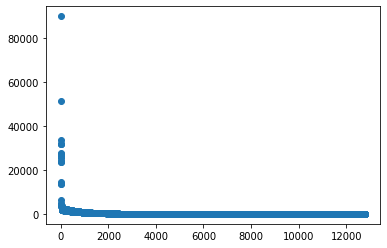

In [88]:
plt.scatter(np.arange(12800), np.array(sseList))

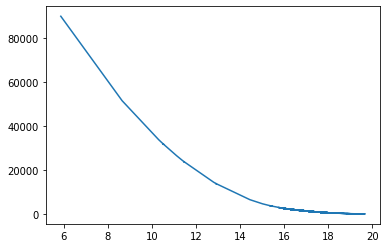

In [89]:
plt.plot(np.array(mList), np.array(sseList))

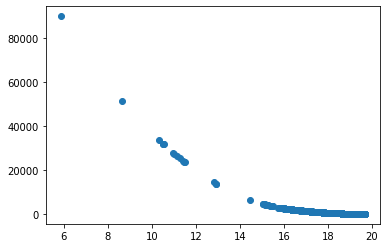

In [90]:
plt.scatter(np.array(mList), np.array(sseList))